In [1]:
import pandas as pd
from opensoundscape.ml.cnn import load_model
import sklearn

In [2]:
#load model from save path
folder = 'model_9_overlay_updatelabels'
model = load_model(f'/mnt/class_data/group1_bioacoustics/sheila/model_checkpoints/{folder}/best.model')

/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:2515: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_content = torch.

In [3]:
'''#load model from save path
model = load_model('/mnt/class_data/group1_bioacoustics/sheila/model_checkpoints/model_7_overlay/best.model')'''

"#load model from save path\nmodel = load_model('/mnt/class_data/group1_bioacoustics/sheila/model_checkpoints/model_7_overlay/best.model')"

In [4]:
train_labels = pd.read_csv('data/train_labels.csv',index_col=['file', 'start_time', 'end_time'])
val_labels = pd.read_csv('data/val_labels.csv',index_col=['file', 'start_time', 'end_time'])
test_labels = pd.read_csv('data/test_labels.csv',index_col=['file', 'start_time', 'end_time'])
train_labels.head()


Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [5]:

#look at number empty clips in training data
#softmax puts on a scale from 0 to 1 mostly at the end of training
val_predictions = model.predict(val_labels,batch_size=64)
#can also include the argument activation_layer = 'softmax'
#ReLU a common activation layer inserted within a model - possibly outdated but GeLU more popular (differentiable at every point)
val_predictions.head()

  0%|          | 0/58 [00:00<?, ?it/s]

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                         -0.998648   
                                                   2.0        4.0                          1.518861   
                                                   4.0        6.0                         -1.266515   
                                                   6.0        8.0                         -0.727490   
                                                   8.0        10.0                        -0.735040   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -3.328482   
                                                   2.0        4.0                      -3.156256   
                                                   4.0        6.0                      -3.762820   
                                                   6.0        8.0                      -3.104843   
                                                   8.0        10.0                     -1.943364   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0              -6.335490   
                                                   2.0        4.0              -6.262756   
                                                   4.0        6.0              -5.512563   
                                                   6.0        8.0              -6.167223   
                                                   8.0        10.0             -6.806077   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                 -1.193313   
                                                   2.0        4.0                 -4.593046   
                                                   4.0        6.0                 -3.948584   
                                                   6.0        8.0                 -3.302150   
                                                   8.0        10.0                -2.706574   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0           -5.498906   
                                                   2.0        4.0           -5.137645   
                                                   4.0        6.0           -6.146762   
                                                   6.0        8.0           -5.458227   
                                                   8.0        10.0          -6.013044   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -0.997189   
                                                   2.0        4.0                      -4.429230   
                                                   4.0        6.0                      -4.371946   
                                                   6.0        8.0                      -2.632151   
                                                   8.0        10.0                     -2.542608   

             

In [6]:

#look at number empty clips in training data
#softmax puts on a scale from 0 to 1 mostly at the end of training
train_predictions = model.predict(train_labels,batch_size=64)
#can also include the argument activation_layer = 'softmax'
#ReLU a common activation layer inserted within a model - possibly outdated but GeLU more popular (differentiable at every point)
train_predictions.head()

  0%|          | 0/399 [00:00<?, ?it/s]

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                         -4.101590   
                                                   2.0        4.0                         -3.492143   
                                                   4.0        6.0                         -2.710205   
                                                   6.0        8.0                         -2.486170   
                                                   8.0        10.0                        -3.286359   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -1.759563   
                                                   2.0        4.0                      -2.494478   
                                                   4.0        6.0                      -2.387066   
                                                   6.0        8.0                      -1.955822   
                                                   8.0        10.0                     -1.032758   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0              -3.597399   
                                                   2.0        4.0              -3.288031   
                                                   4.0        6.0              -3.345966   
                                                   6.0        8.0              -3.611104   
                                                   8.0        10.0             -4.260599   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                 -4.399447   
                                                   2.0        4.0                 -5.288377   
                                                   4.0        6.0                 -5.584897   
                                                   6.0        8.0                 -5.318233   
                                                   8.0        10.0                -5.368542   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0           -2.449268   
                                                   2.0        4.0           -2.097733   
                                                   4.0        6.0           -2.321897   
                                                   6.0        8.0           -0.809940   
                                                   8.0        10.0          -1.733154   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -3.404923   
                                                   2.0        4.0                      -2.128709   
                                                   4.0        6.0                      -2.260302   
                                                   6.0        8.0                      -2.490263   
                                                   8.0        10.0                     -2.189320   

             

In [ ]:
sklearn.metrics.average_precision_score(val_labels,val_predictions)

/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


0.40368284695261725

In [8]:
# Load class list
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']
#Double check that it matches training data
class_list==train_labels.columns.values


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
sklearn.metrics.roc_auc_score(val_labels['Hypsipetes_madagascariensis'],val_predictions ['Hypsipetes_madagascariensis'])

0.931048617051611

In [10]:
avprecscore_auroc_by_sp = pd.DataFrame(columns=['species', 'avg_precision_score_val','auroc_score_val', 'avg_precision_score_train','auroc_score_train'])
for species in class_list:
    avgscore_val = sklearn.metrics.average_precision_score(val_labels [species],val_predictions [species])
    auroc_val = sklearn.metrics.roc_auc_score(val_labels[species],val_predictions [species])
    avgscore_train = sklearn.metrics.average_precision_score(train_labels [species],train_predictions [species])
    auroc_train = sklearn.metrics.roc_auc_score(train_labels[species],train_predictions [species])
    new_row = pd.DataFrame({'species': [species], 'avg_precision_score_val': [avgscore_val], 'auroc_score_val': [auroc_val], 'avg_precision_score_train': [avgscore_train], 'auroc_score_train': [auroc_train]})
    avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)

avprecscore_auroc_by_sp

/tmp/ipykernel_409692/478757880.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)
/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive cla

,species,avg_precision_score_val,auroc_score_val,avg_precision_score_train,auroc_score_train
0,Hypsipetes_madagascariensis,0.845862,0.931049,0.869359,0.957898
1,Copsychus_albospecularis,0.673631,0.976682,0.726814,0.961667
2,Coracopsis_nigra,0.675441,0.977629,0.709439,0.979306
3,Dicrurus_forficatus,0.676775,0.954822,0.796666,0.974467
4,Coua_caerulea,0.637995,0.987208,0.803198,0.996206
5,Zosterops_maderaspatanus,0.191920,0.953962,0.763137,0.989670
6,Eurystomus_glaucurus,0.884086,0.997262,0.821518,0.990638
7,Agapornis_canus,0.603469,0.991793,0.572670,0.985571
8,Saxicola_torquatus,0.698536,0.994019,0.872380,0.998963
9,Cyanolanius_madagascarinus,0.327786,0.963039,0.664751,0.975559


In [11]:
avprecscore_auroc_by_sp.to_csv(f'/mnt/class_data/group1_bioacoustics/sheila/results/{folder}.csv')

In [12]:
#Choose a species to look at
samples = val_labels[val_labels['Coua_caerulea']]

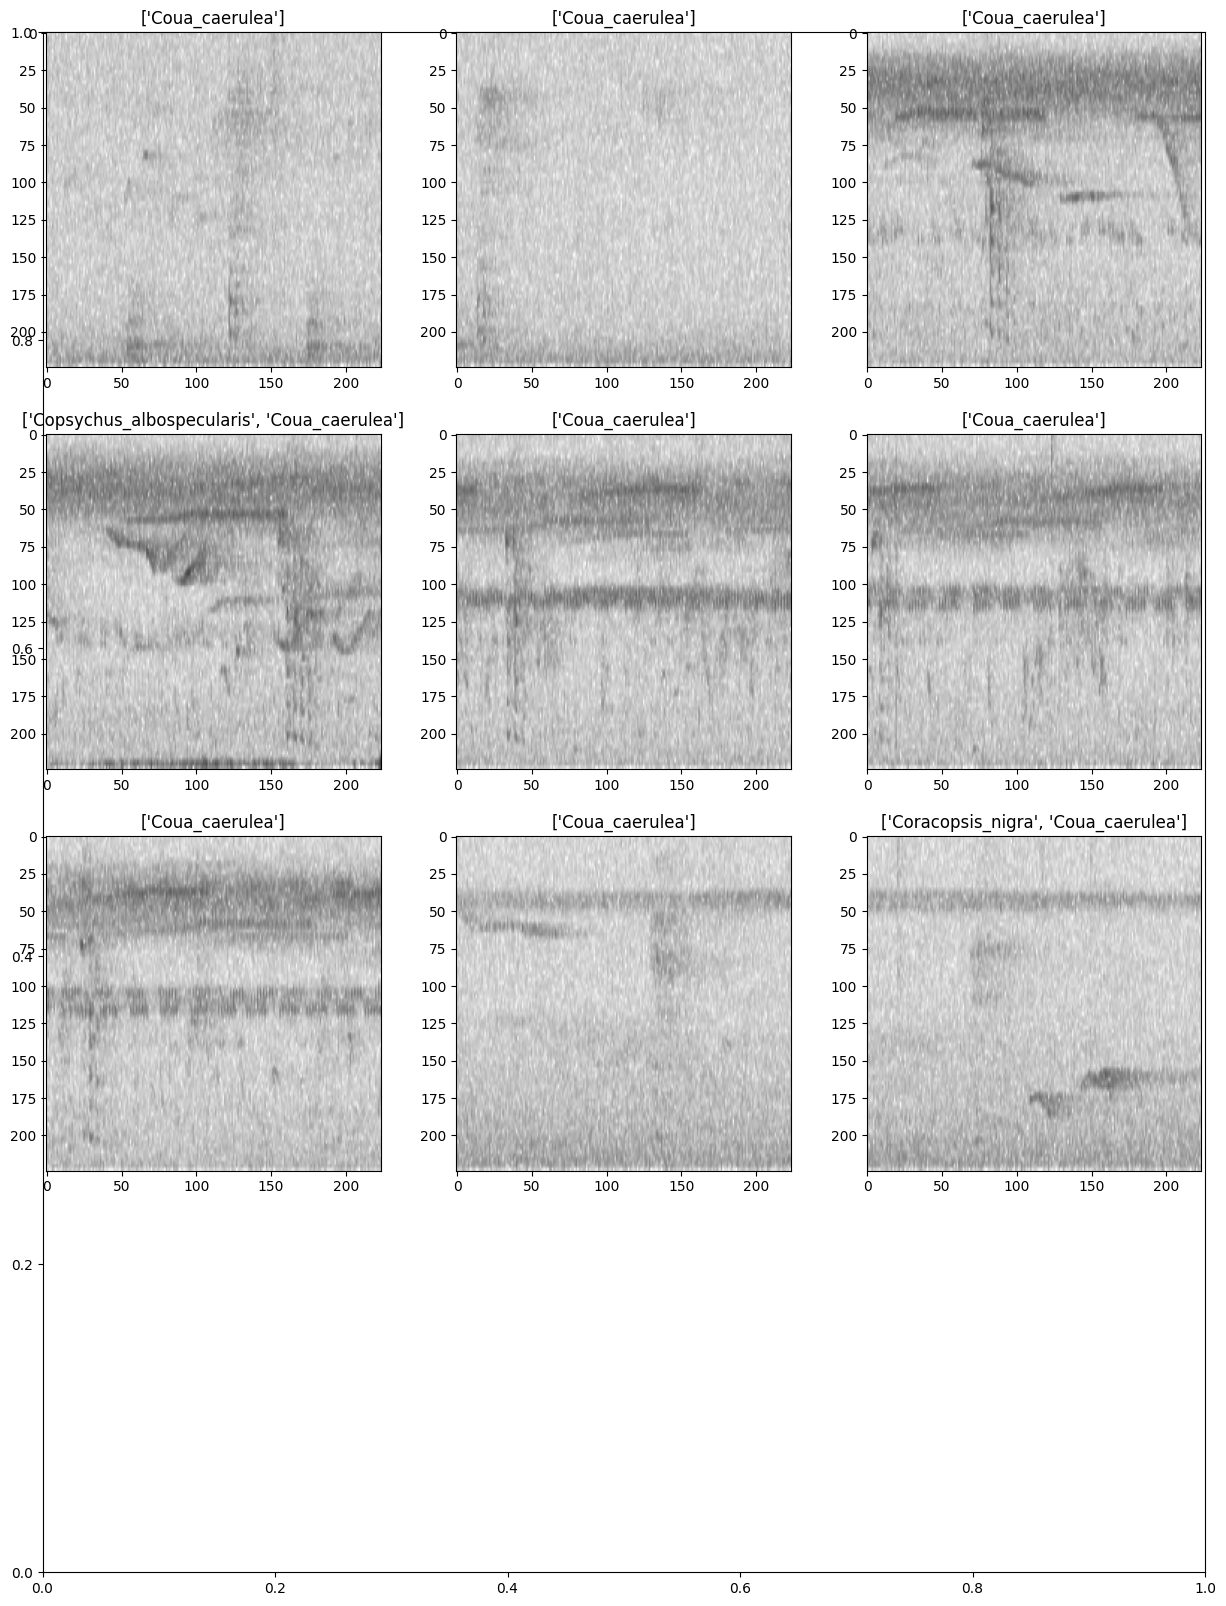

In [13]:
#visualize the species
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset
'''pre = SpectrogramPreprocessor(sample_duration=2.0)'''
dataset = AudioFileDataset(samples,model.preprocessor)
dataset.bypass_augmentations = True


tensors = [dataset[i].data for i in range(9)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(9)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [14]:
val_labels.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [15]:
#Look specifically at spectrograms for TRUE that were scored high and low and for FALSE that were scored high and low. Use val_labels and val_predictions. 
val_positive_scores = val_predictions[val_labels]
val_positive_scores.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                               NaN   
                                                   2.0        4.0                               NaN   
                                                   4.0        6.0                               NaN   
                                                   6.0        8.0                               NaN   
                                                   8.0        10.0                              NaN   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                            NaN   
                                                   2.0        4.0                            NaN   
                                                   4.0        6.0                            NaN   
                                                   6.0        8.0                            NaN   
                                                   8.0        10.0                           NaN   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                    NaN   
                                                   2.0        4.0                    NaN   
                                                   4.0        6.0                    NaN   
                                                   6.0        8.0                    NaN   
                                                   8.0        10.0                   NaN   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                       NaN   
                                                   2.0        4.0                       NaN   
                                                   4.0        6.0                       NaN   
                                                   6.0        8.0                       NaN   
                                                   8.0        10.0                      NaN   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                 NaN   
                                                   2.0        4.0                 NaN   
                                                   4.0        6.0                 NaN   
                                                   6.0        8.0                 NaN   
                                                   8.0        10.0                NaN   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                            NaN   
                                                   2.0        4.0                            NaN   
                                                   4.0        6.0                            NaN   
                                                   6.0        8.0                            NaN   
                                                   8.0        10.0                           NaN   

             

In [16]:
#Look specifically at spectrograms for TRUE that were scored high and low and for FALSE that were scored high and low. Use val_labels and val_predictions. 
val_negative_scores = val_predictions[~val_labels]
val_negative_scores.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                         -0.998648   
                                                   2.0        4.0                          1.518861   
                                                   4.0        6.0                         -1.266515   
                                                   6.0        8.0                         -0.727490   
                                                   8.0        10.0                        -0.735040   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -3.328482   
                                                   2.0        4.0                      -3.156256   
                                                   4.0        6.0                      -3.762820   
                                                   6.0        8.0                      -3.104843   
                                                   8.0        10.0                     -1.943364   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0              -6.335490   
                                                   2.0        4.0              -6.262756   
                                                   4.0        6.0              -5.512563   
                                                   6.0        8.0              -6.167223   
                                                   8.0        10.0             -6.806077   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                 -1.193313   
                                                   2.0        4.0                 -4.593046   
                                                   4.0        6.0                 -3.948584   
                                                   6.0        8.0                 -3.302150   
                                                   8.0        10.0                -2.706574   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0           -5.498906   
                                                   2.0        4.0           -5.137645   
                                                   4.0        6.0           -6.146762   
                                                   6.0        8.0           -5.458227   
                                                   8.0        10.0          -6.013044   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -0.997189   
                                                   2.0        4.0                      -4.429230   
                                                   4.0        6.0                      -4.371946   
                                                   6.0        8.0                      -2.632151   
                                                   8.0        10.0                     -2.542608   

             

In [17]:
sorted_column = val_positive_scores['Hypsipetes_madagascariensis'].sort_values()
print(sorted_column)

file                                                                                                                                           start_time  end_time
/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/MAR_A/MAR_A-MAR10/MAR_A-MAR10_20230519_092000.WAV                  20.0        22.0       -5.379862
                                                                                                                                               14.0        16.0       -5.169207
/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGR_A/AGR_A-AGR04/AGR_A-AGR04_20230509_080000.WAV                  26.0        28.0       -4.747817
/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Analalava/NLR_A/NLR_A-NLR02/NLR_A-NLR02_20230209_102000.WAV                 4.0         6.0        -4.147989
/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Ankarabolava_Agnakatrika/NBR_A/NBR_A-NBR09/NBR_A-NBR09_20230724_0

In [18]:
val_positive_scores.to_csv(f'/mnt/class_data/group1_bioacoustics/sheila/results/{folder}_val_positive_scores.csv')
val_negative_scores.to_csv(f'/mnt/class_data/group1_bioacoustics/sheila/results/{folder}_val_negative_scores.csv')


In [ ]:
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = '/mnt/class_data/group1_bioacoustics/sheila/histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
    # Filter
    df_Pos = scores_valid_df[scores_valid_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_valid_df[scores_valid_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    # Save the plot
    plt.savefig(f'/mnt/class_data/group1_bioacoustics/sheila/histograms/{folder}_{species}.png')
    plt.clf()

/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


<Figure size 1500x500 with 0 Axes>

In [55]:
#Histogram with Y axis on log scale
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = '/mnt/class_data/group1_bioacoustics/sheila/histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
    # Filter
    df_Pos = scores_valid_df[scores_valid_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_valid_df[scores_valid_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.semilogy()
    # Save the plot
    plt.savefig(f'/mnt/class_data/group1_bioacoustics/sheila/histograms/semilog/{folder}_{species}.png')
    plt.clf()


<Figure size 1500x500 with 0 Axes>

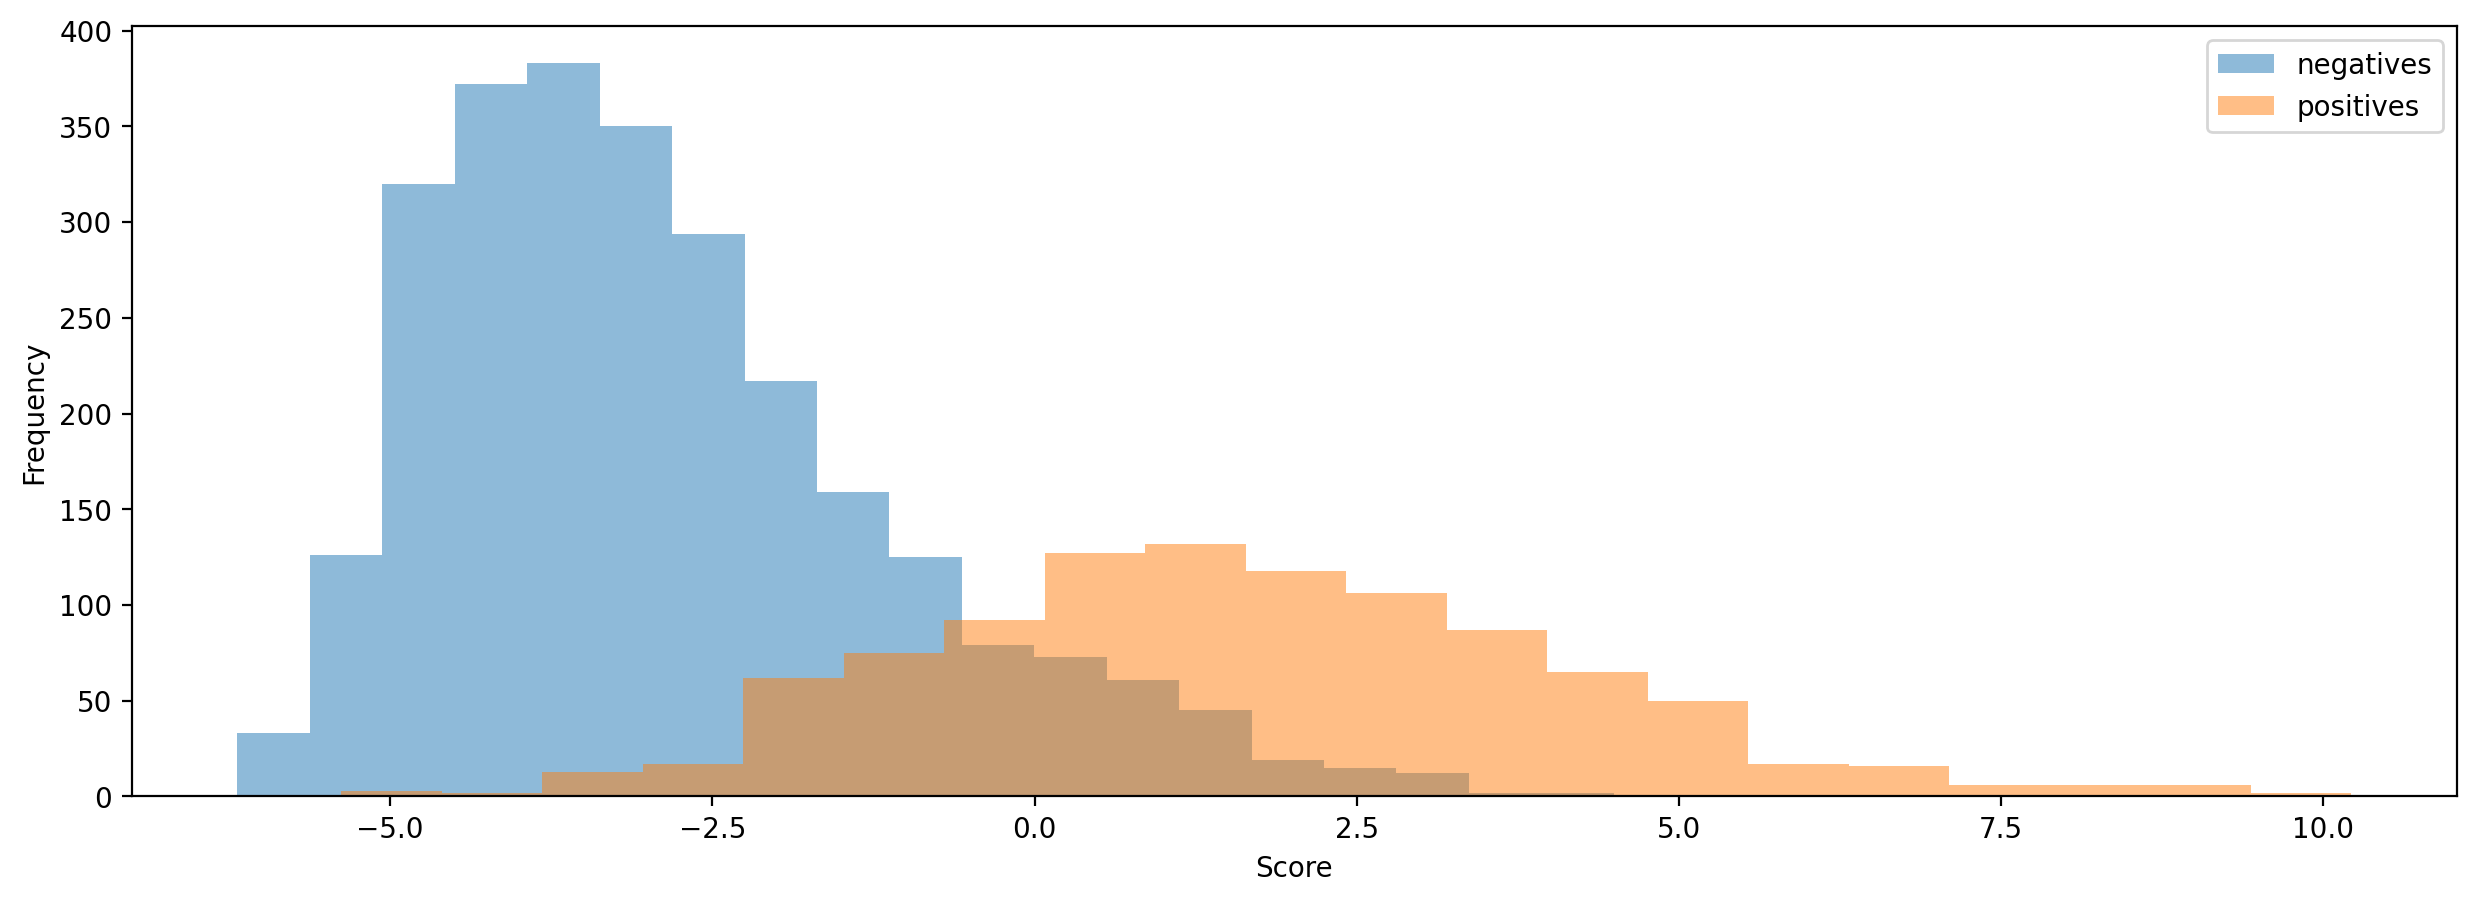

In [20]:
histspecies = 'Hypsipetes_madagascariensis'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()


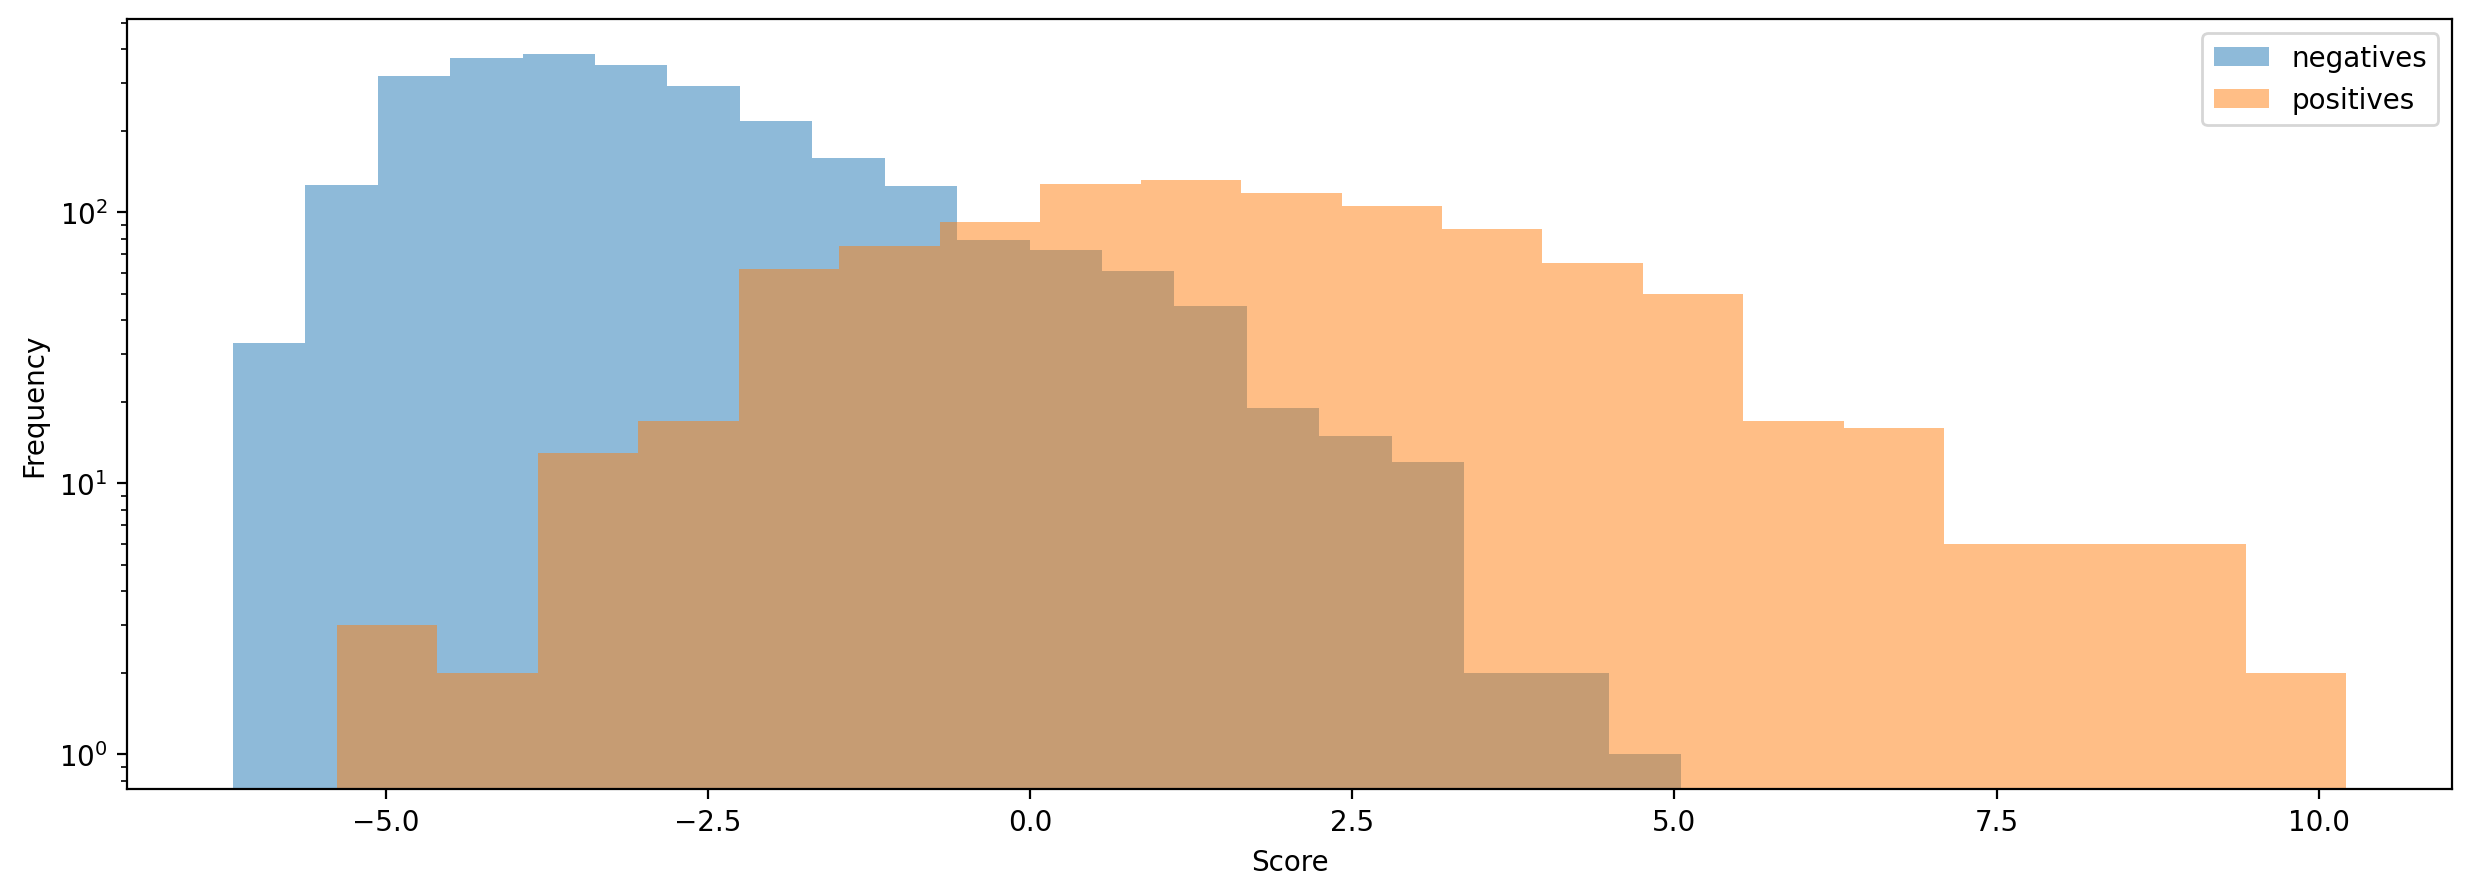

In [21]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

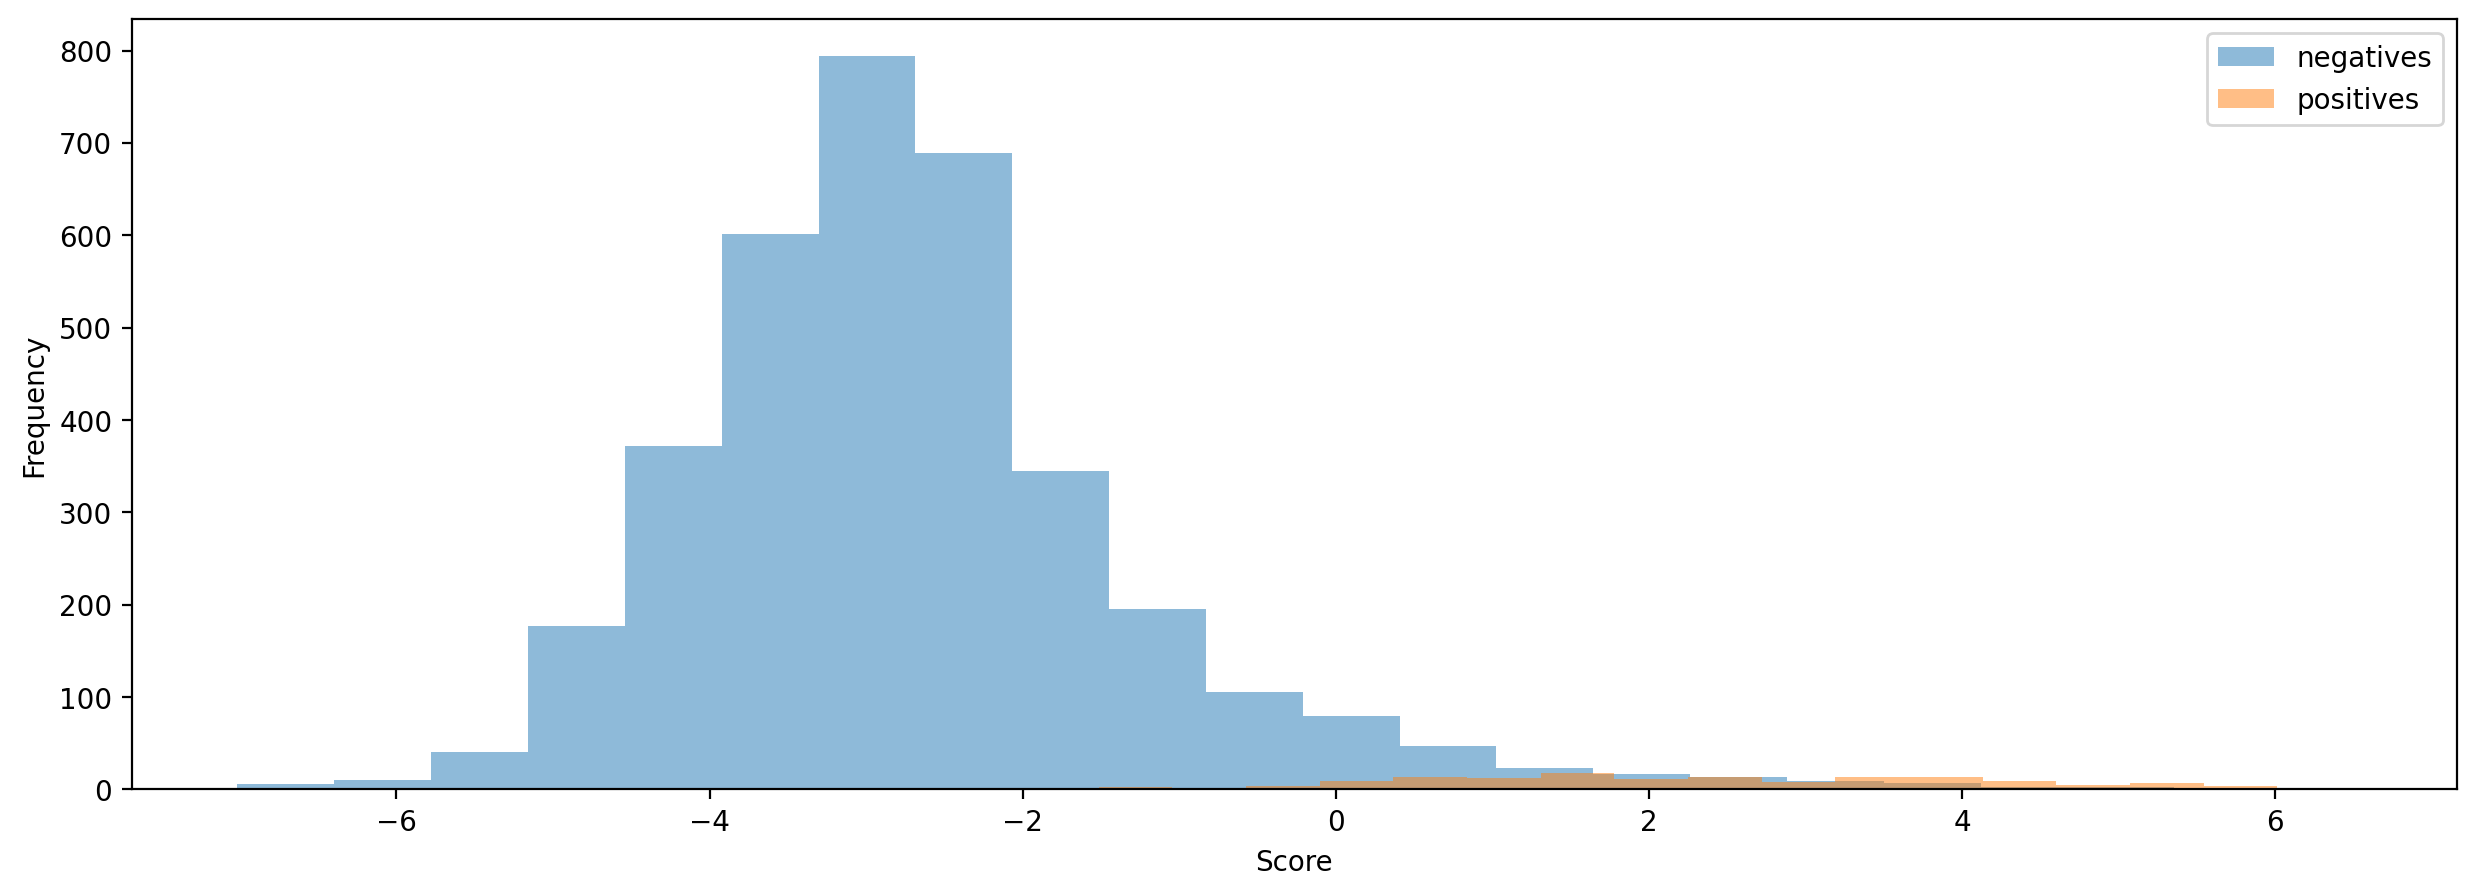

In [22]:
histspecies = 'Copsychus_albospecularis'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

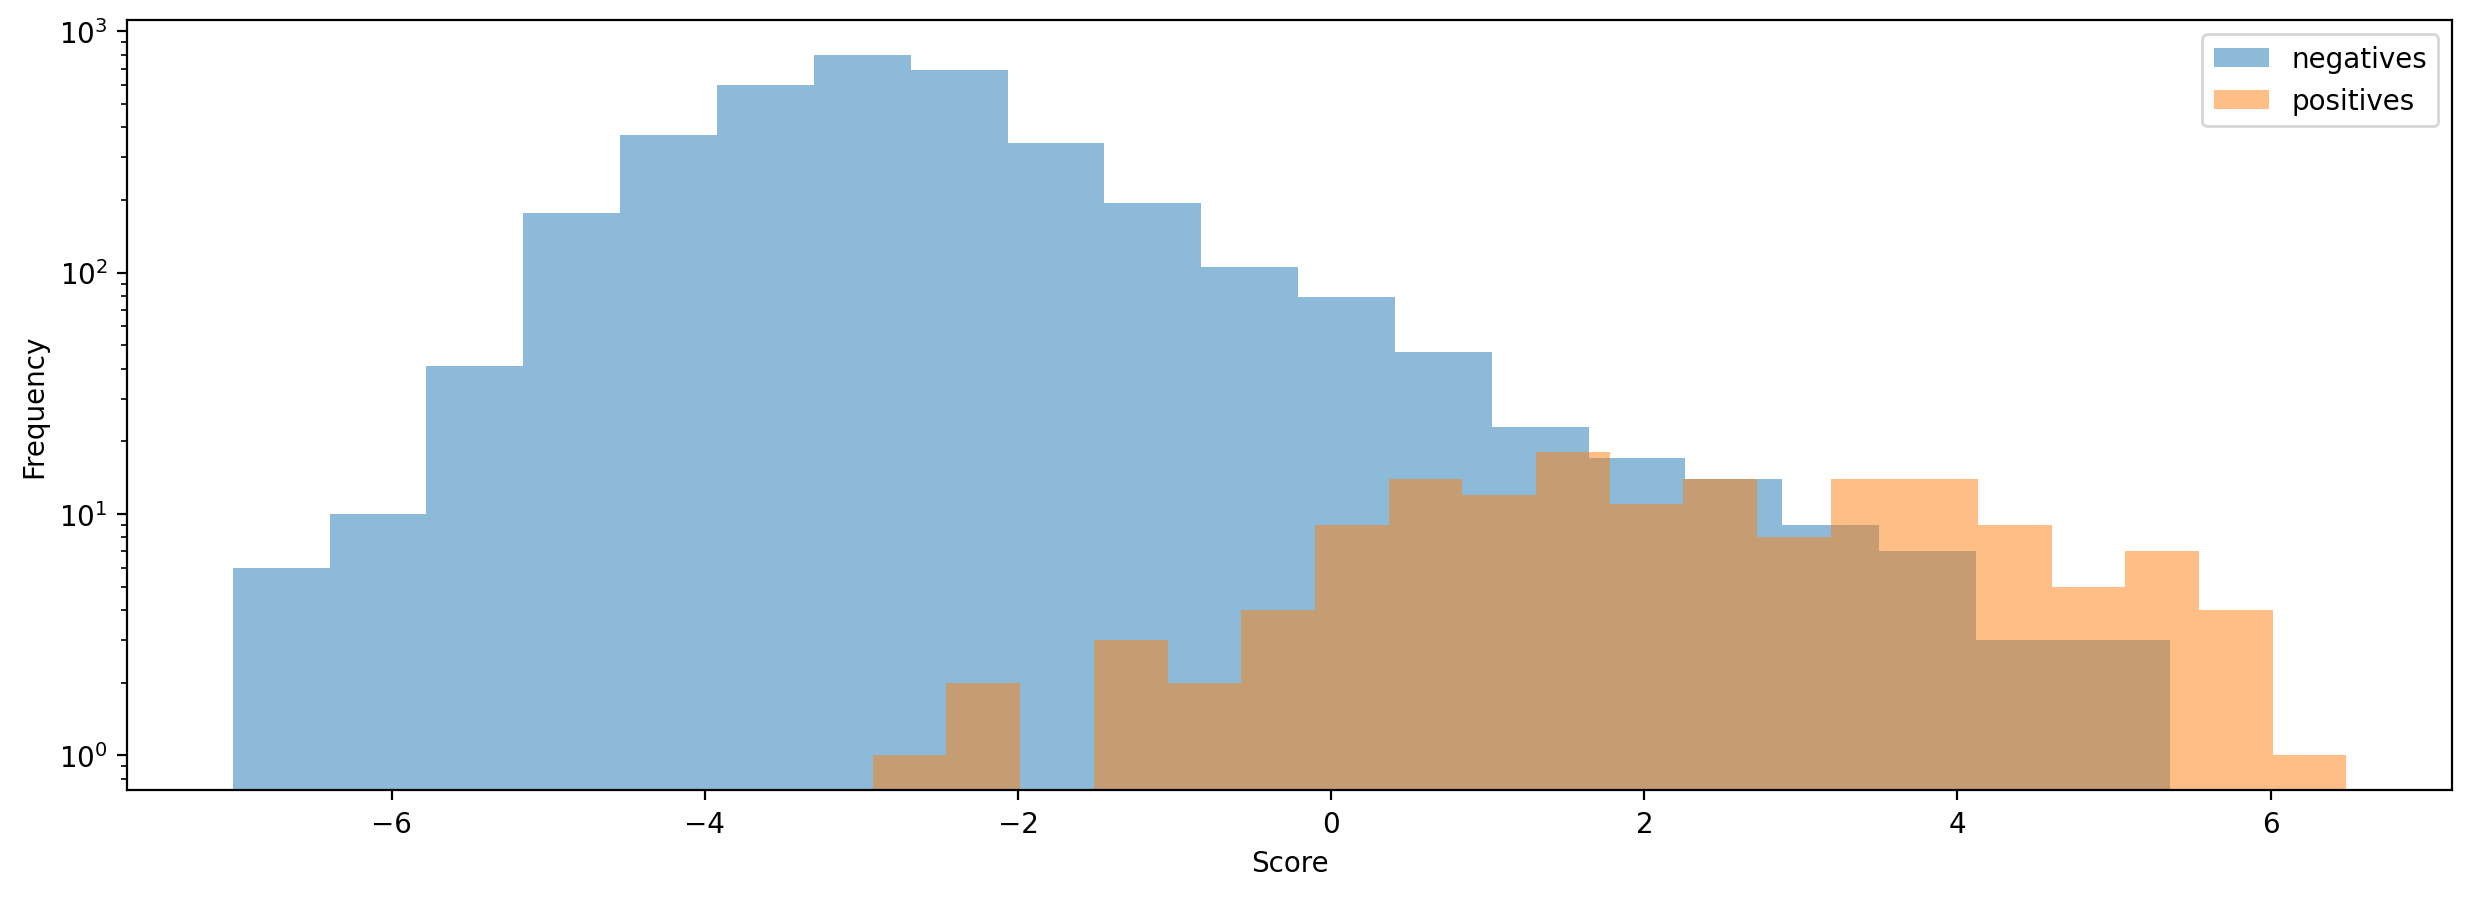

In [23]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

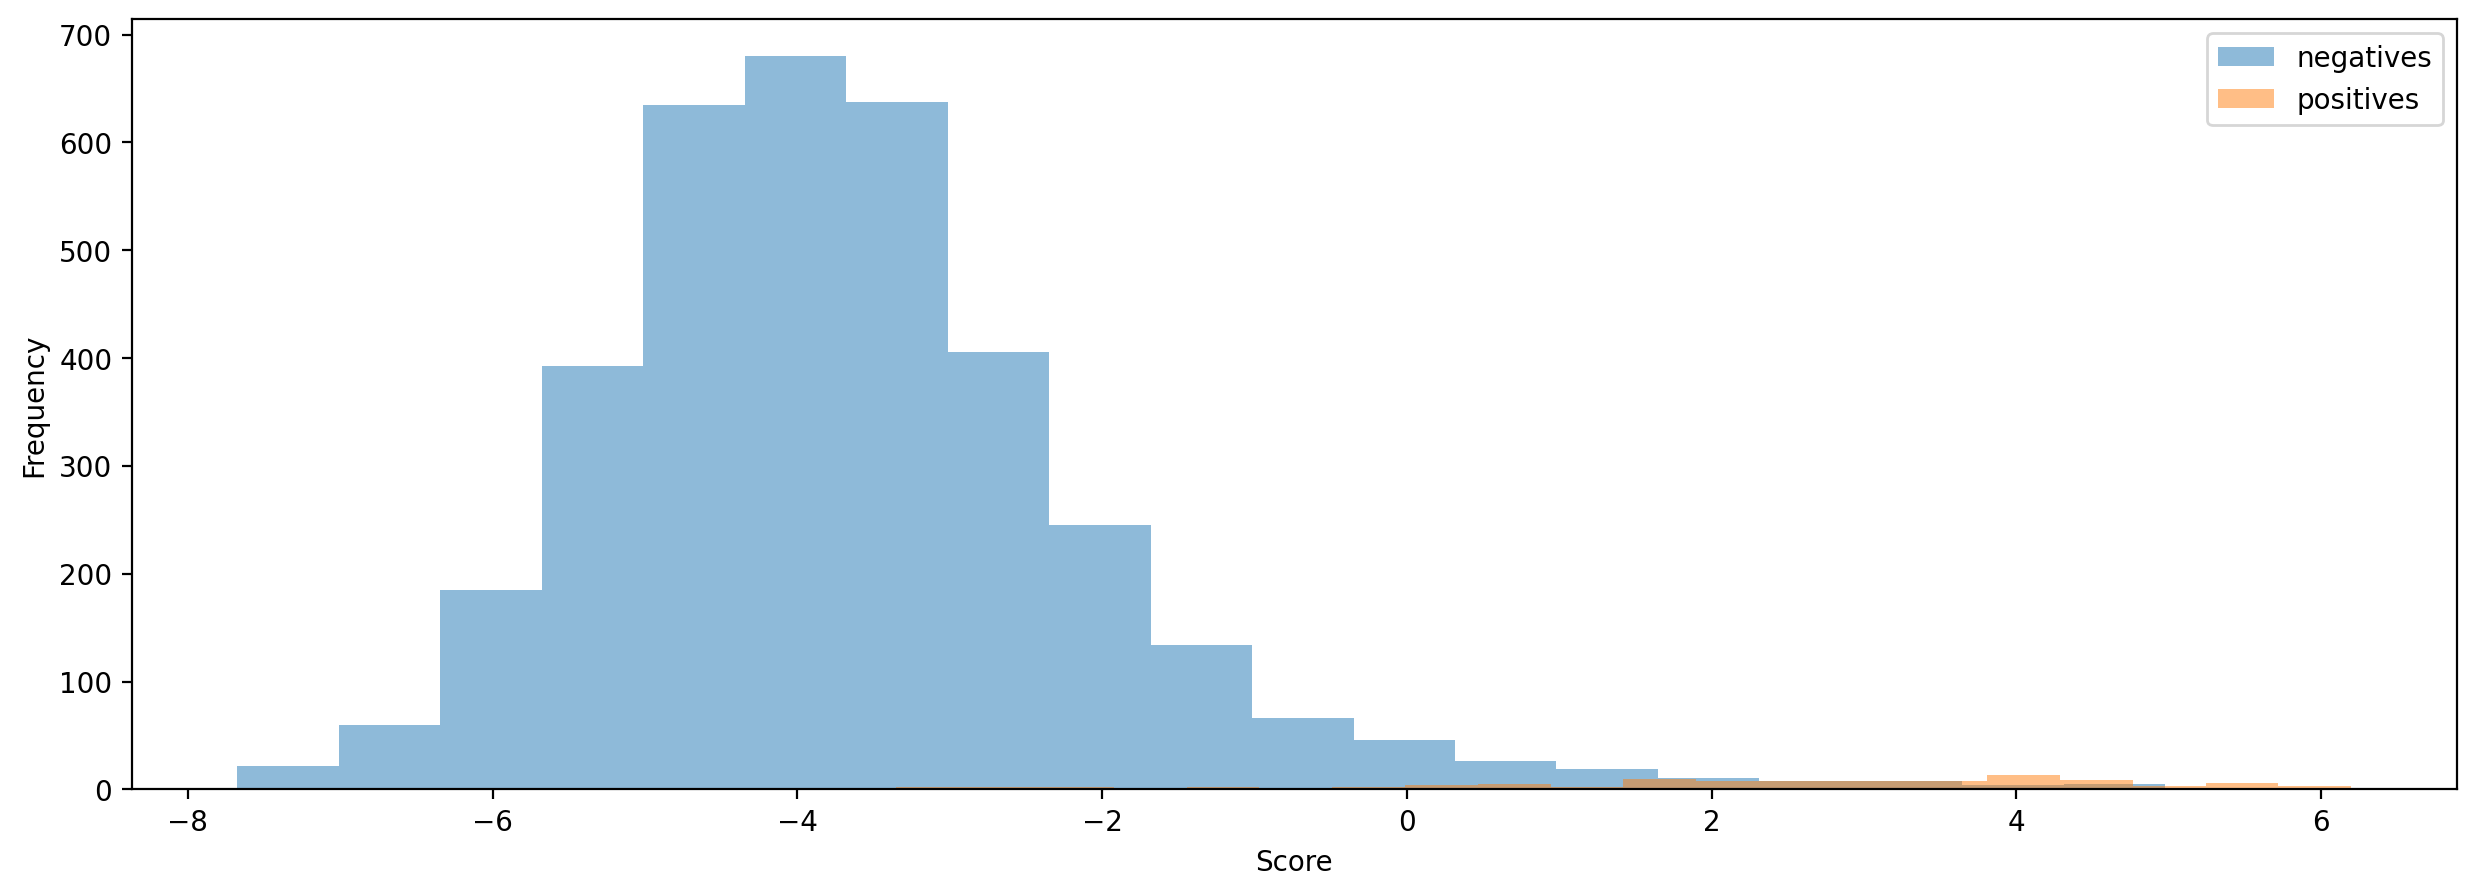

In [24]:
histspecies = 'Coracopsis_nigra'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

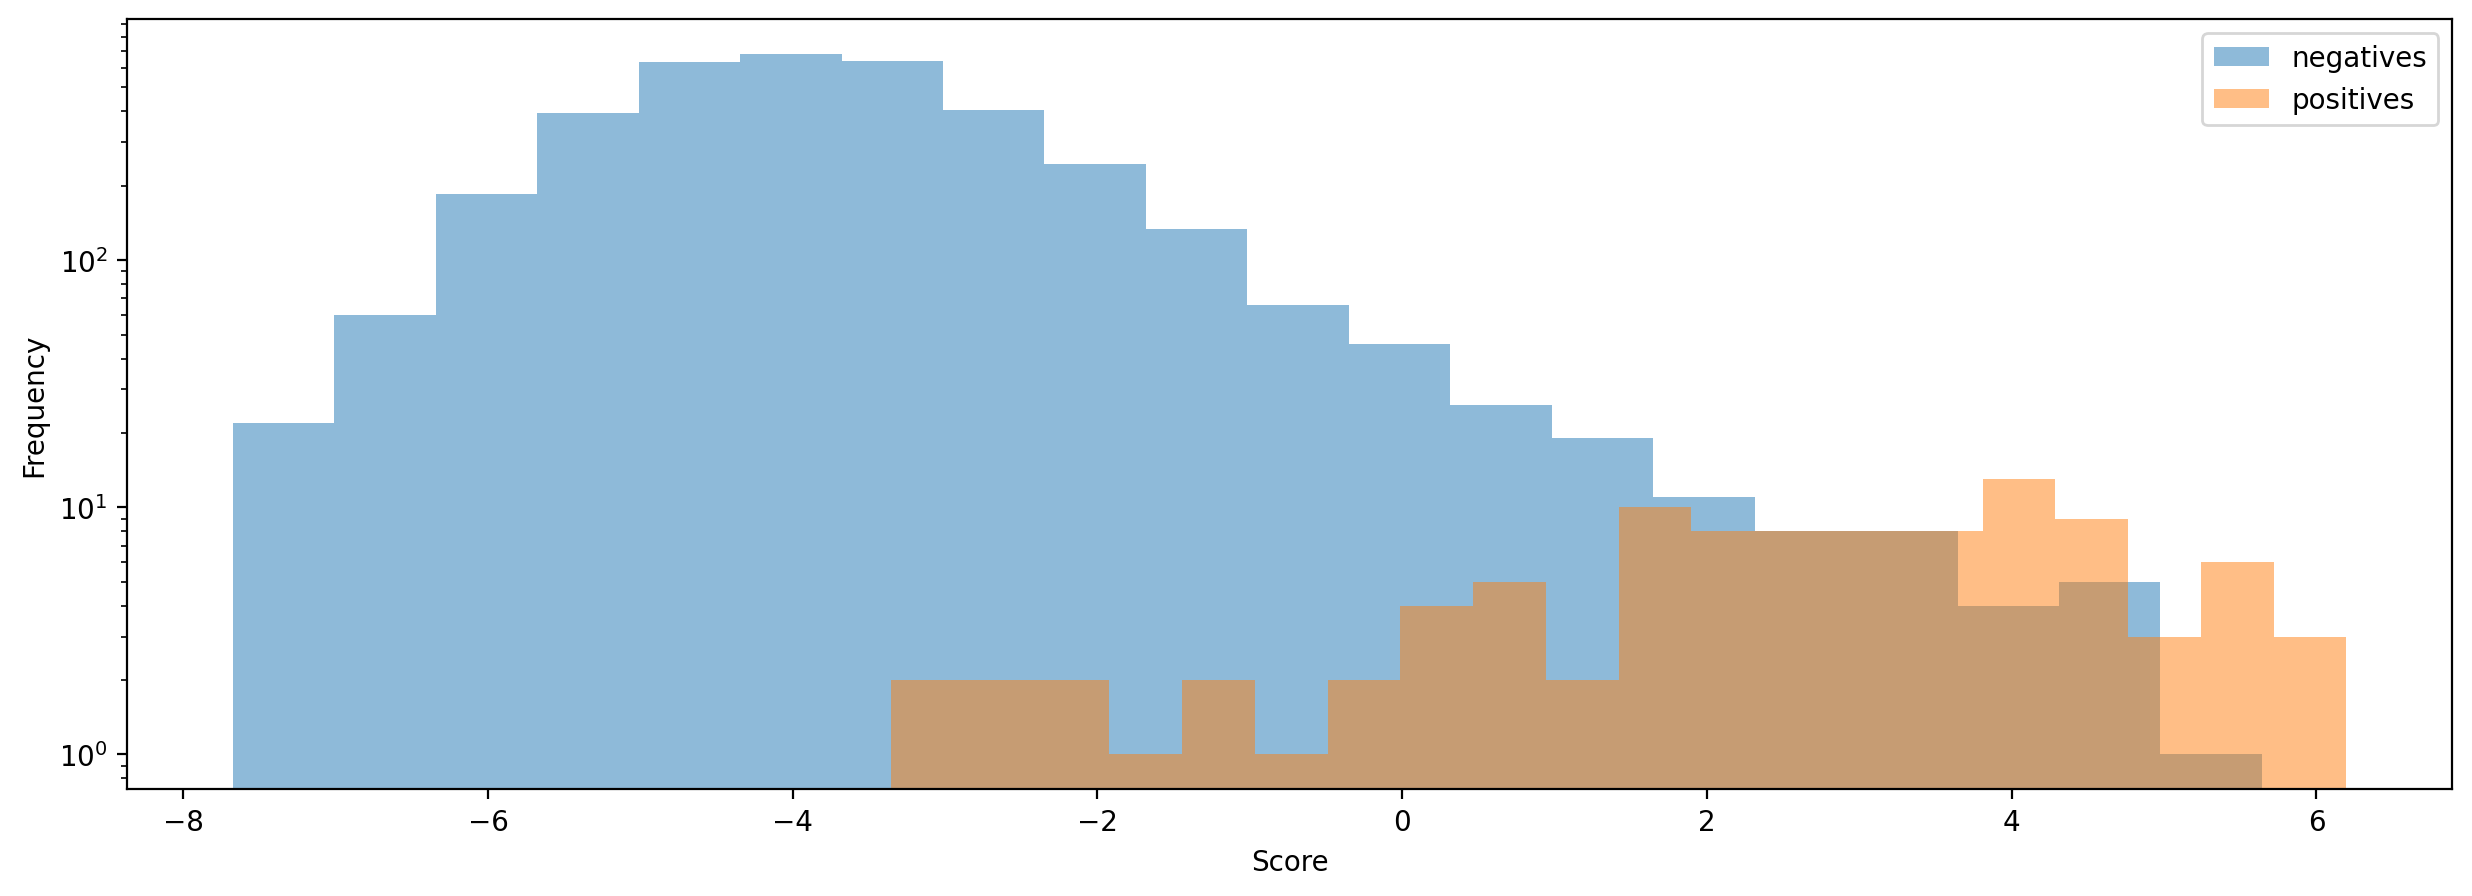

In [25]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

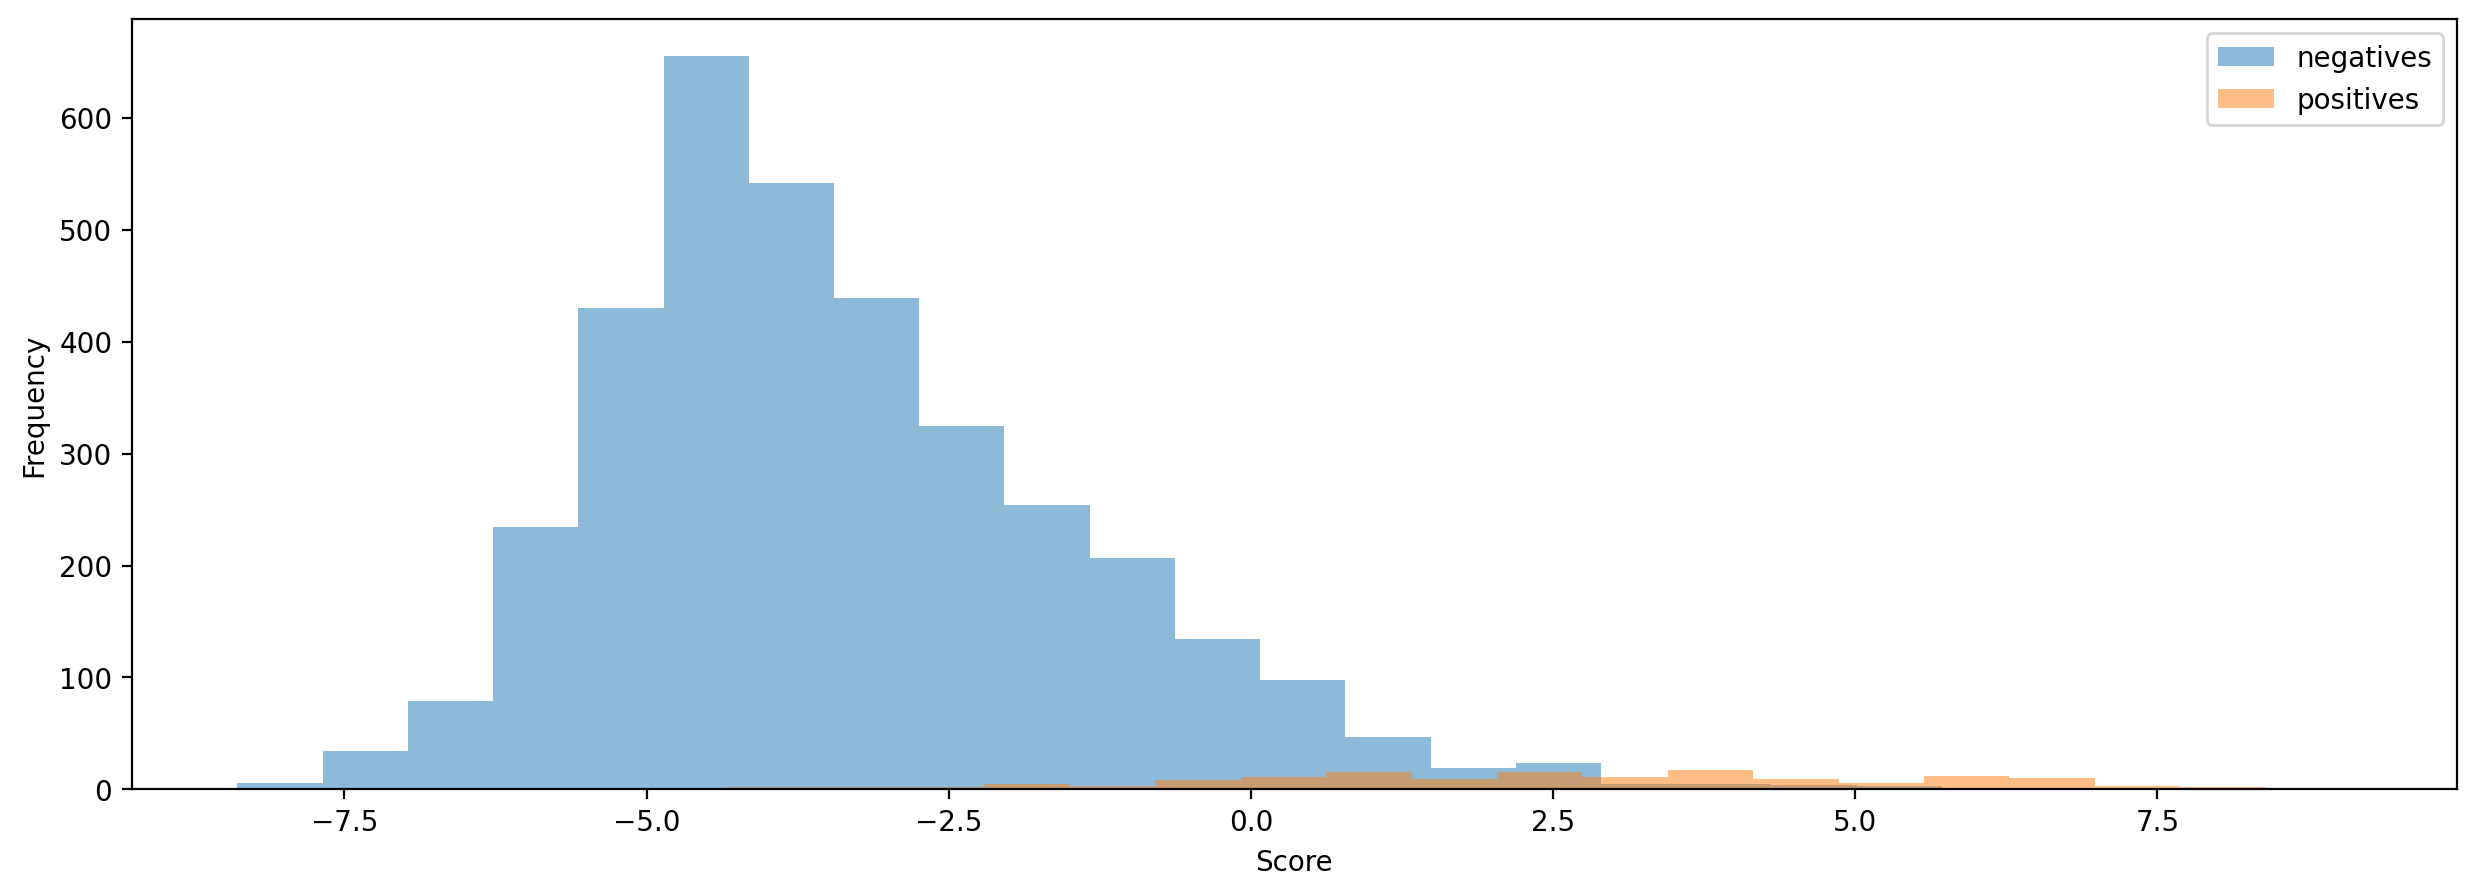

In [26]:
histspecies = 'Dicrurus_forficatus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

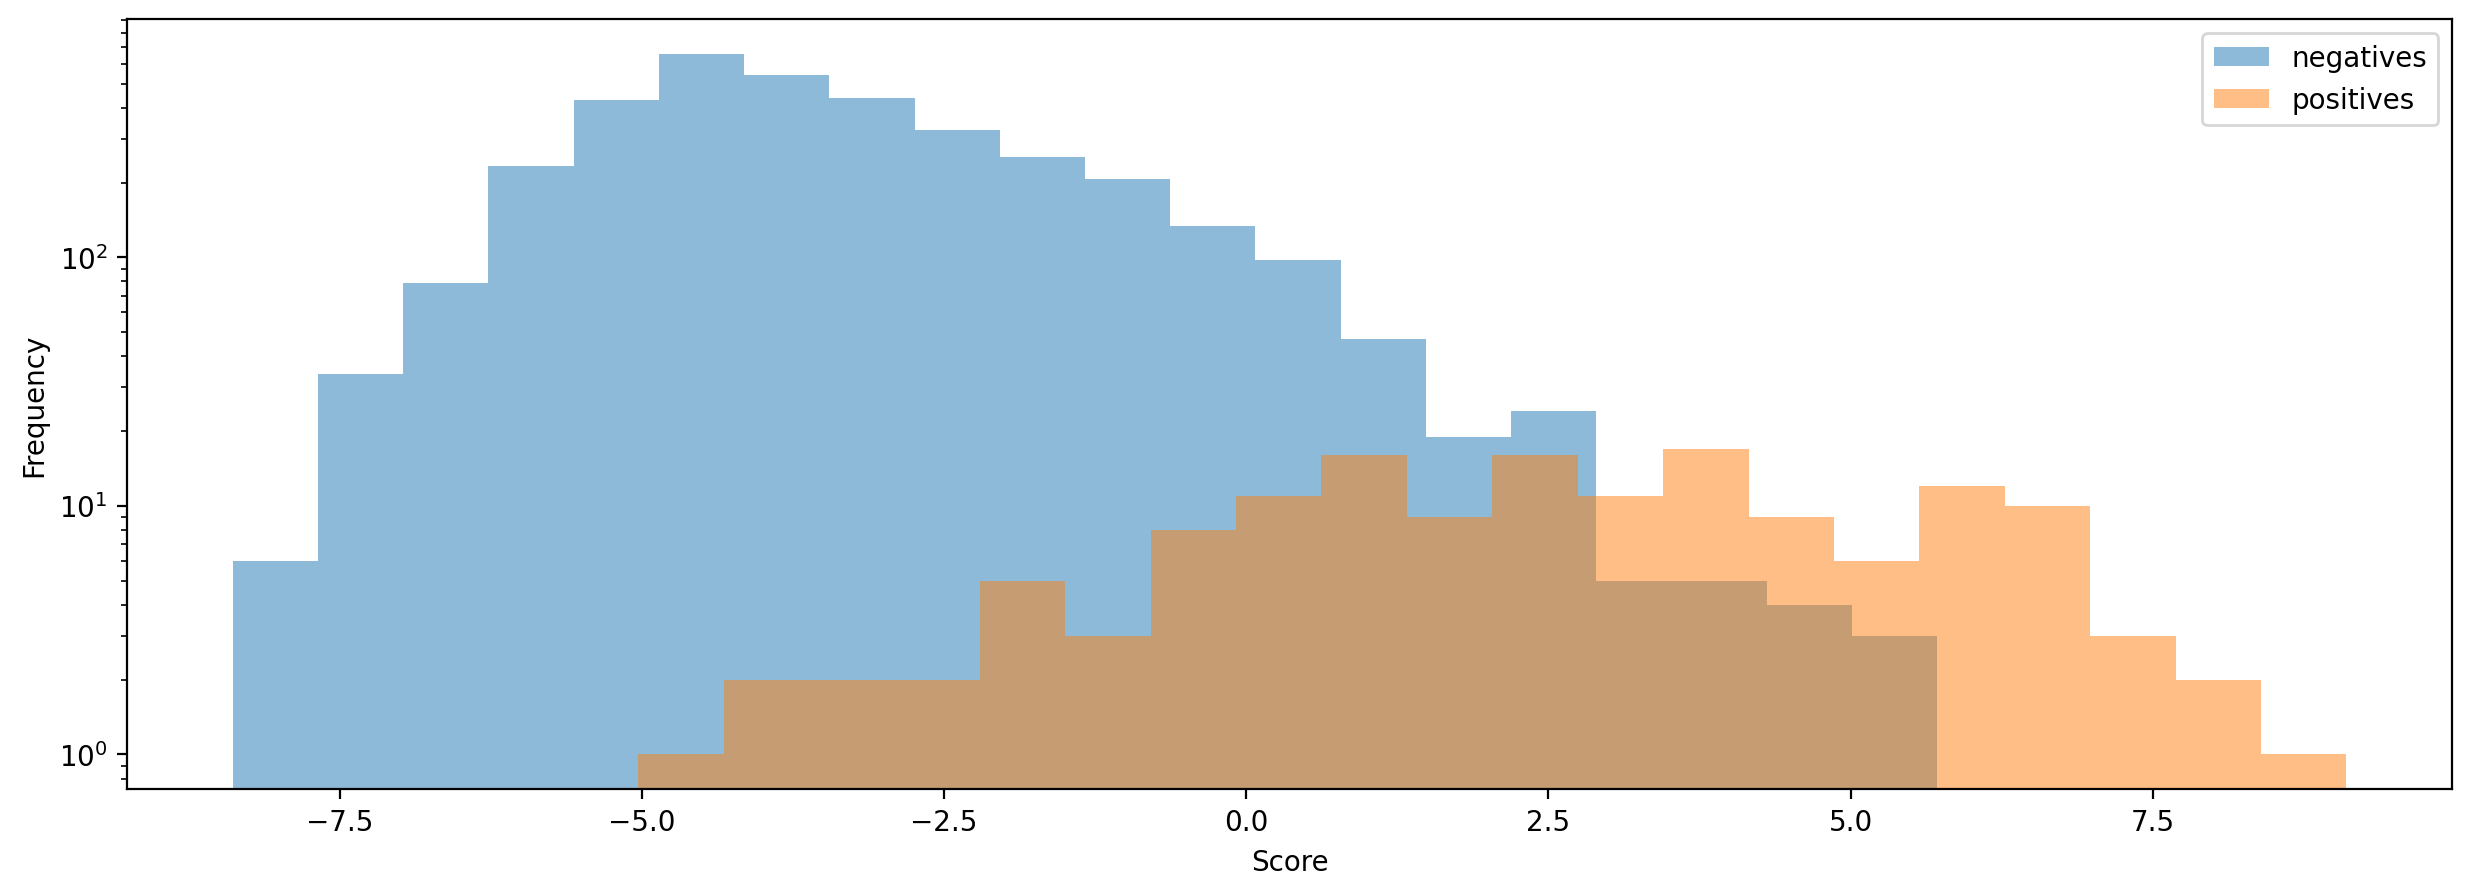

In [27]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

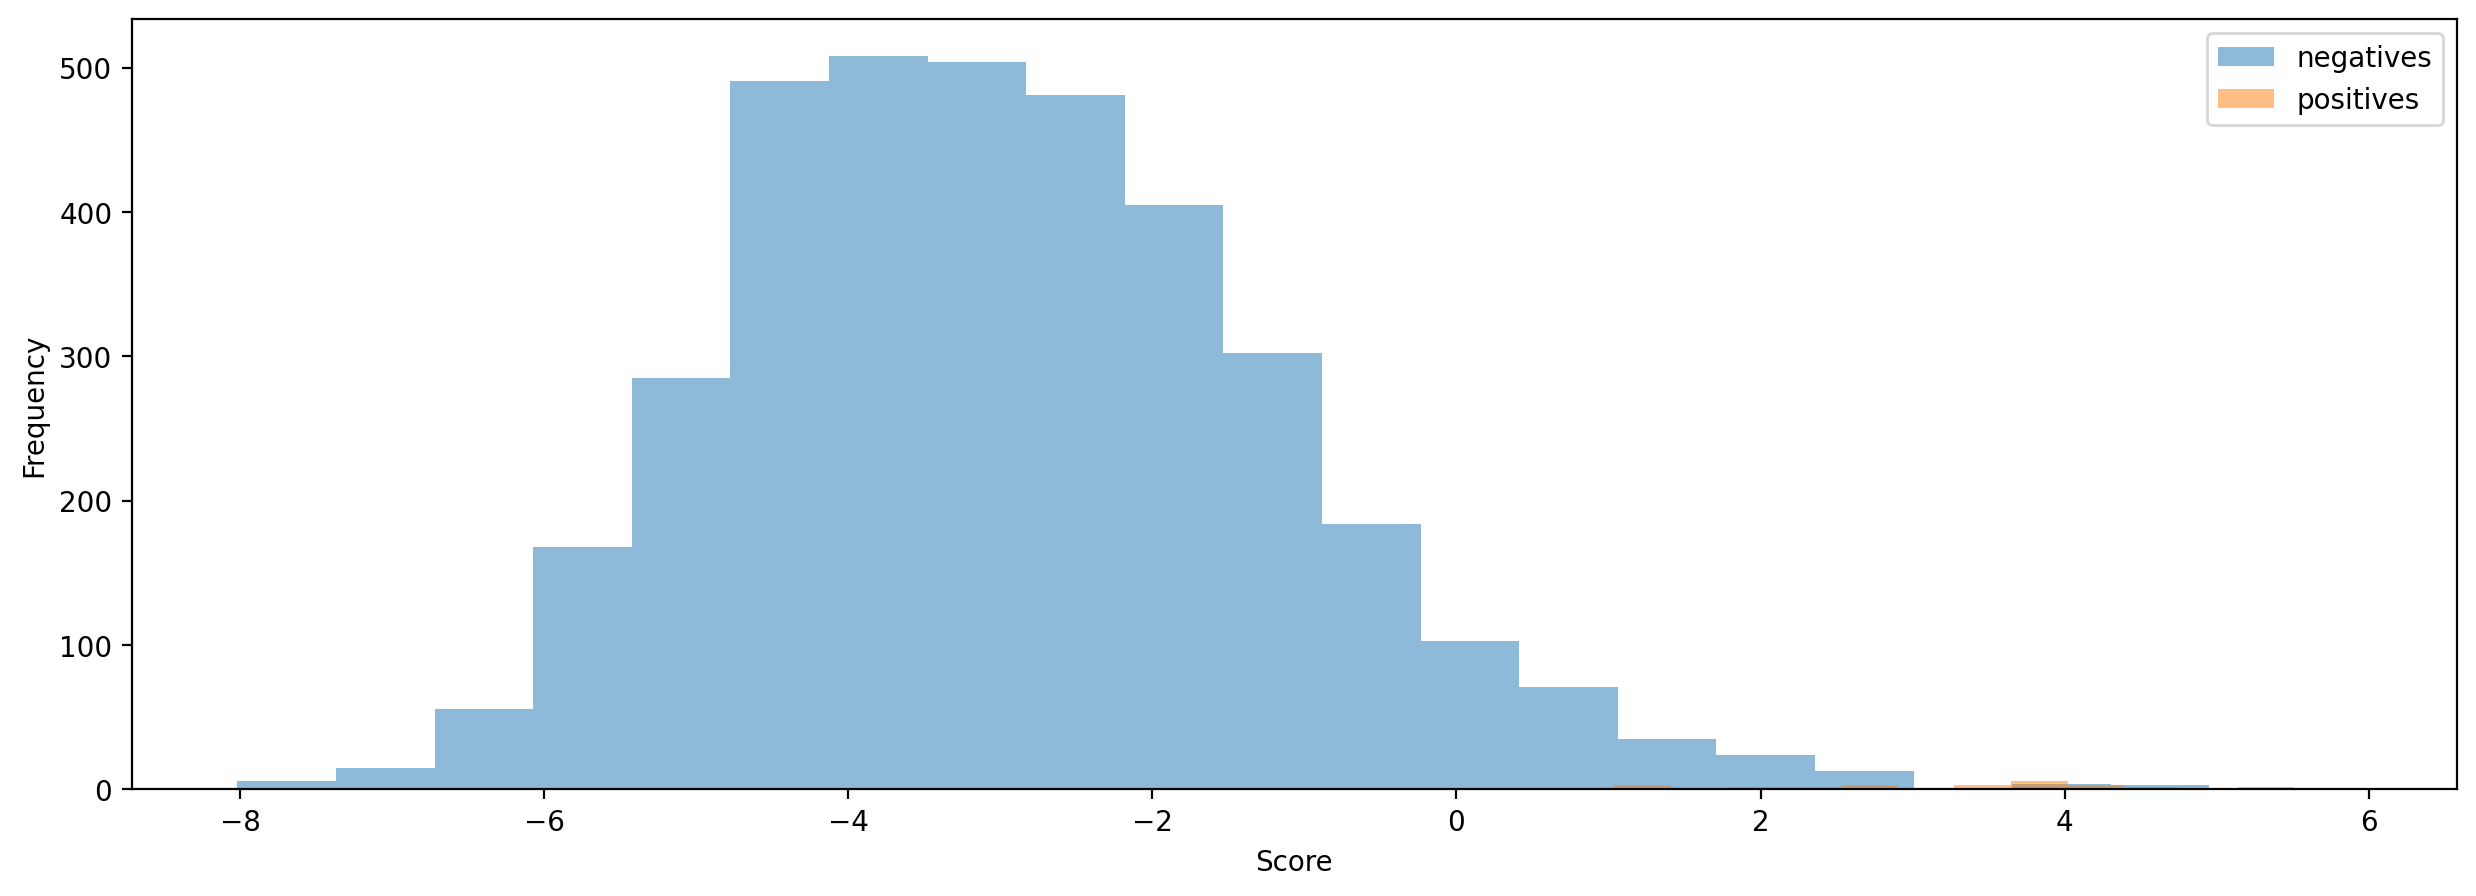

In [28]:
histspecies = 'Coua_caerulea'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

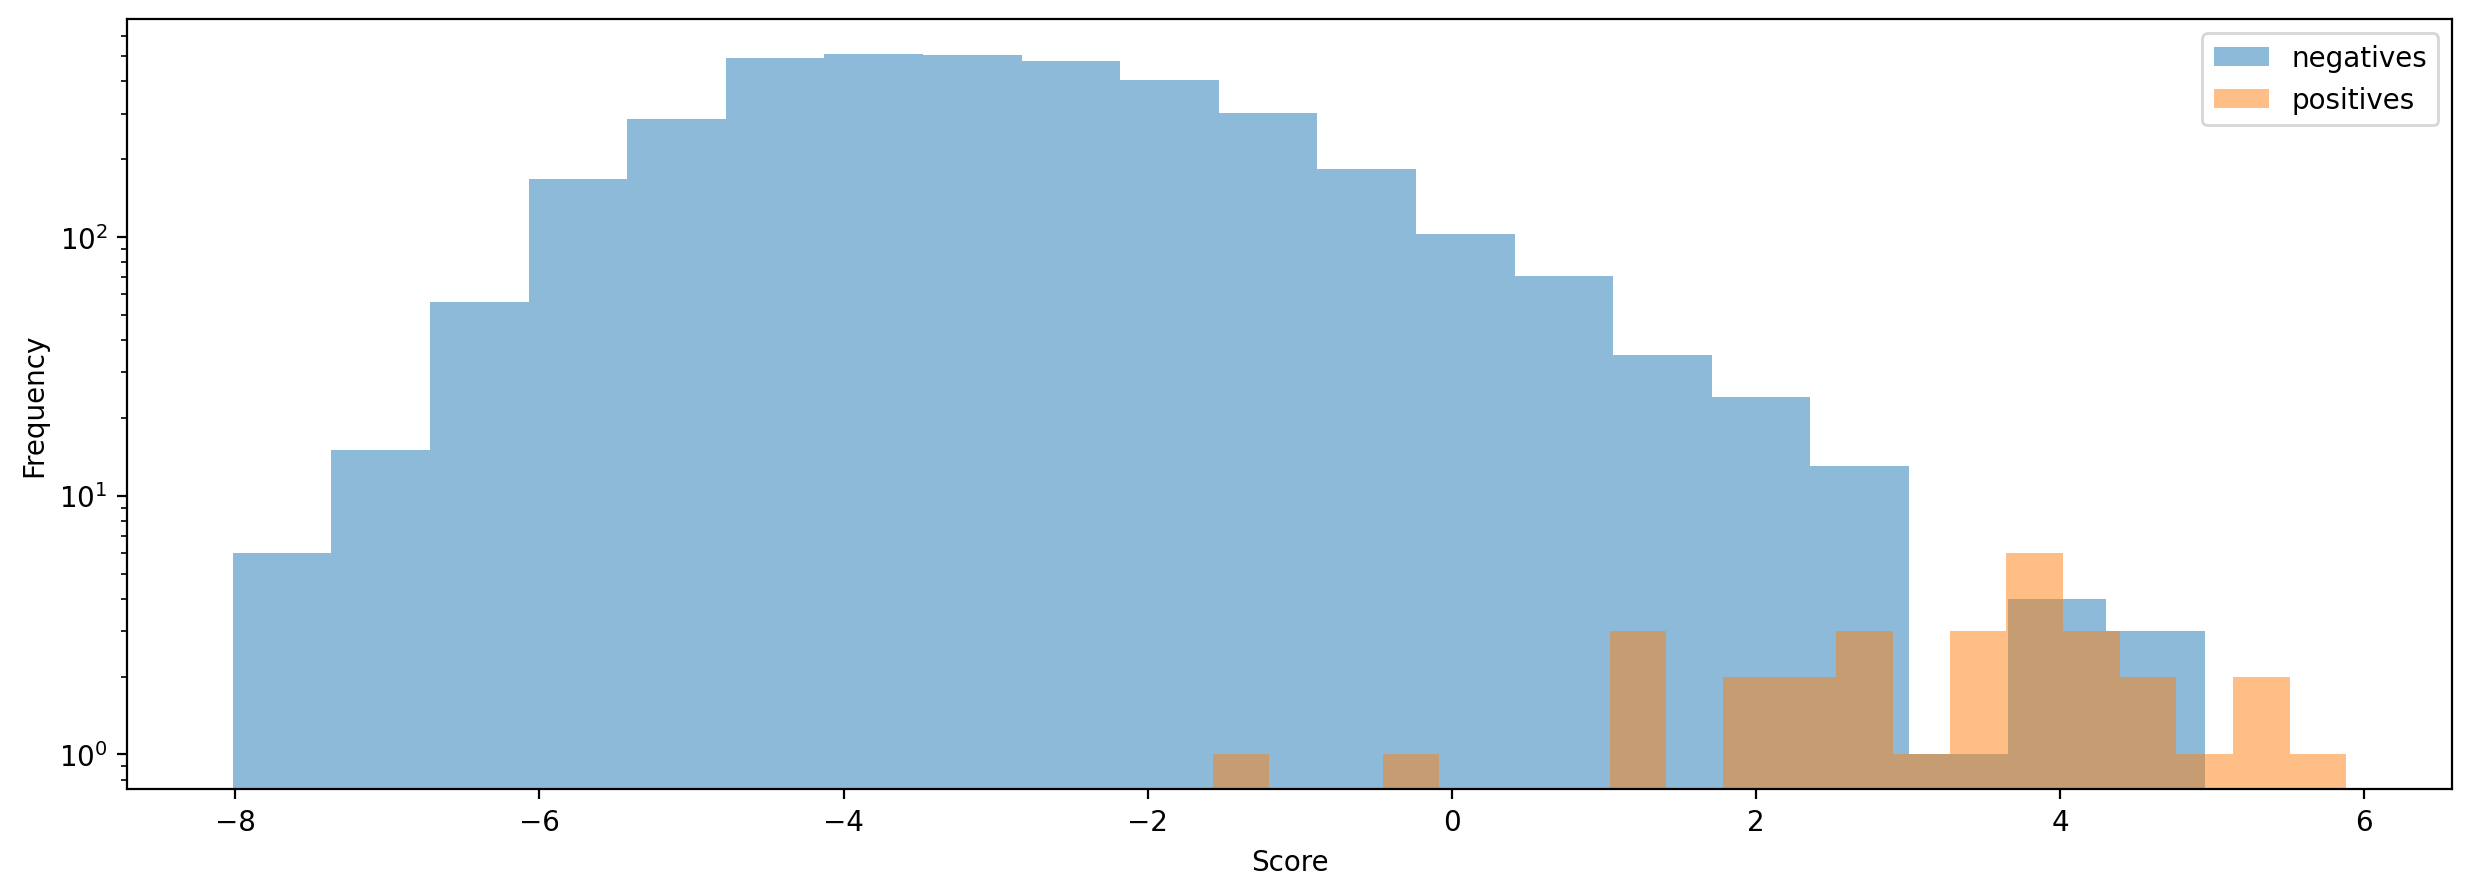

In [29]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

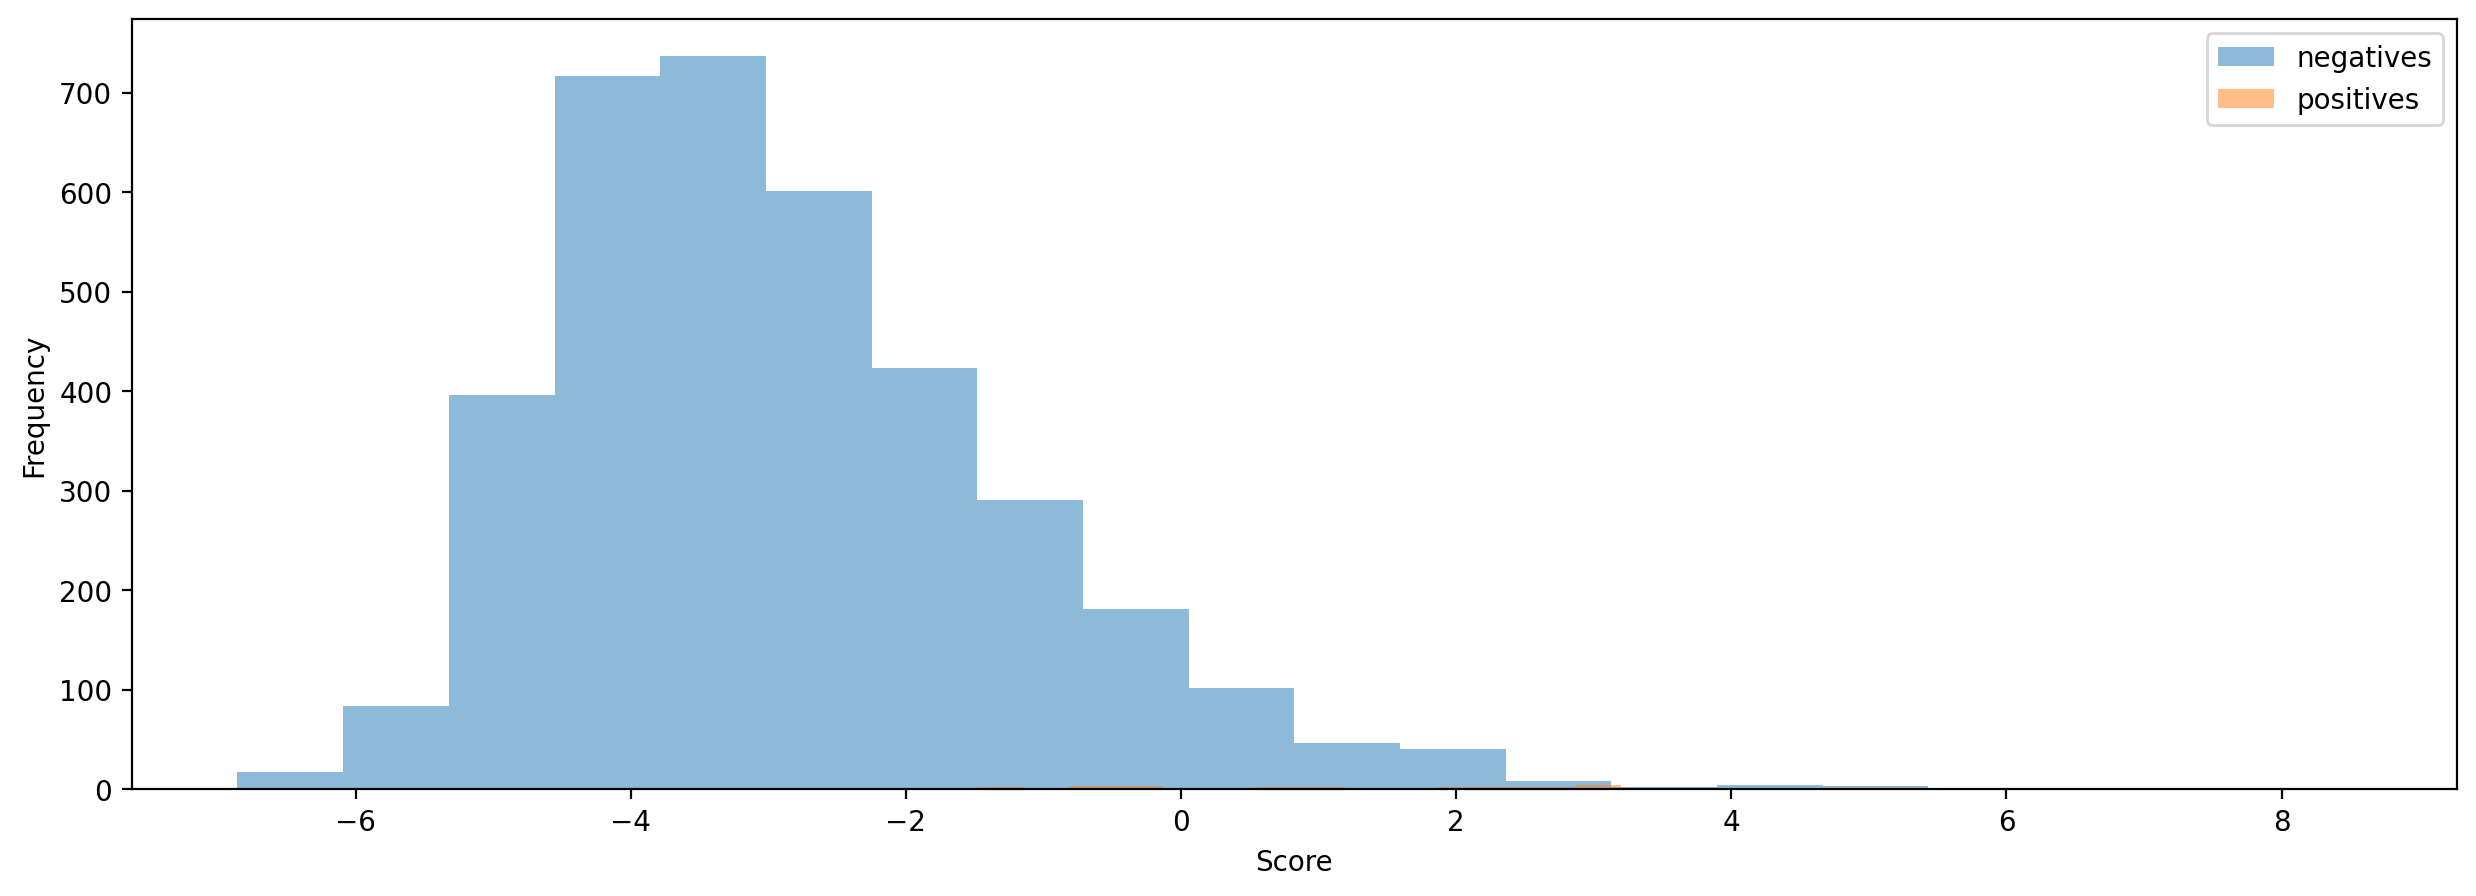

In [30]:
histspecies = 'Zosterops_maderaspatanus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

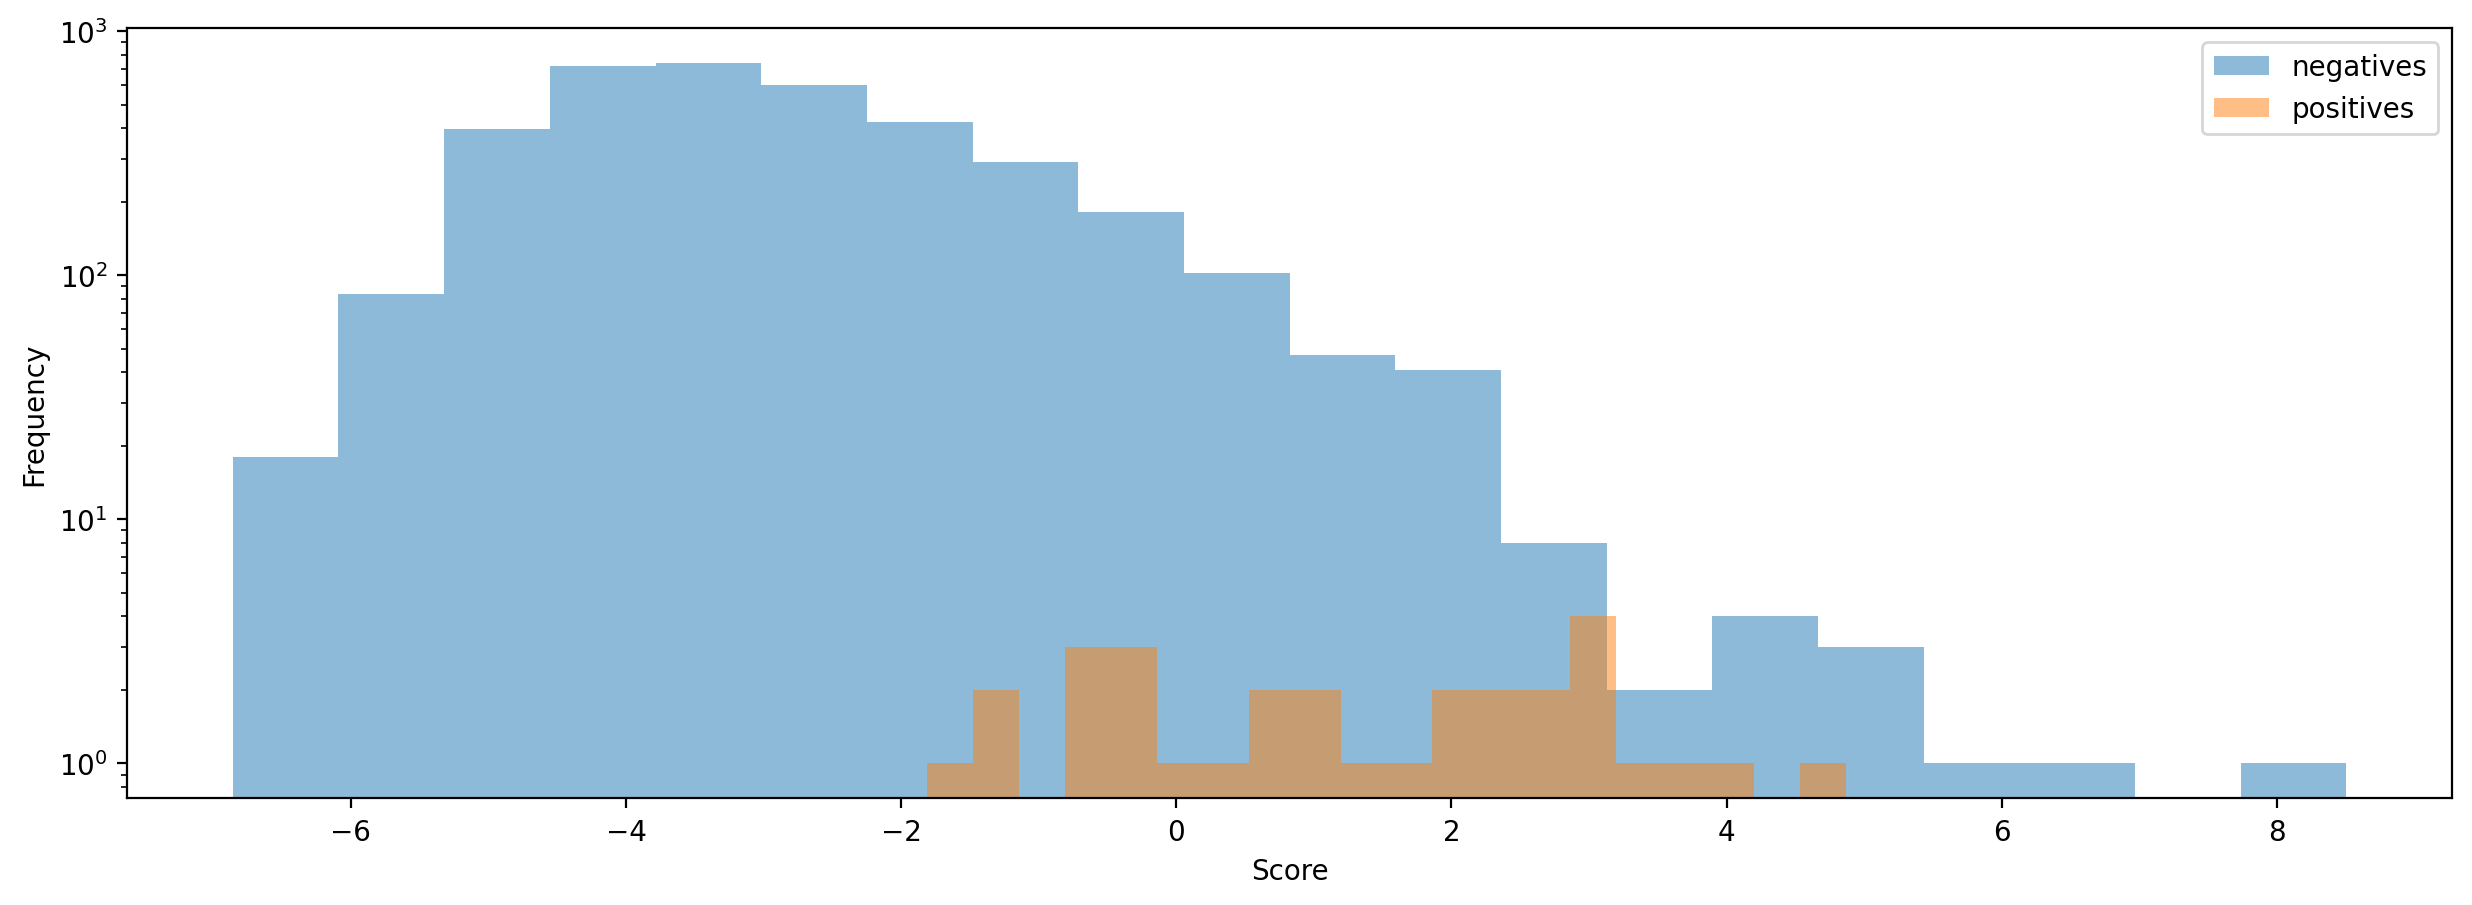

In [31]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

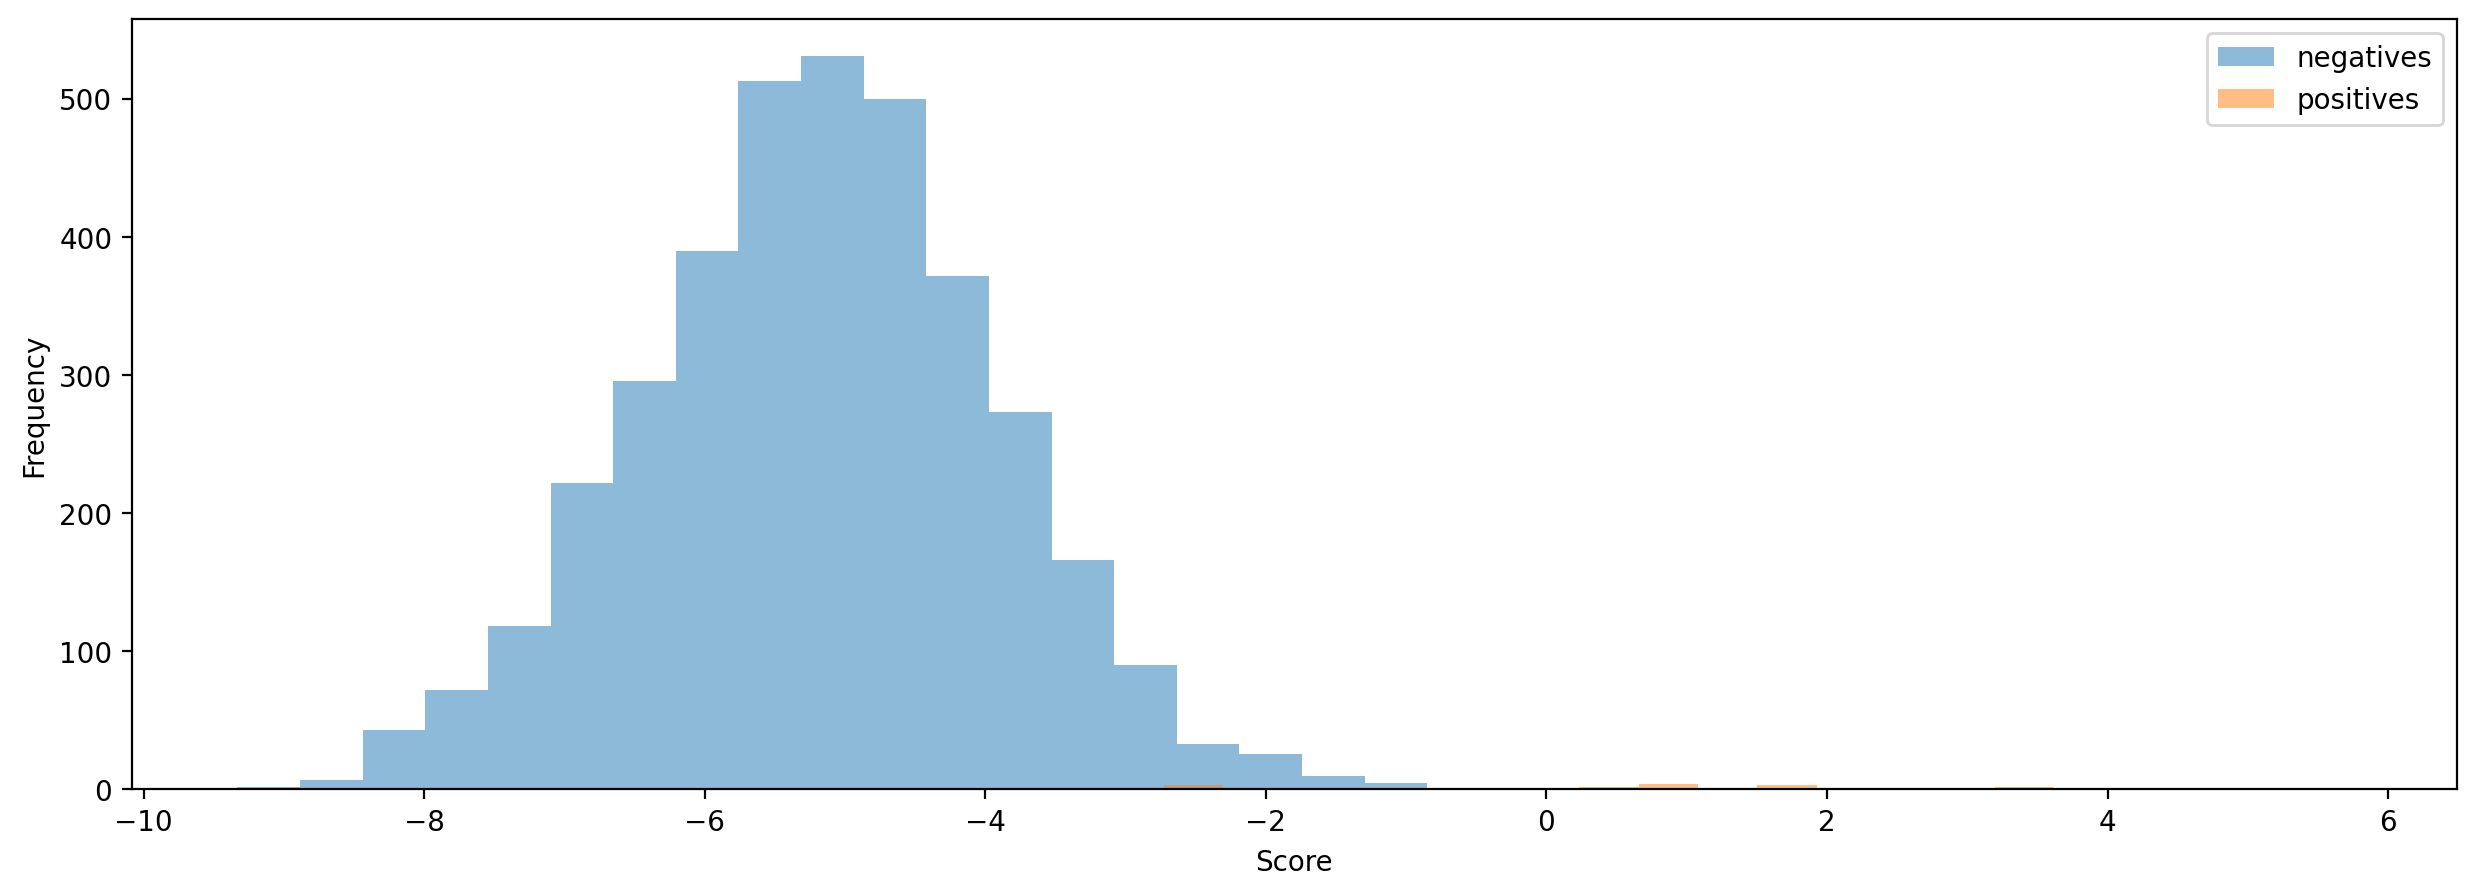

In [32]:
histspecies = 'Eurystomus_glaucurus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

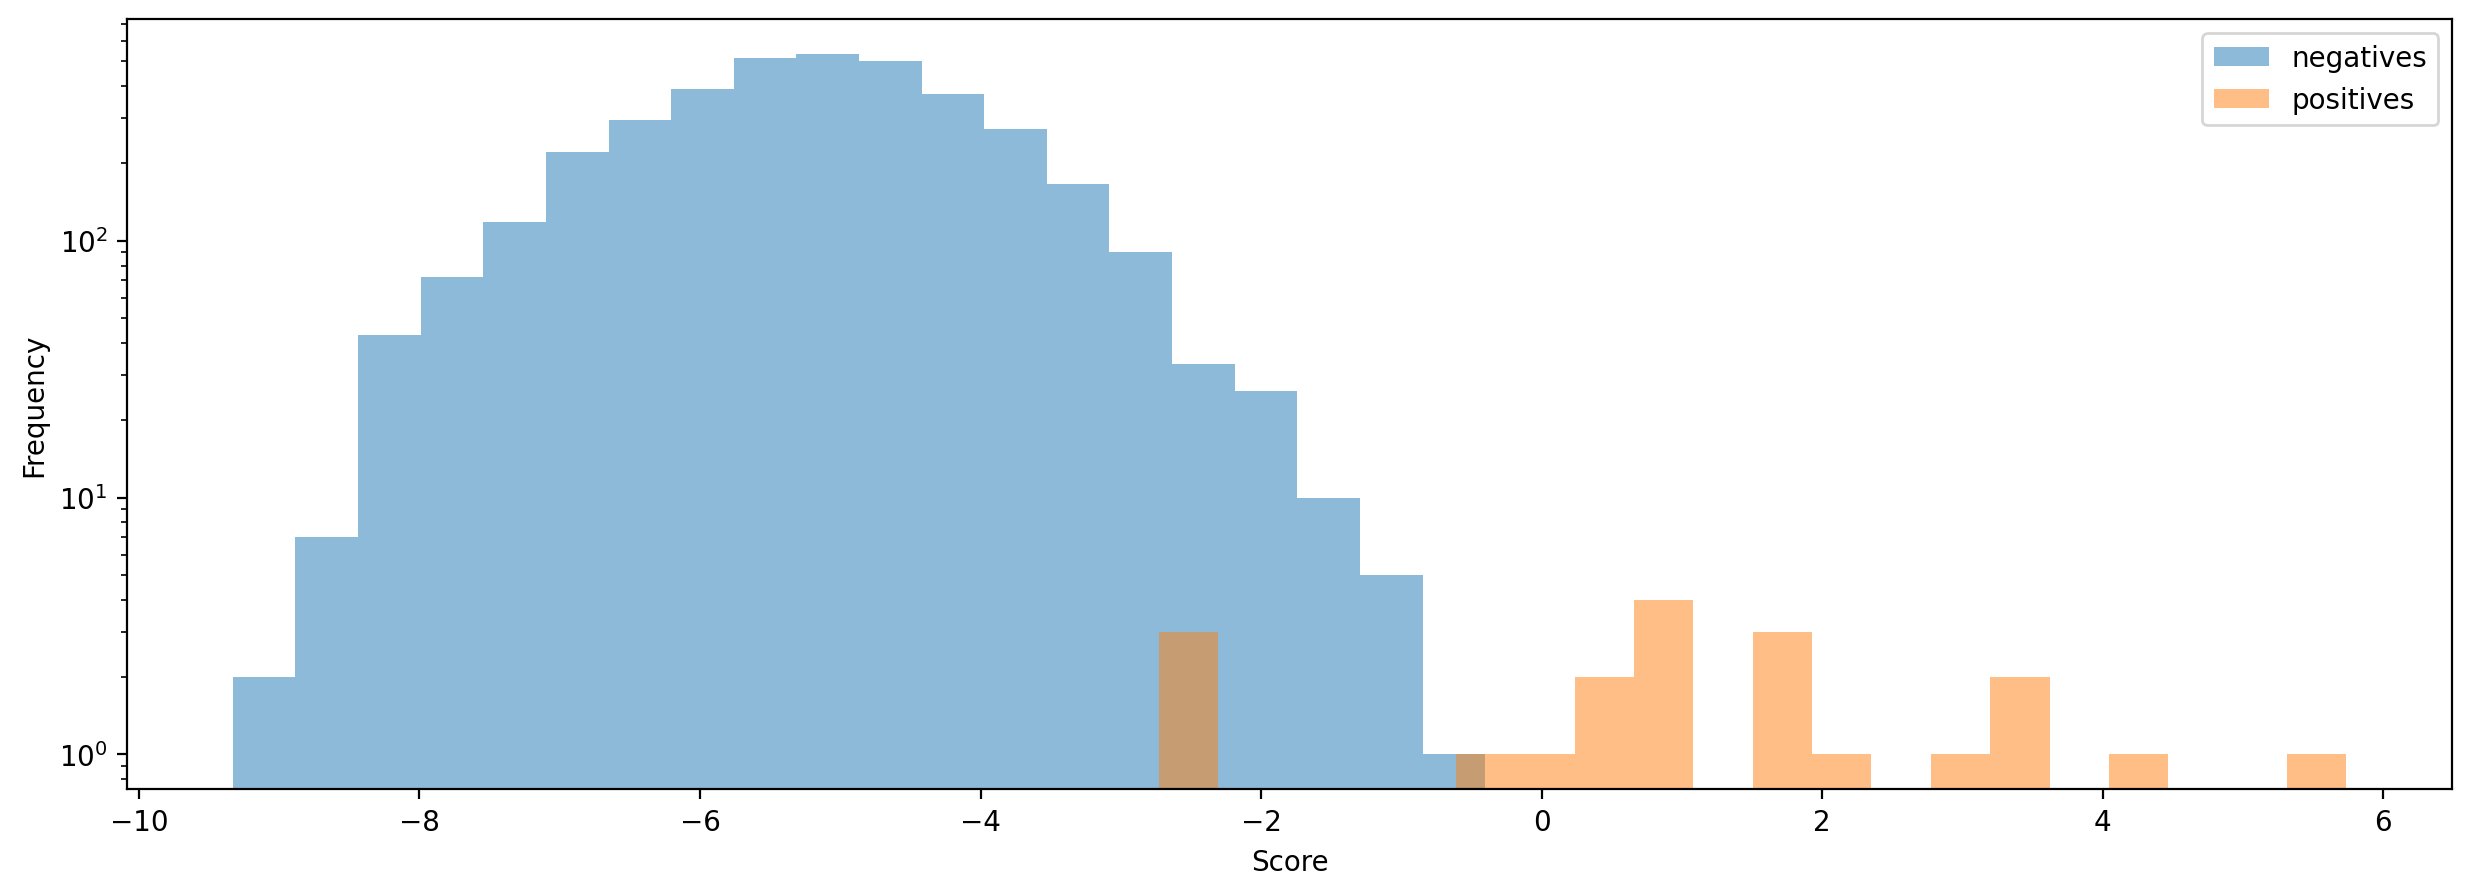

In [33]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

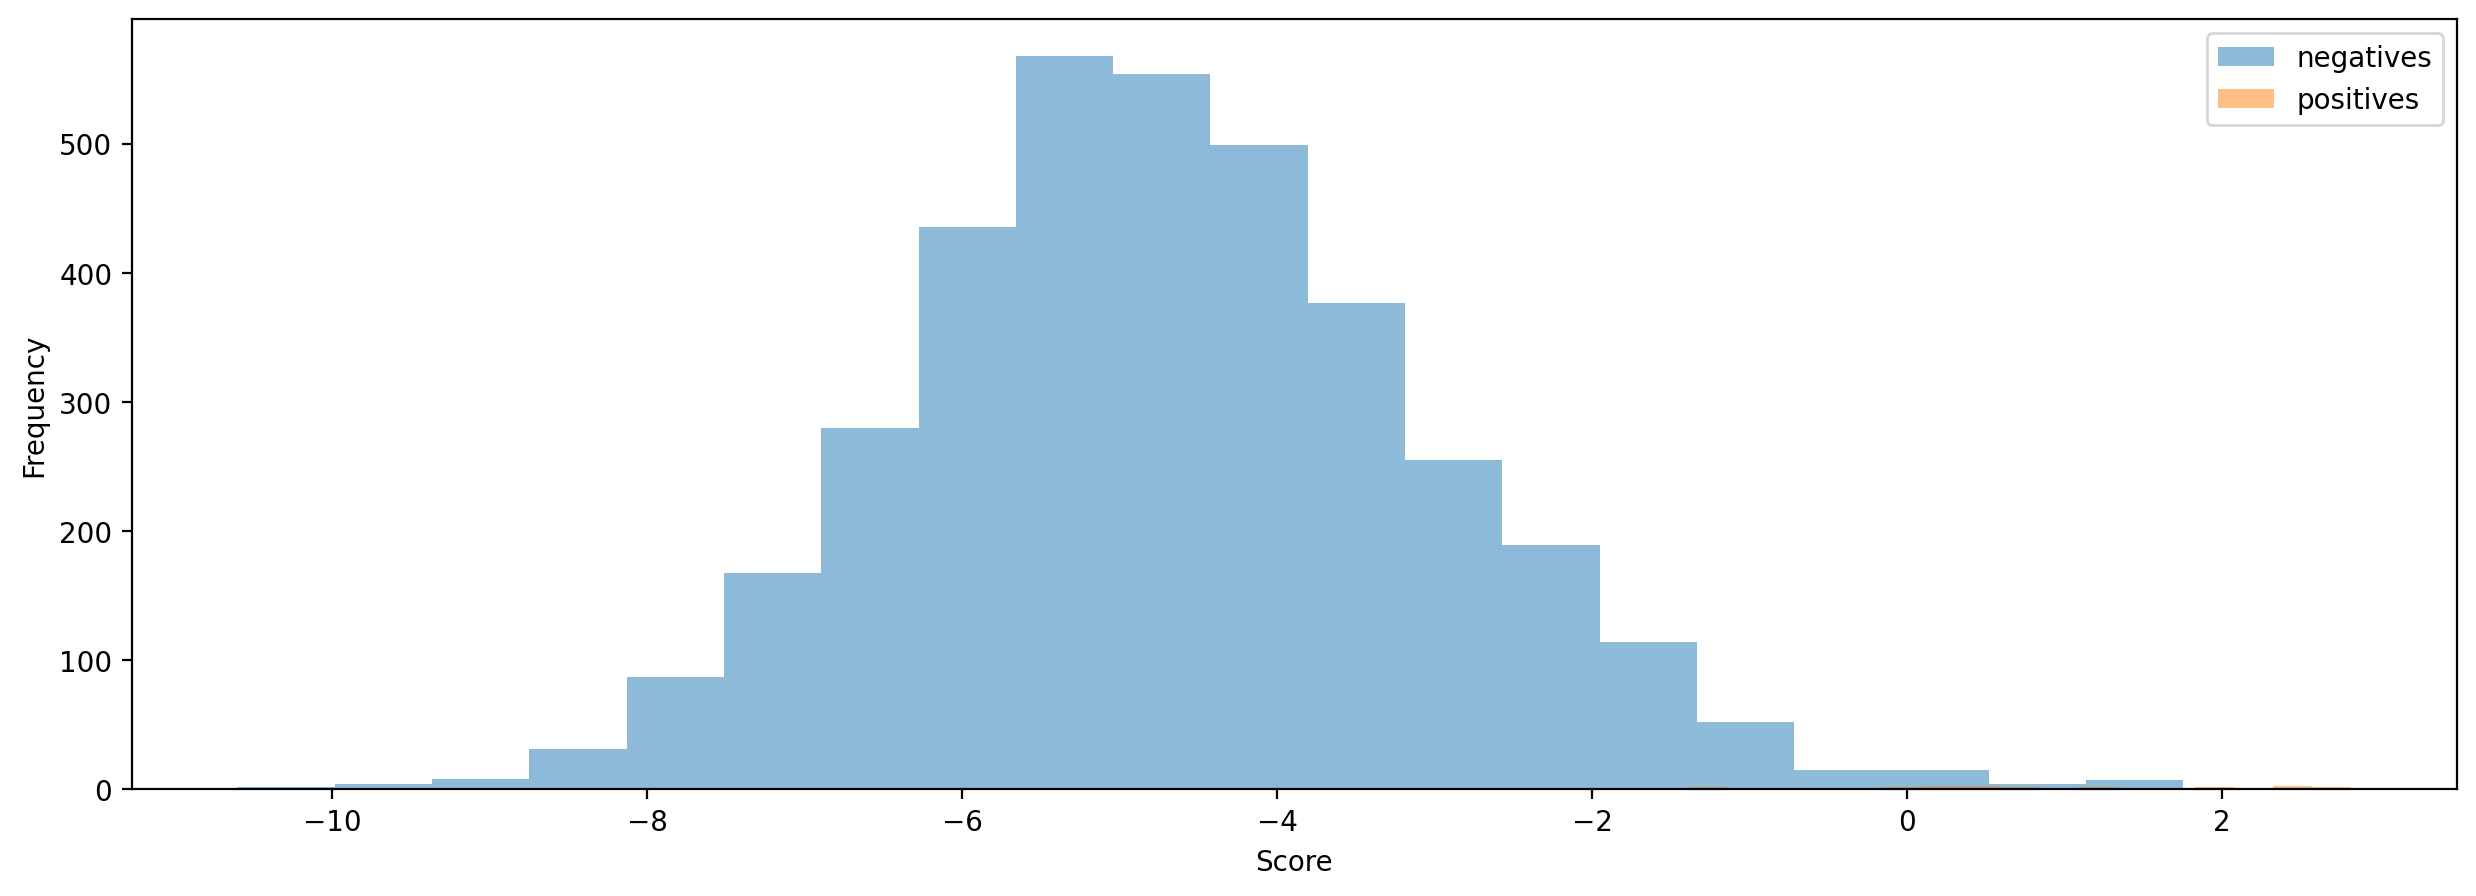

In [34]:
histspecies = 'Agapornis_canus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

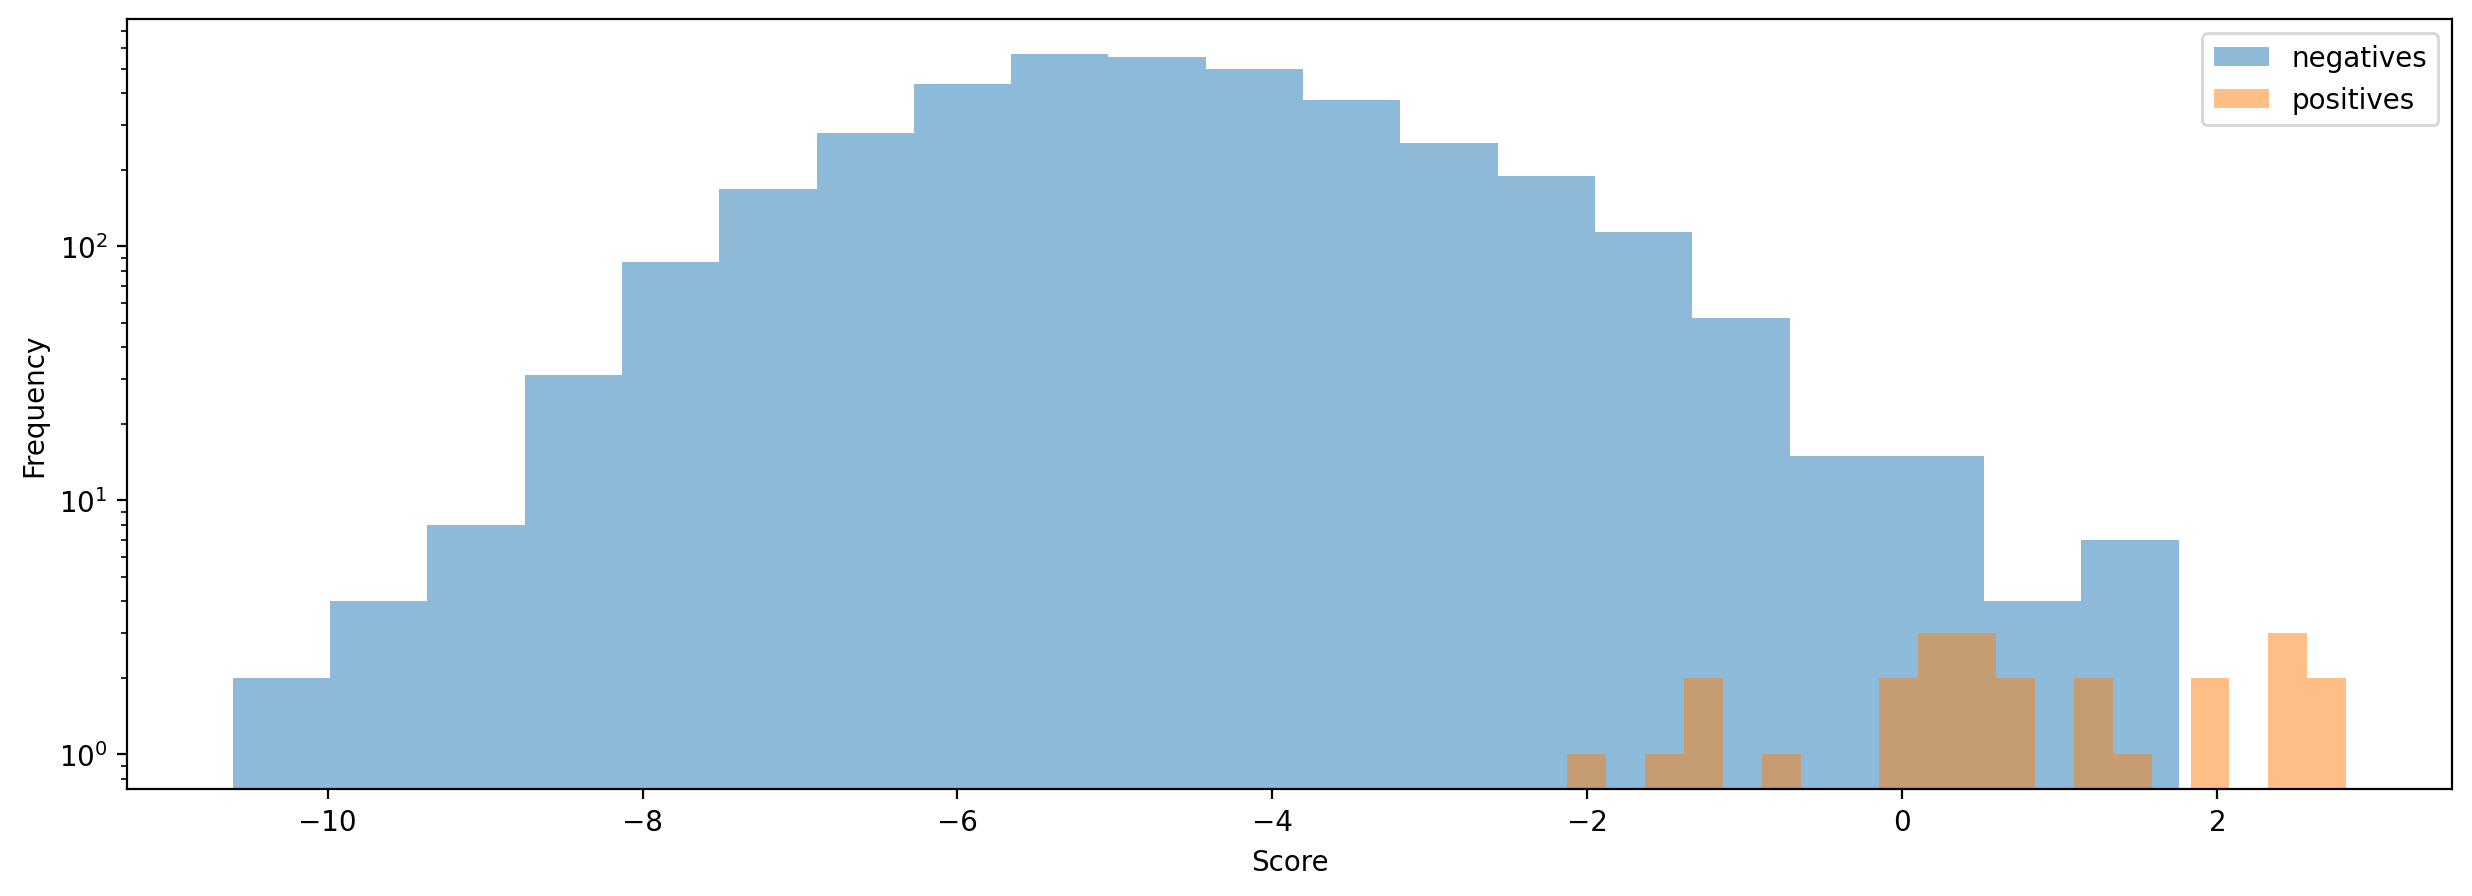

In [35]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

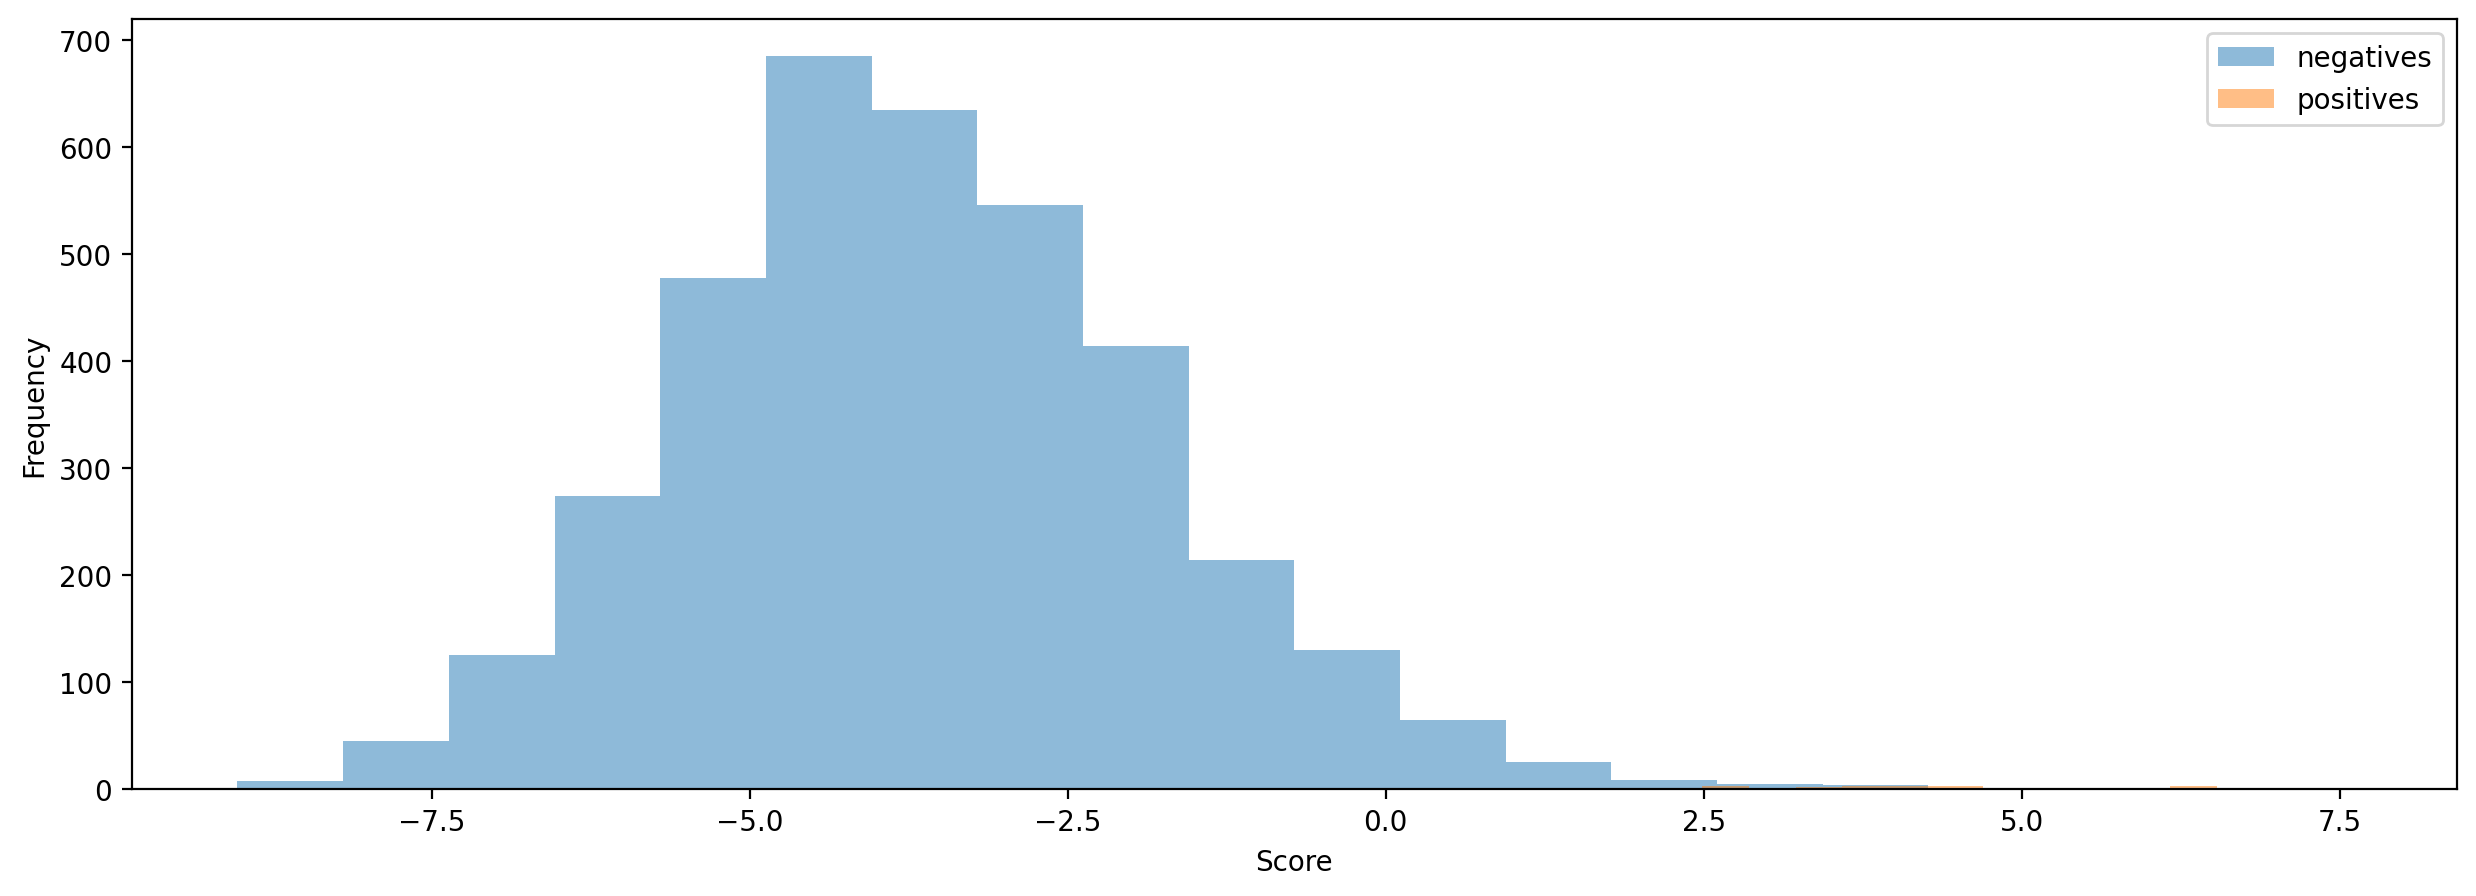

In [36]:
histspecies = 'Saxicola_torquatus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

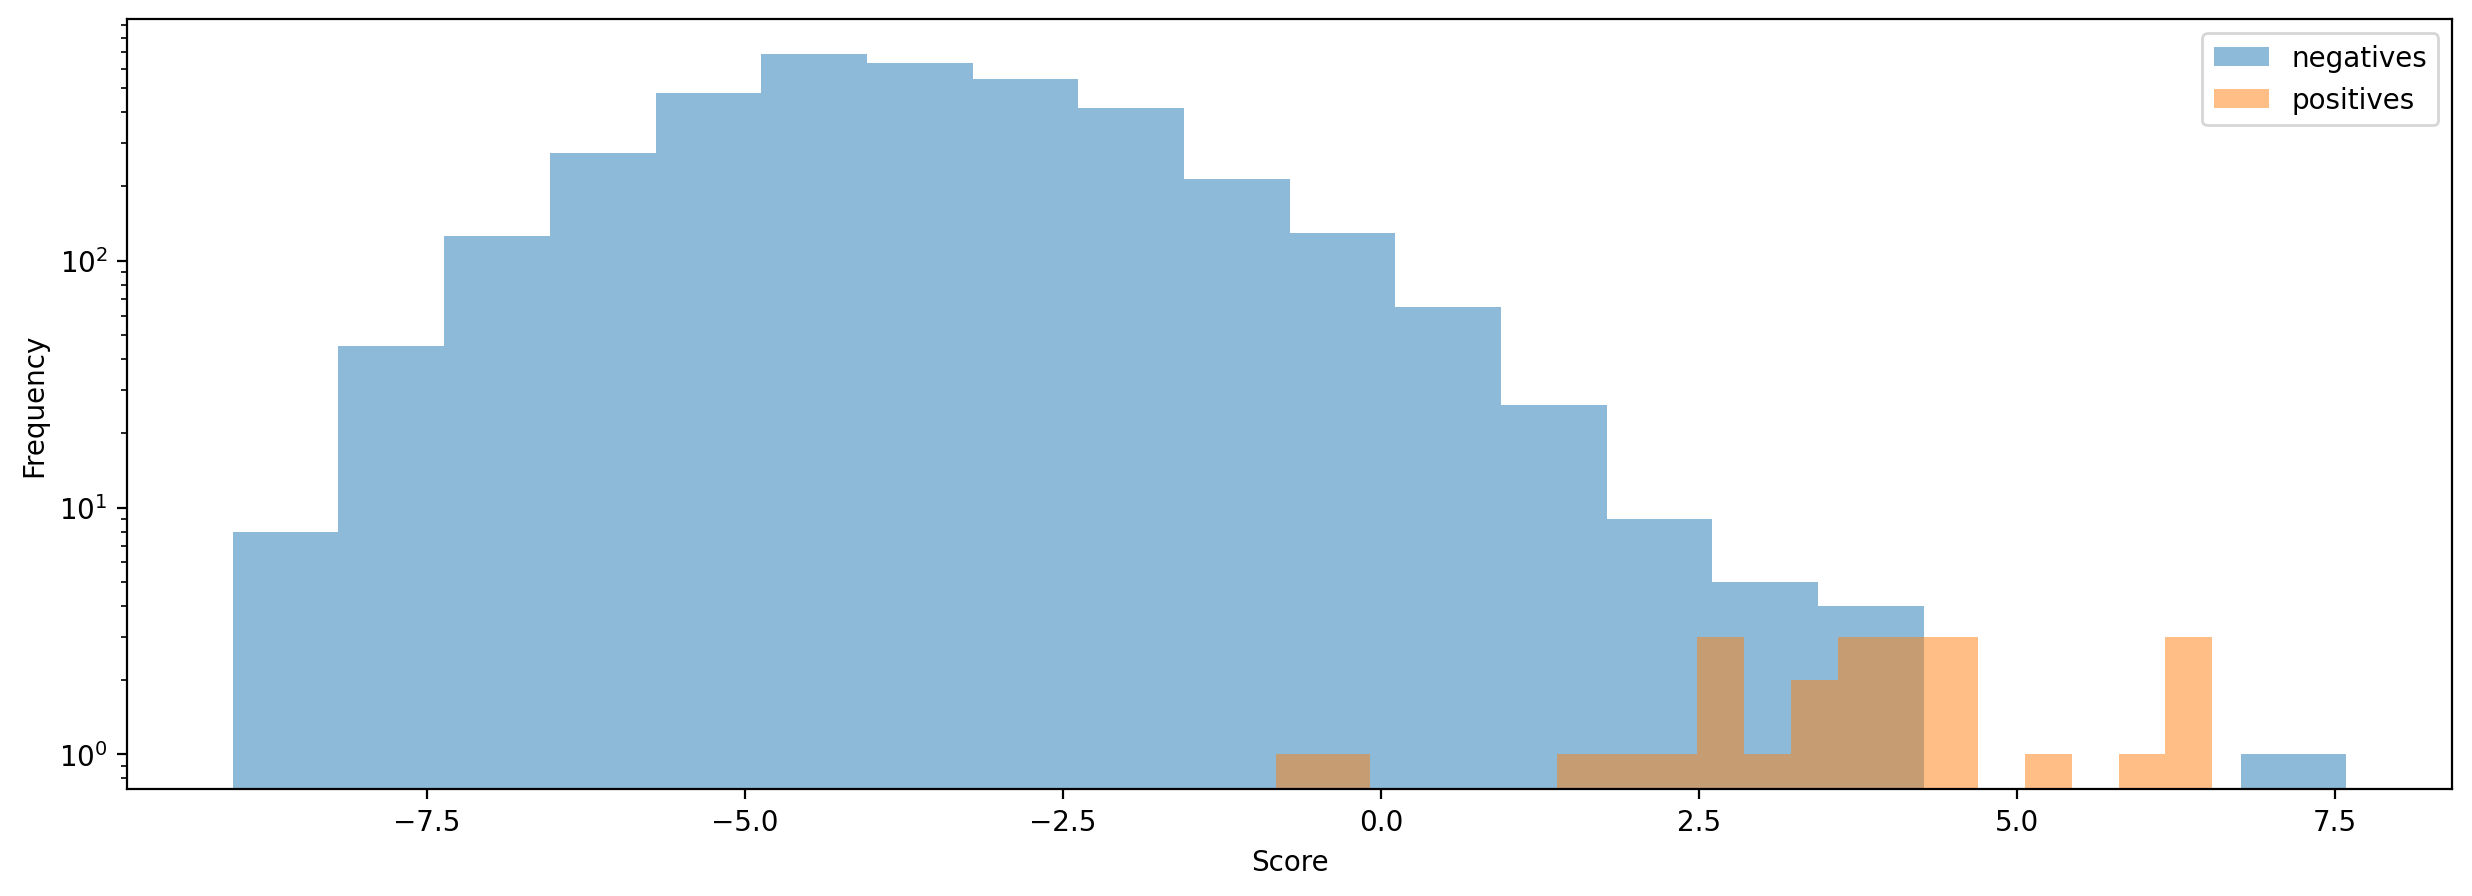

In [37]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

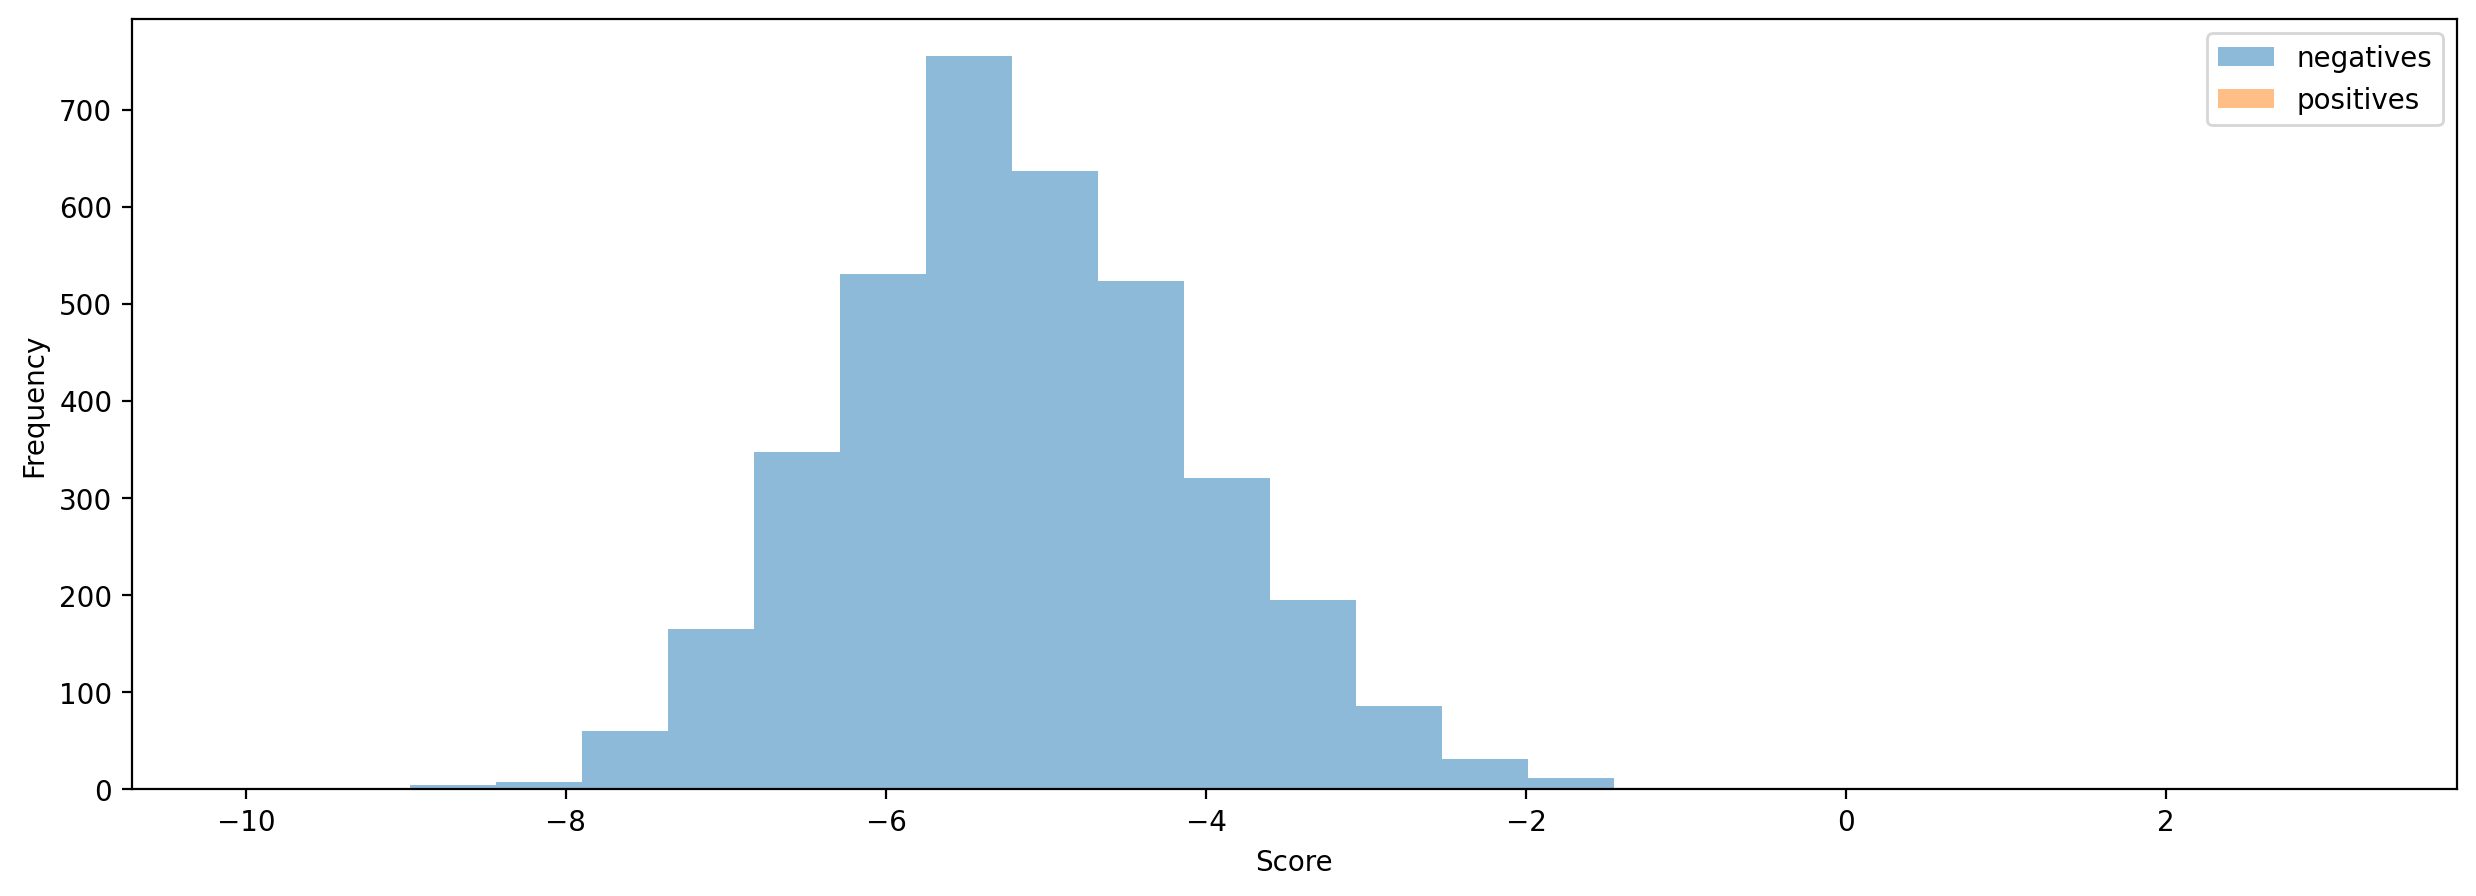

In [38]:
histspecies = 'Cyanolanius_madagascarinus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

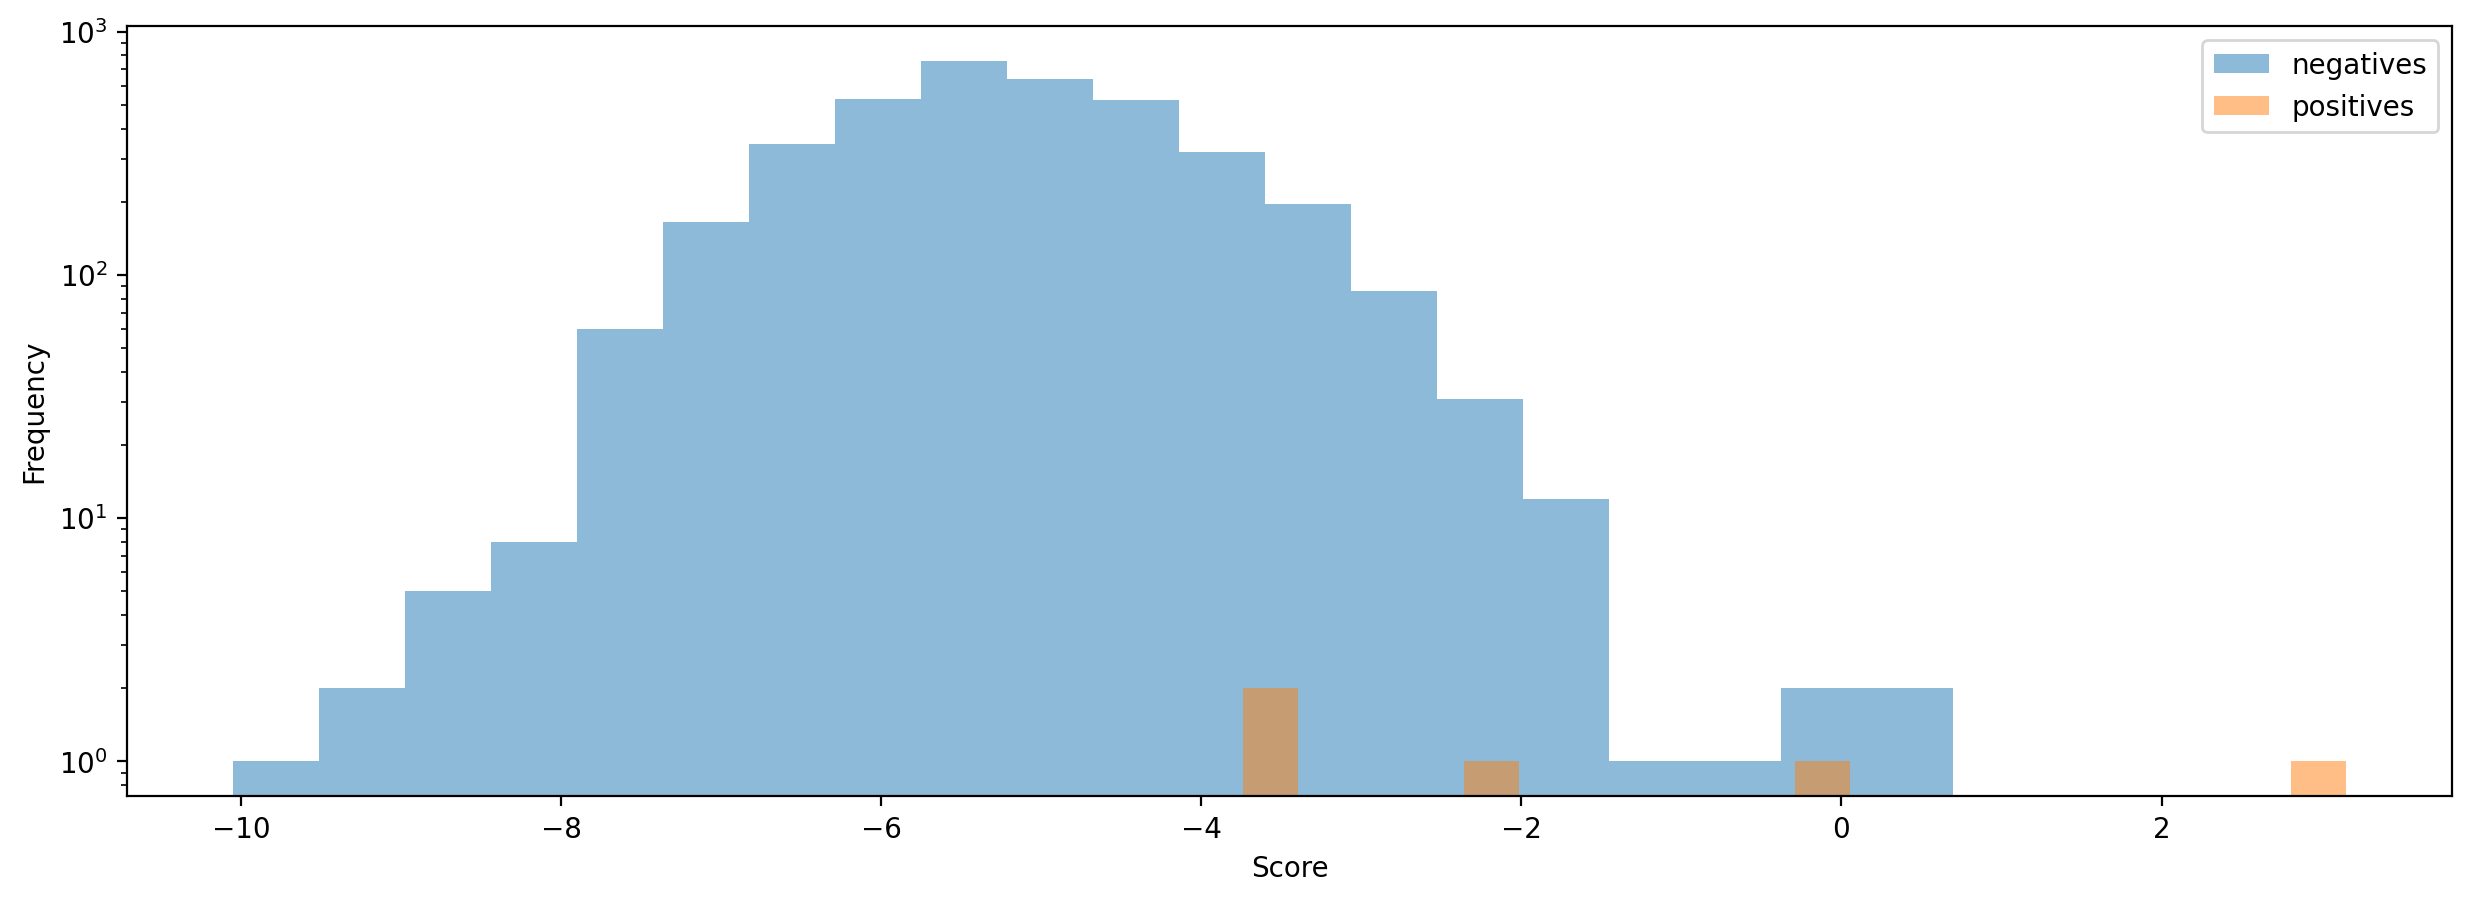

In [39]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

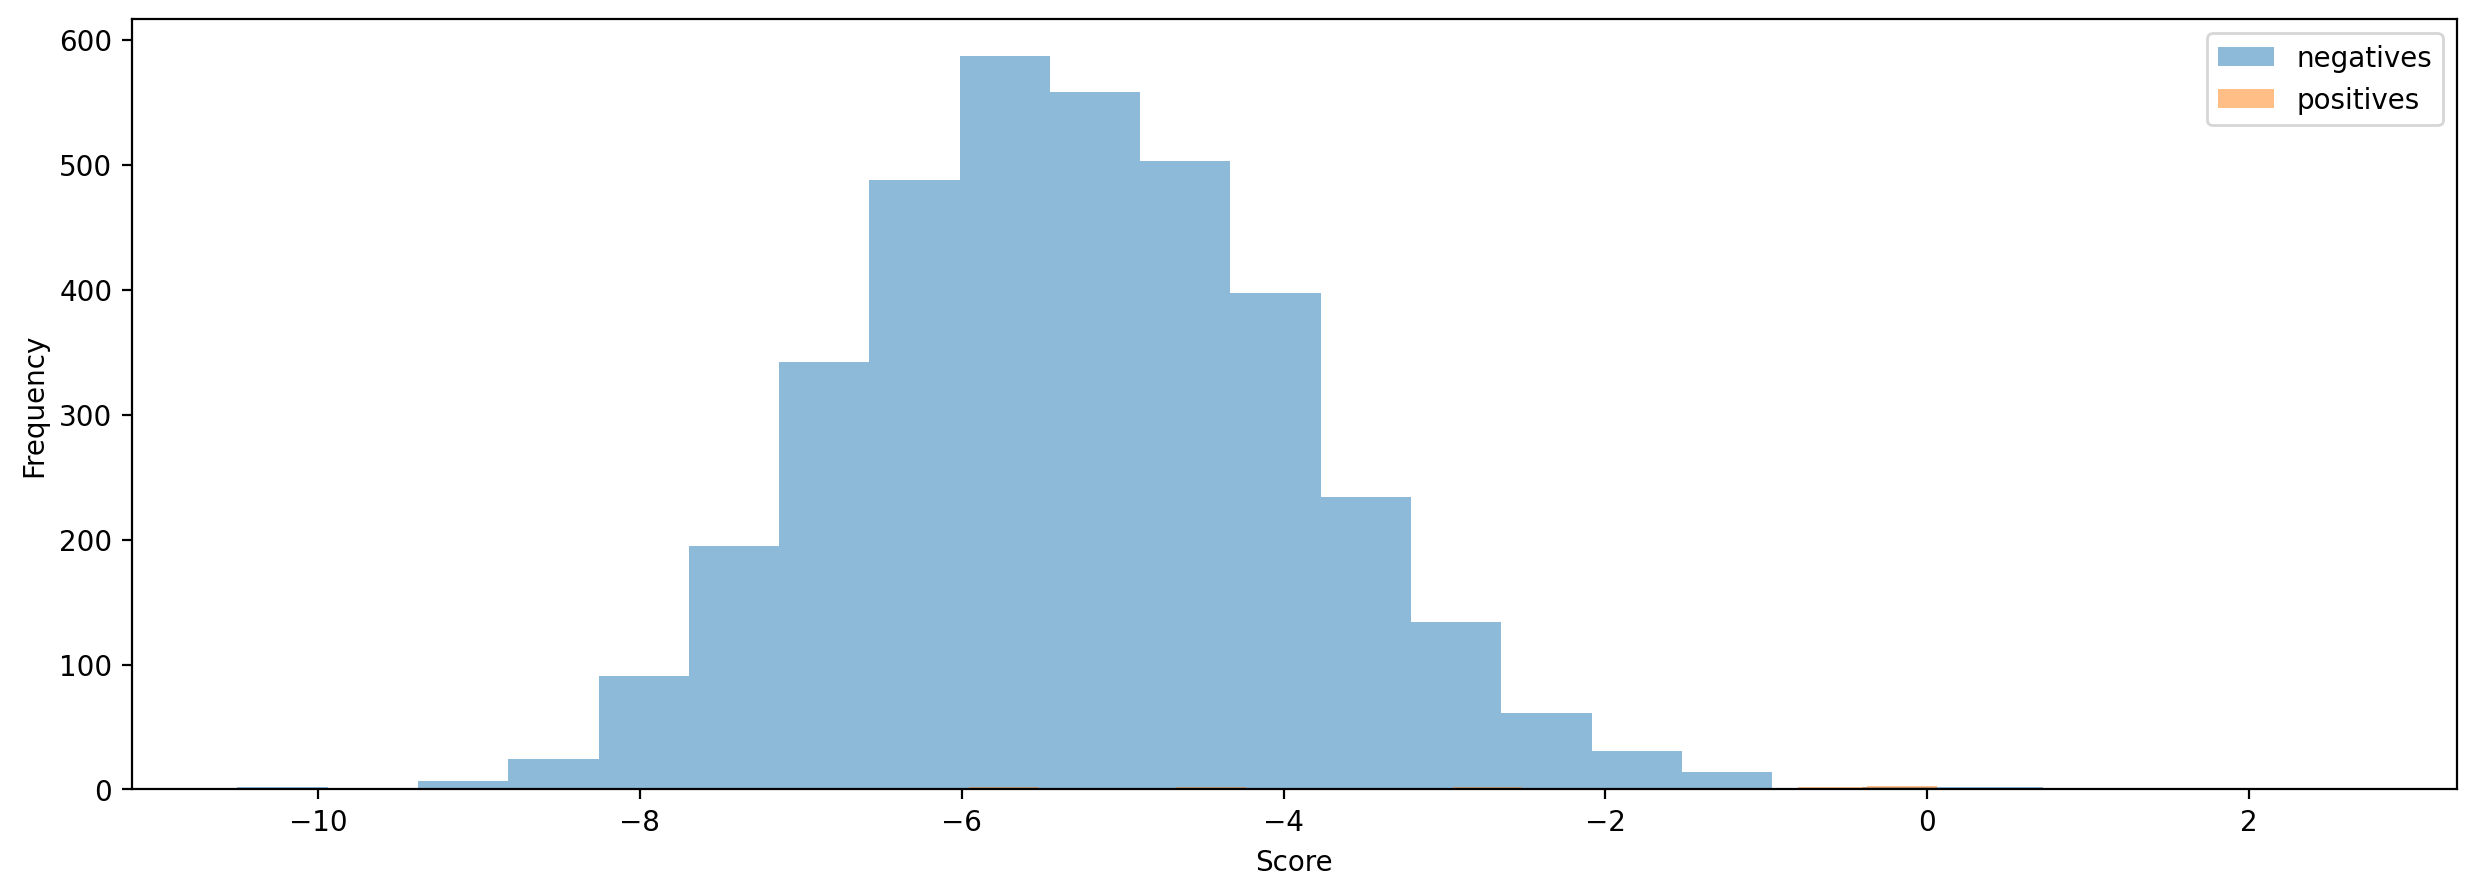

In [40]:
histspecies = 'Leptopterus_chabert'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

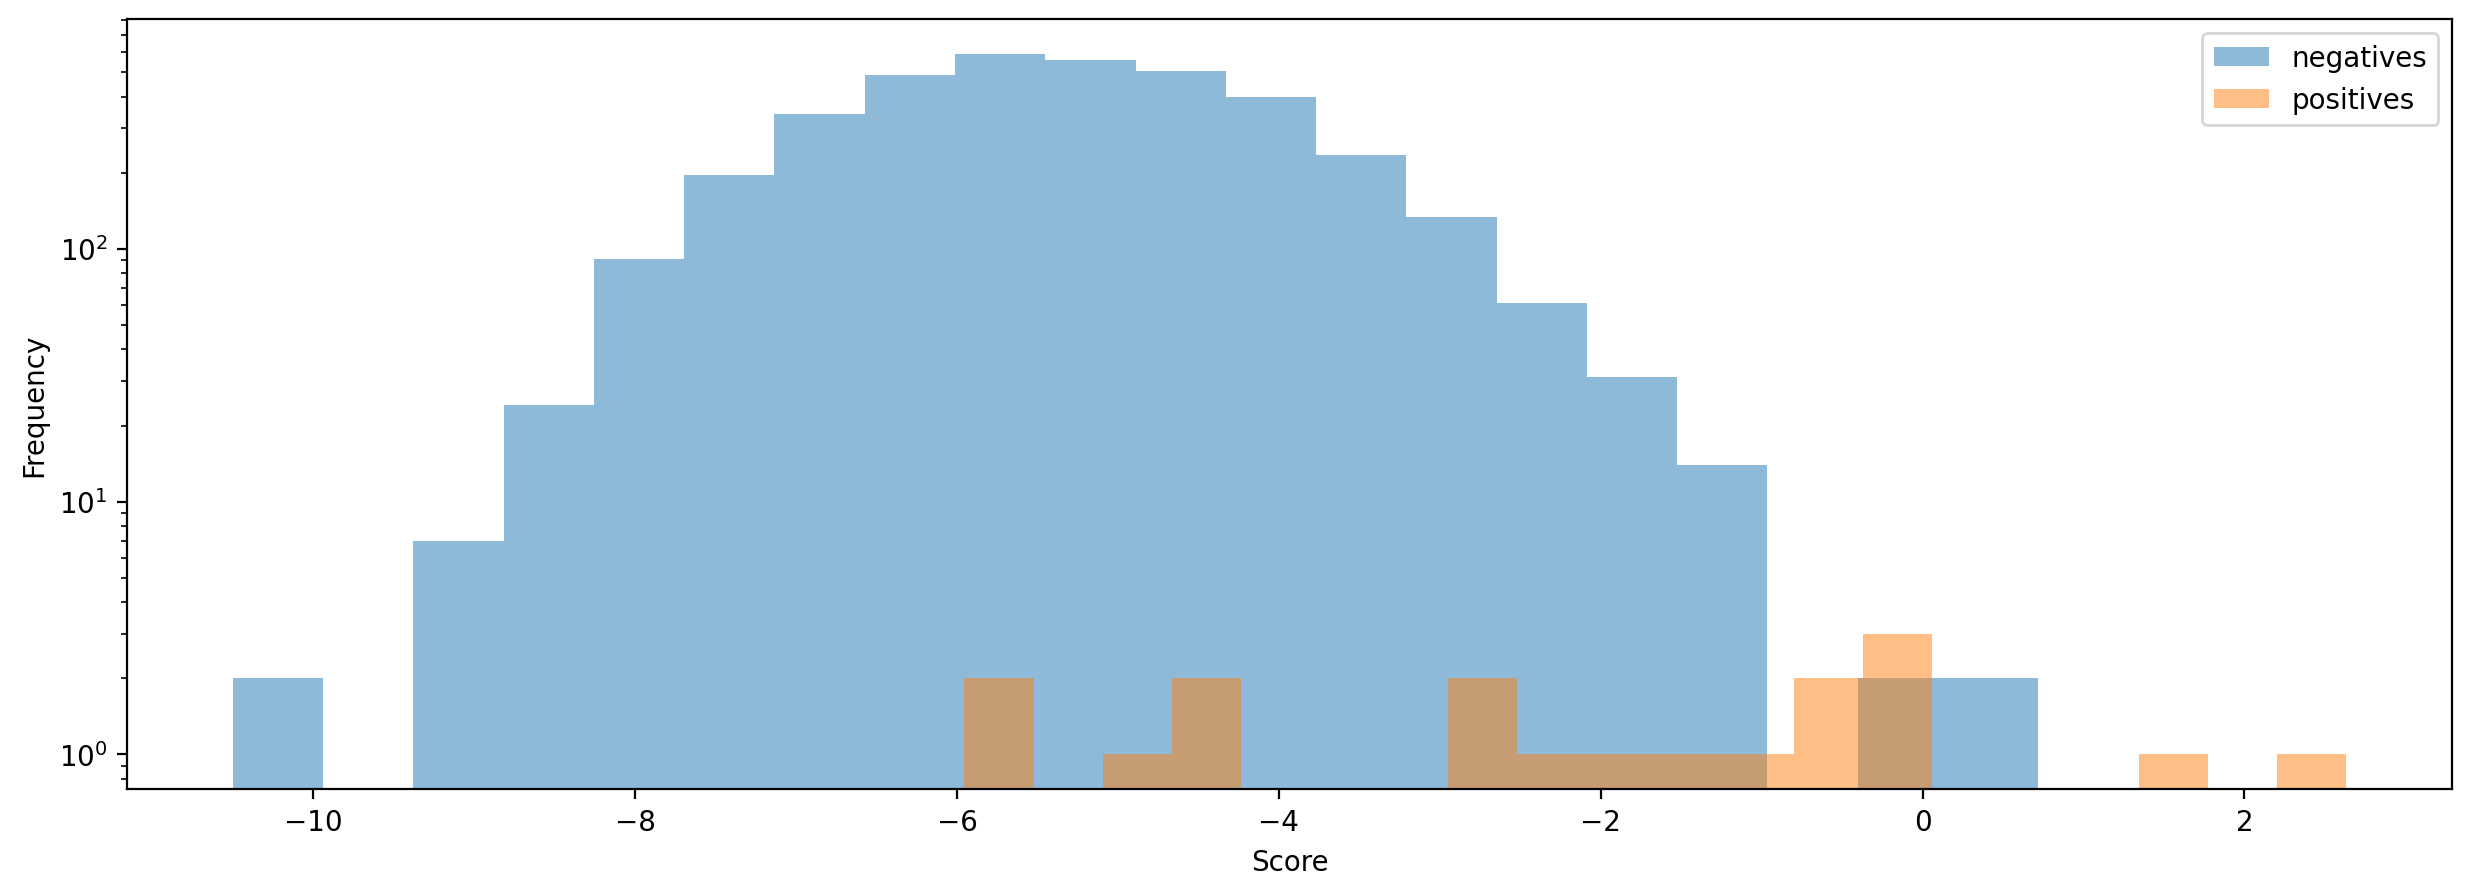

In [41]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

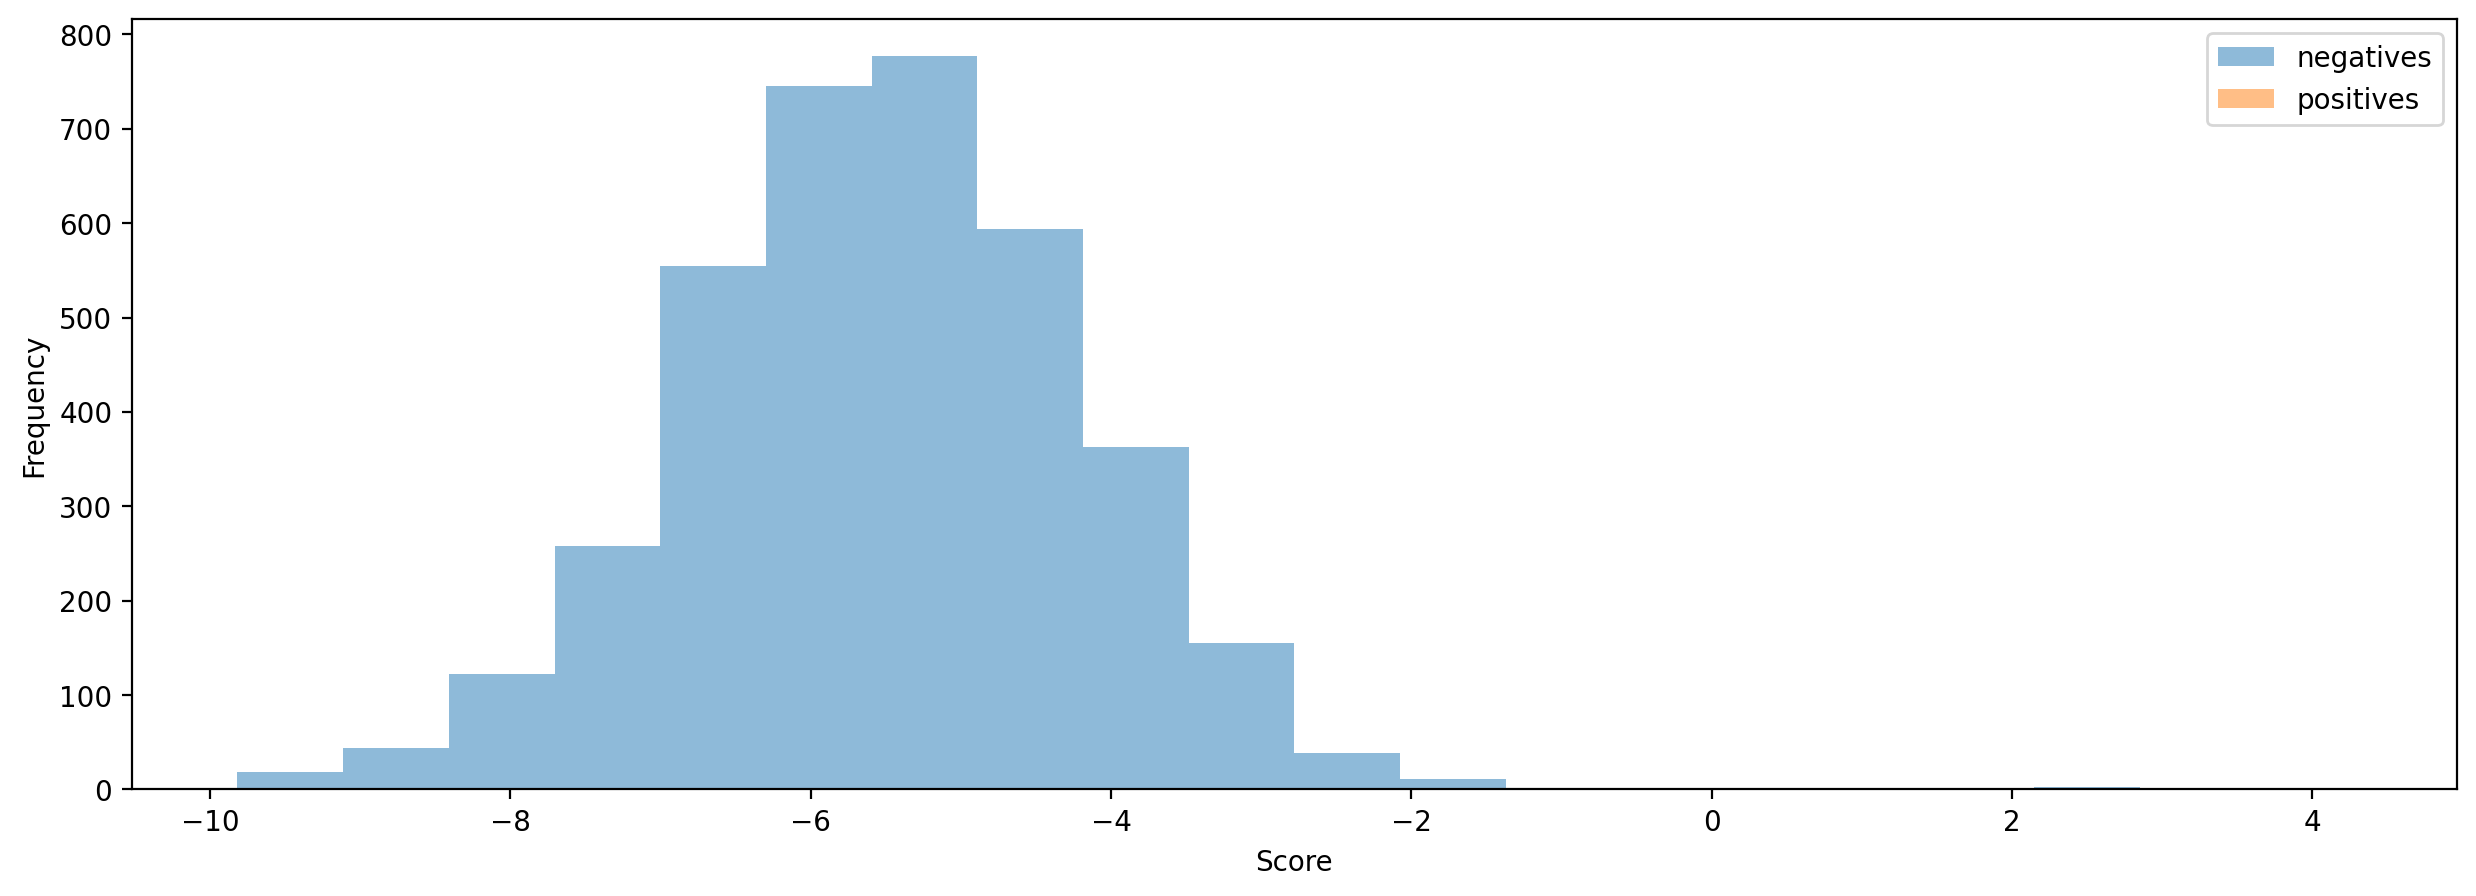

In [42]:
histspecies = 'Nesoenas_picturatus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

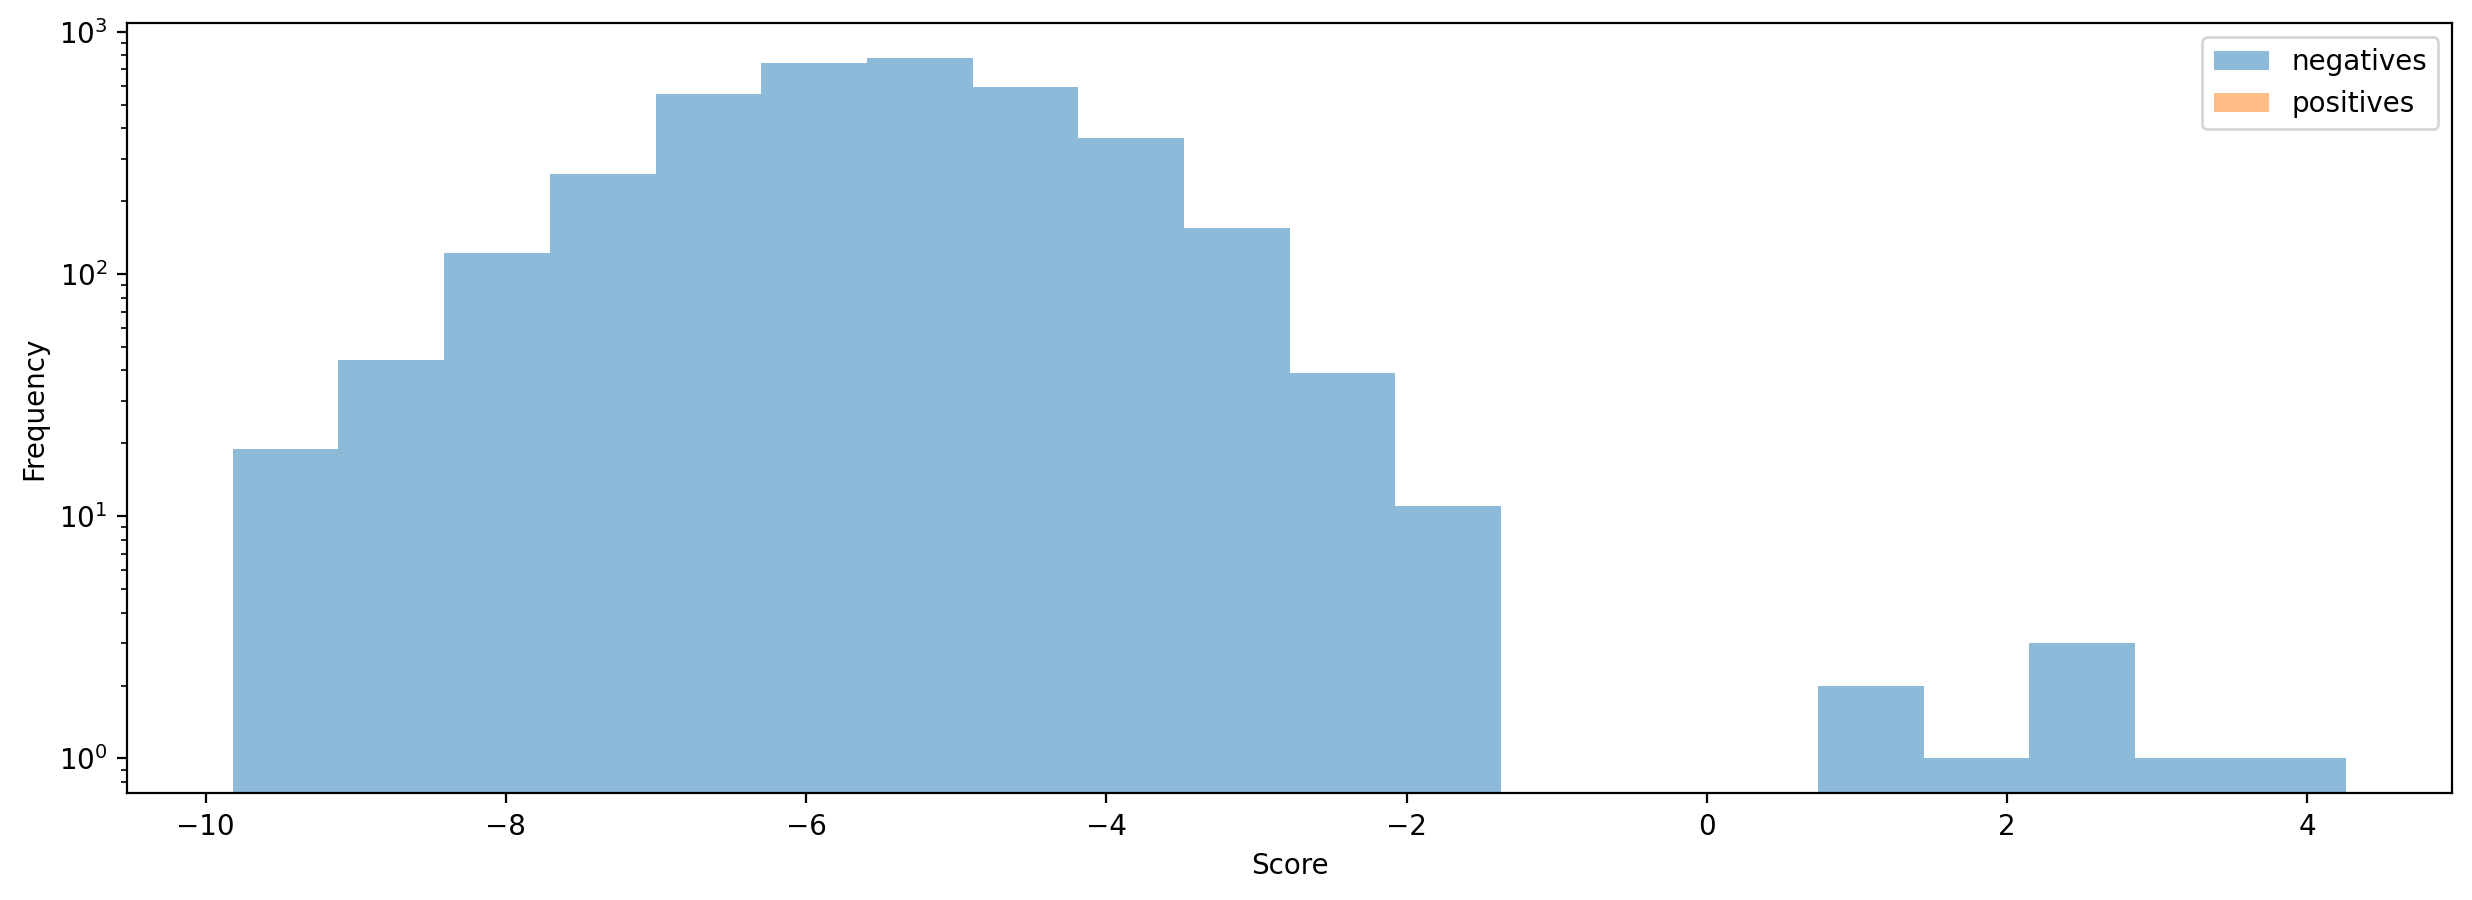

In [43]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

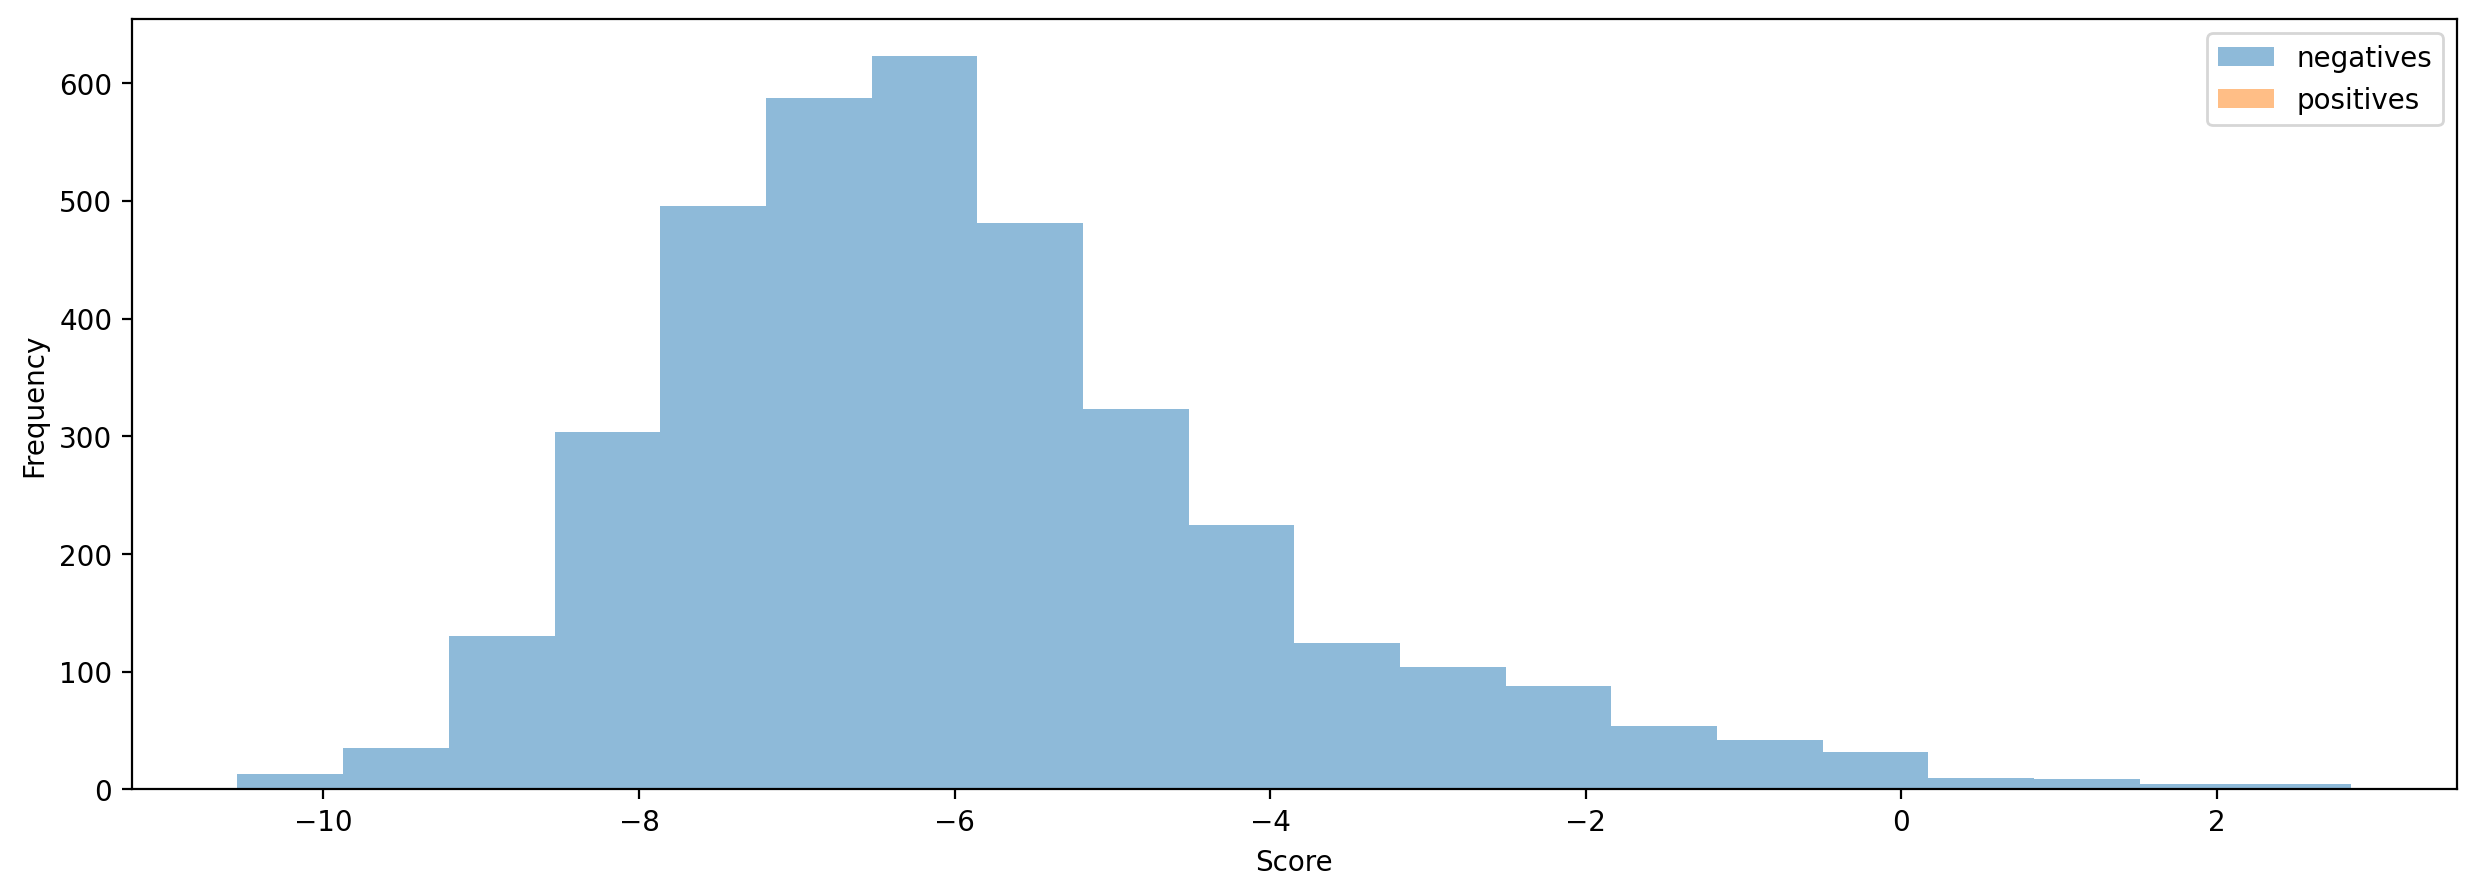

In [44]:
histspecies = 'Coua_reynaudii'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

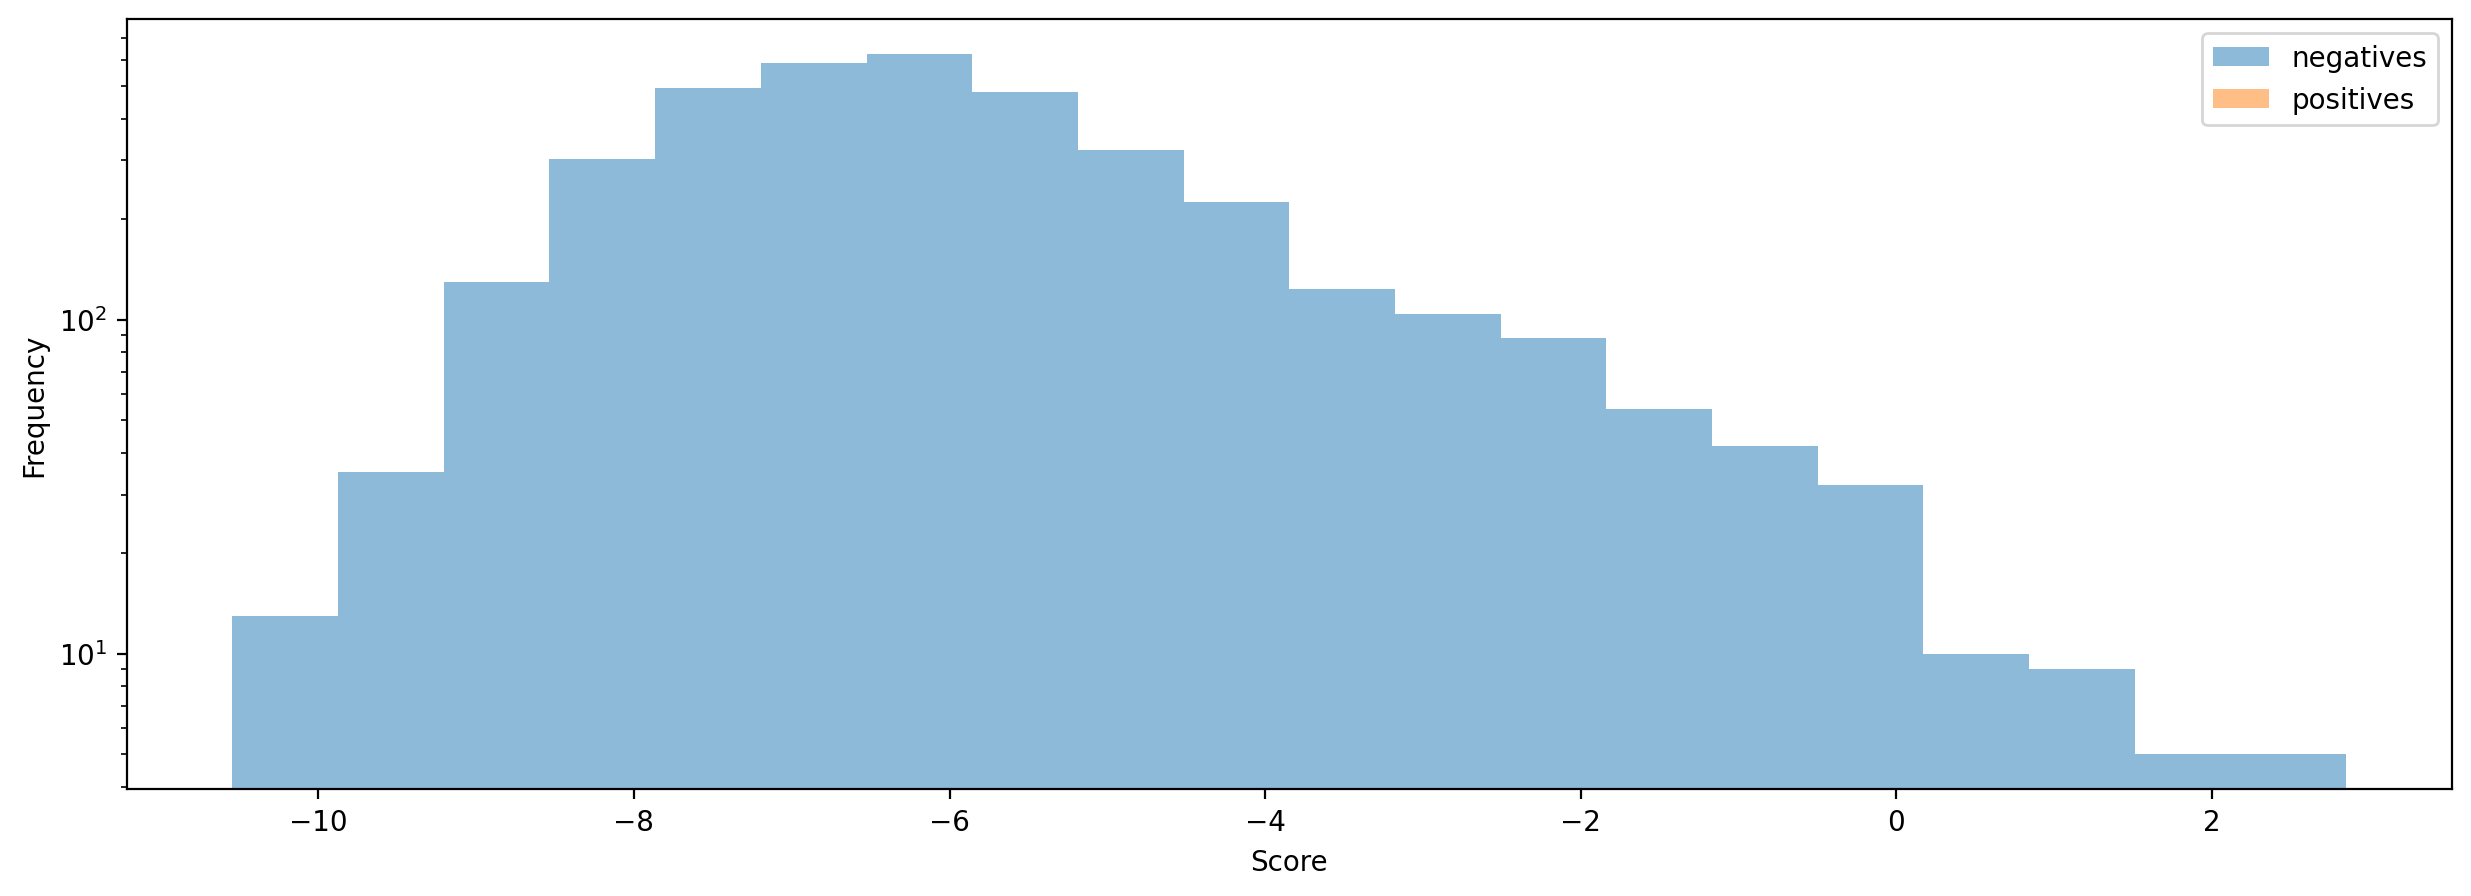

In [45]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

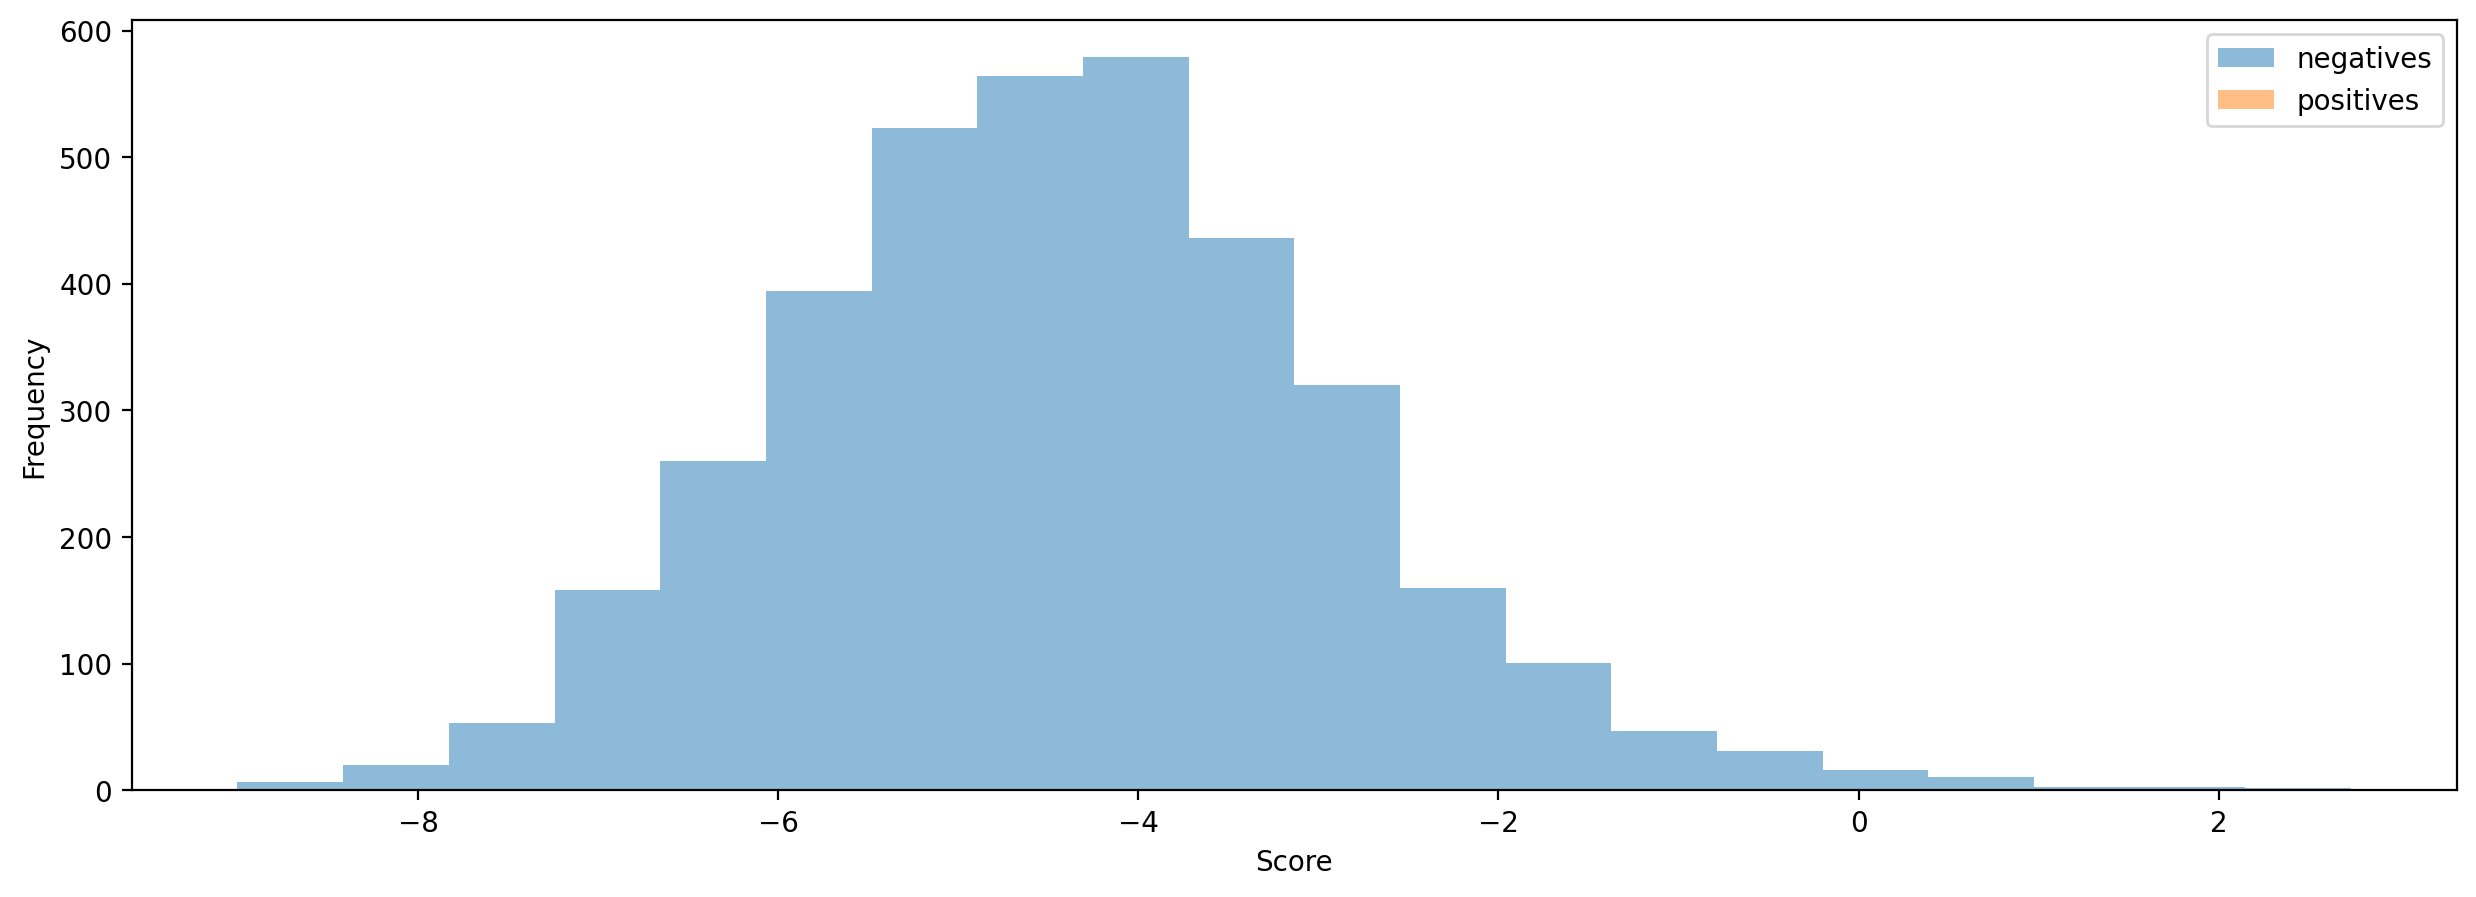

In [46]:
histspecies = 'Ceblepyris_cinereus'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

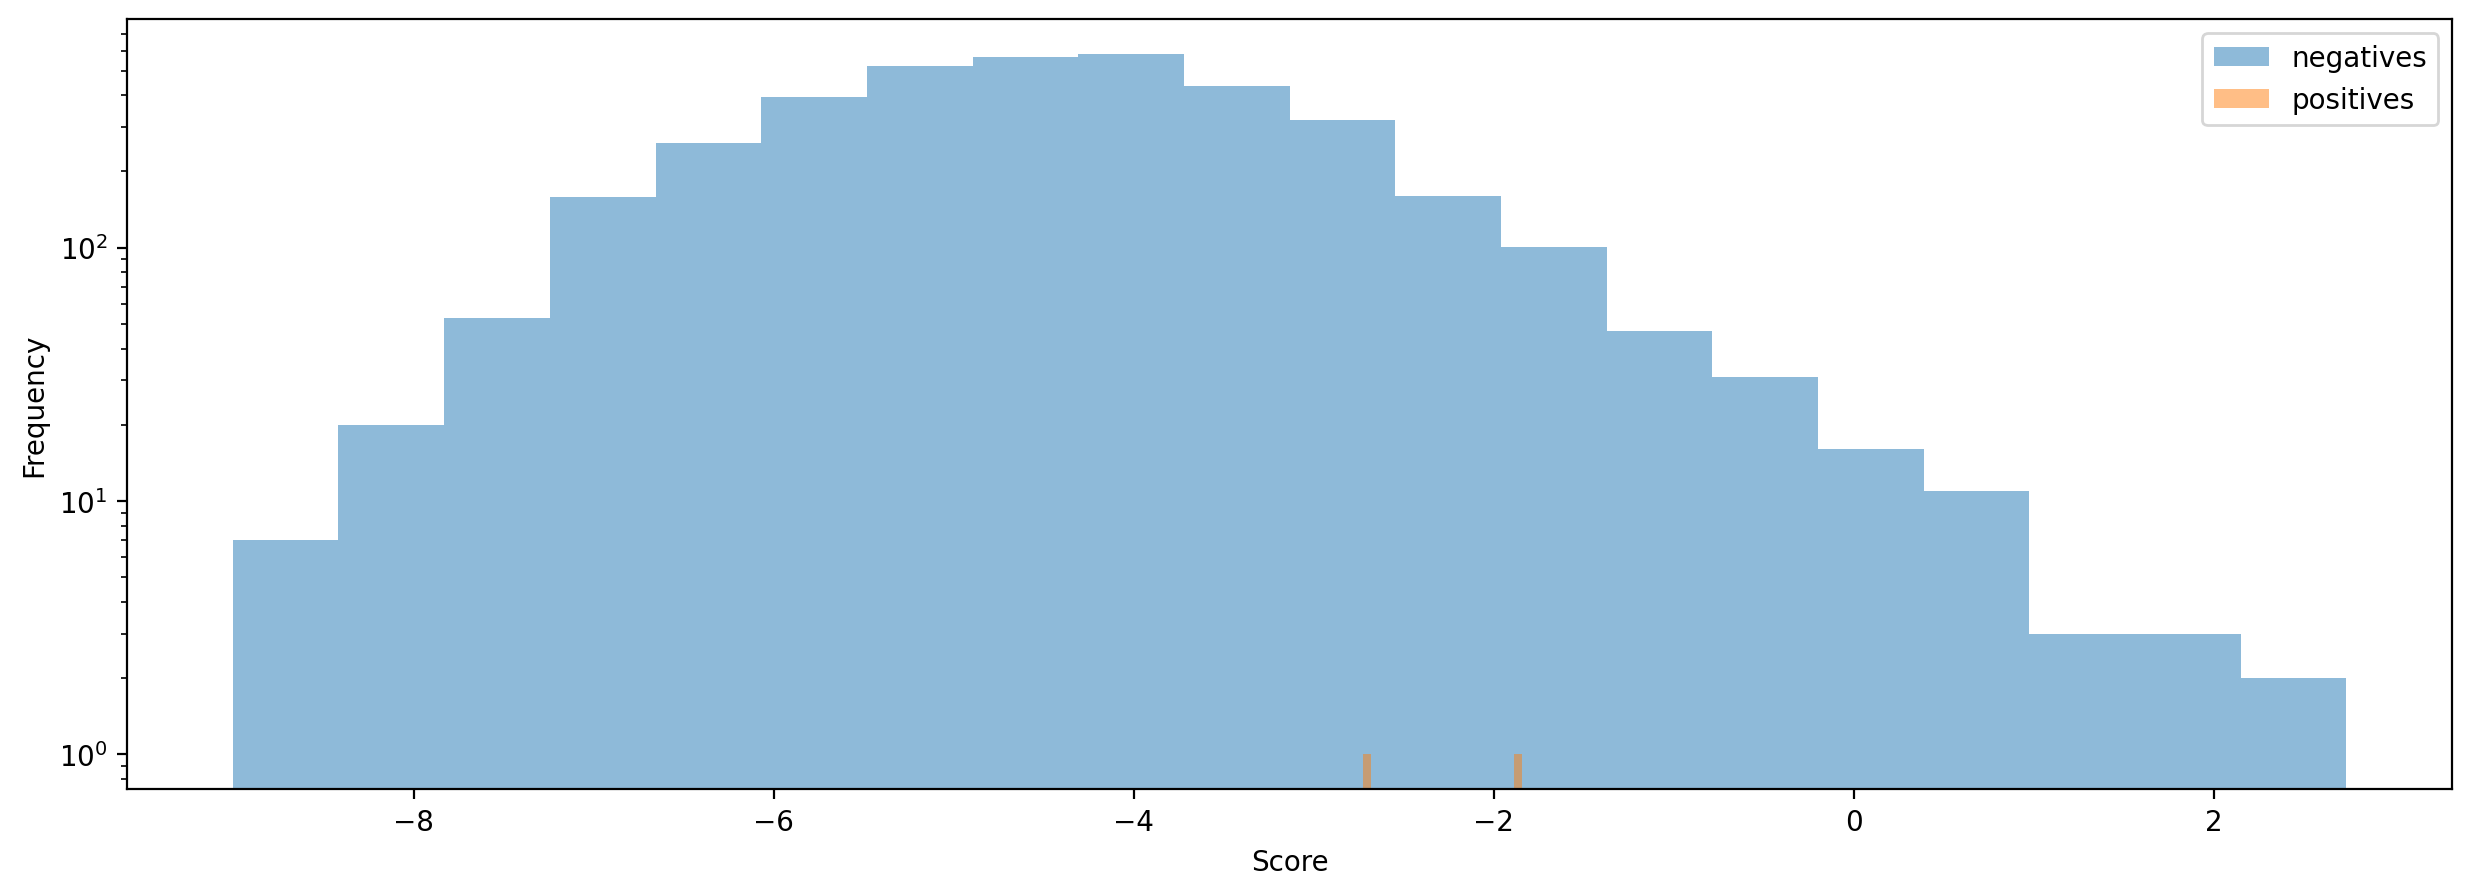

In [47]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

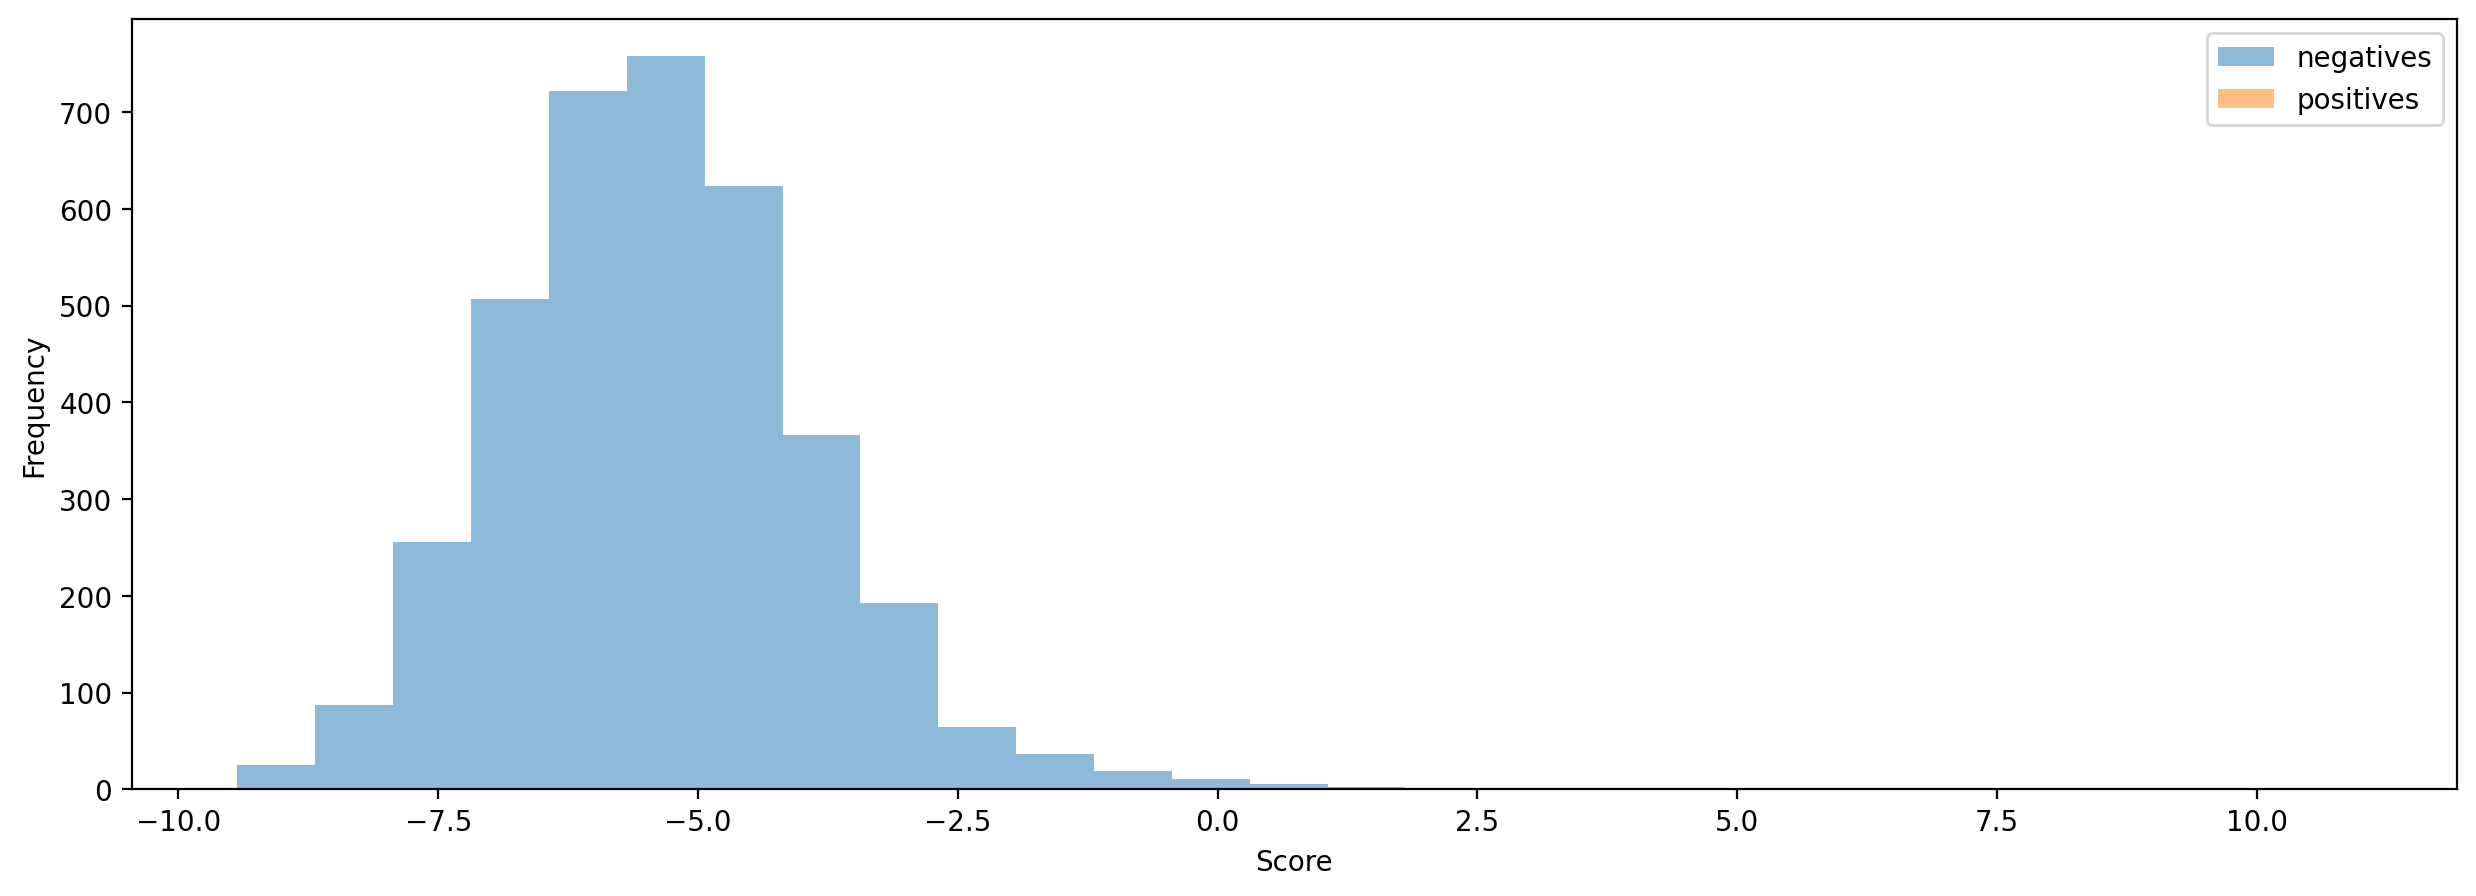

In [48]:
histspecies = 'Neodrepanis_coruscans'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

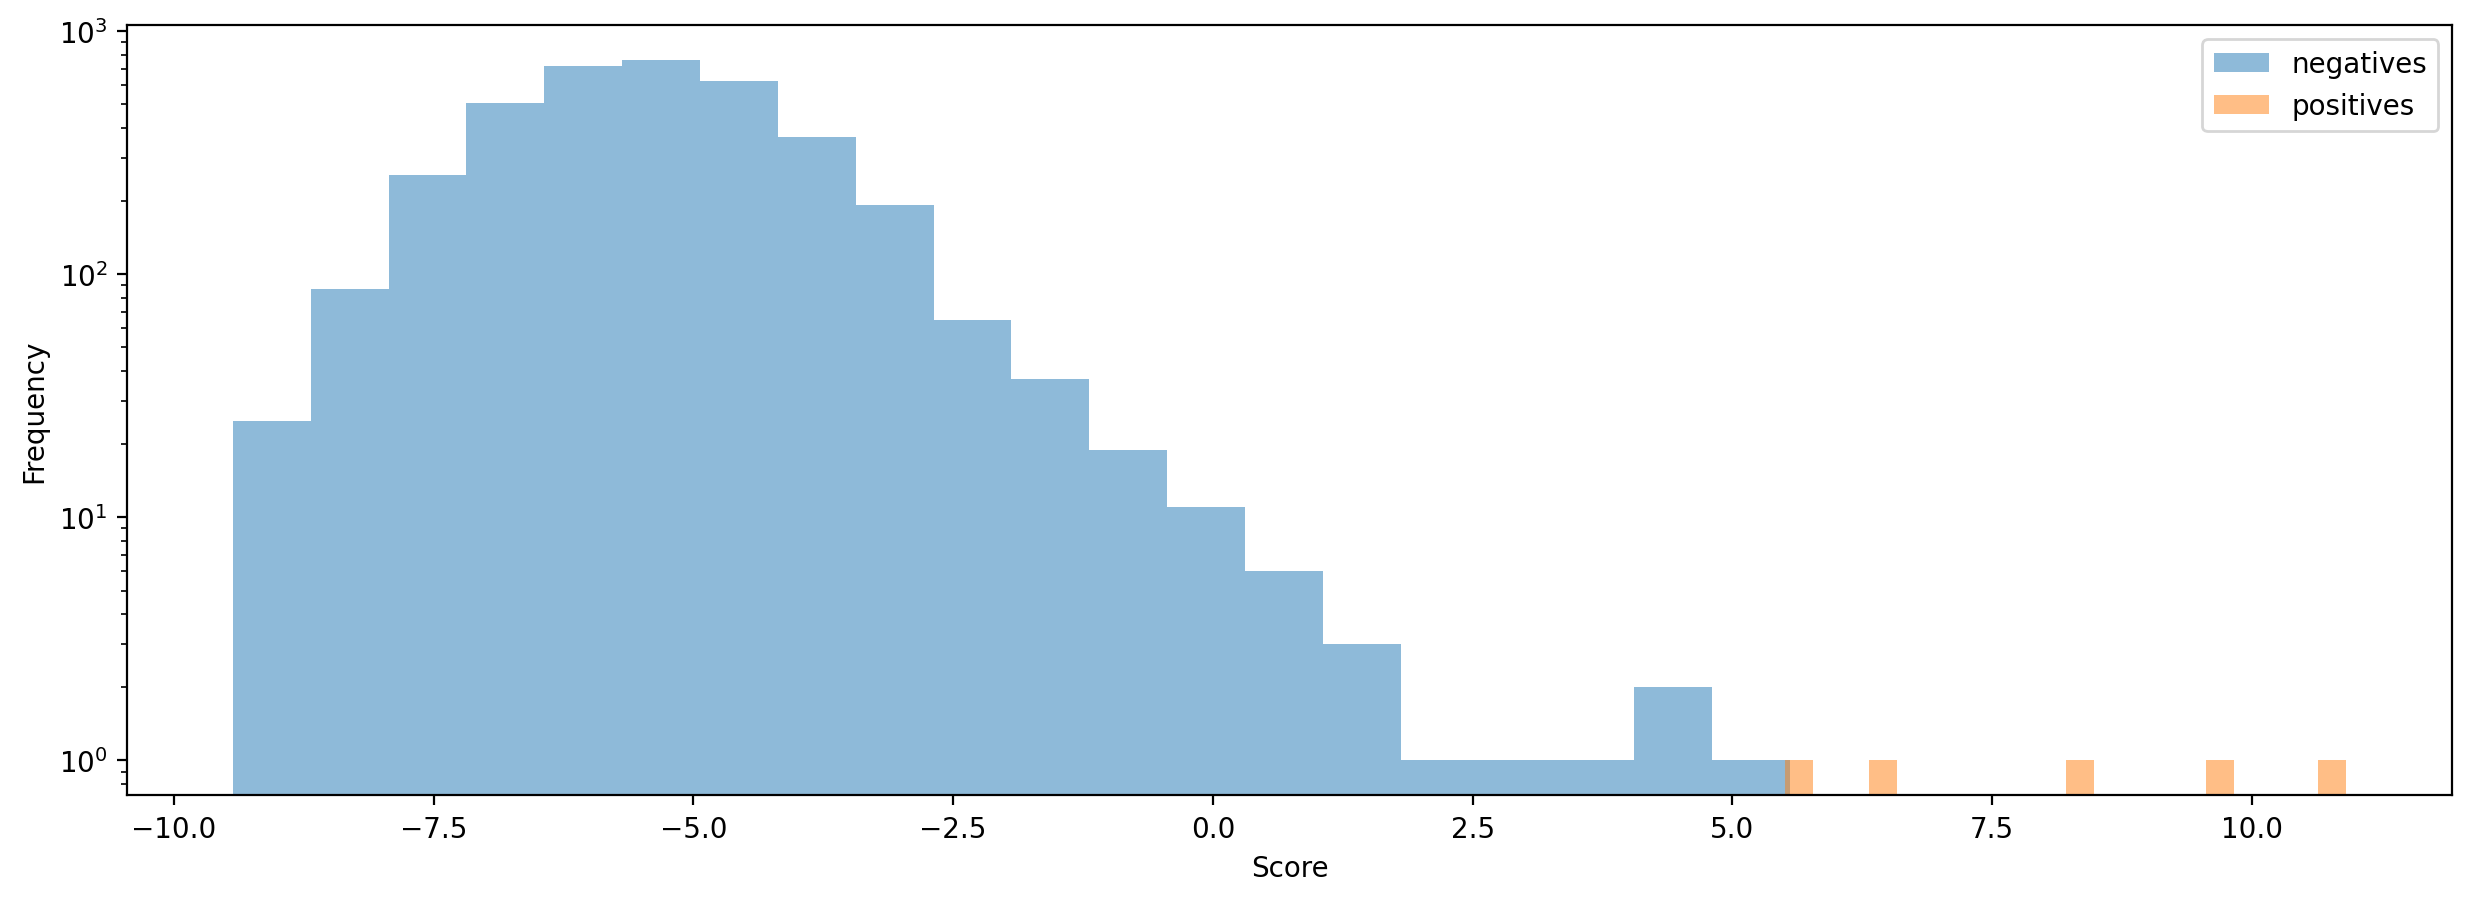

In [49]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

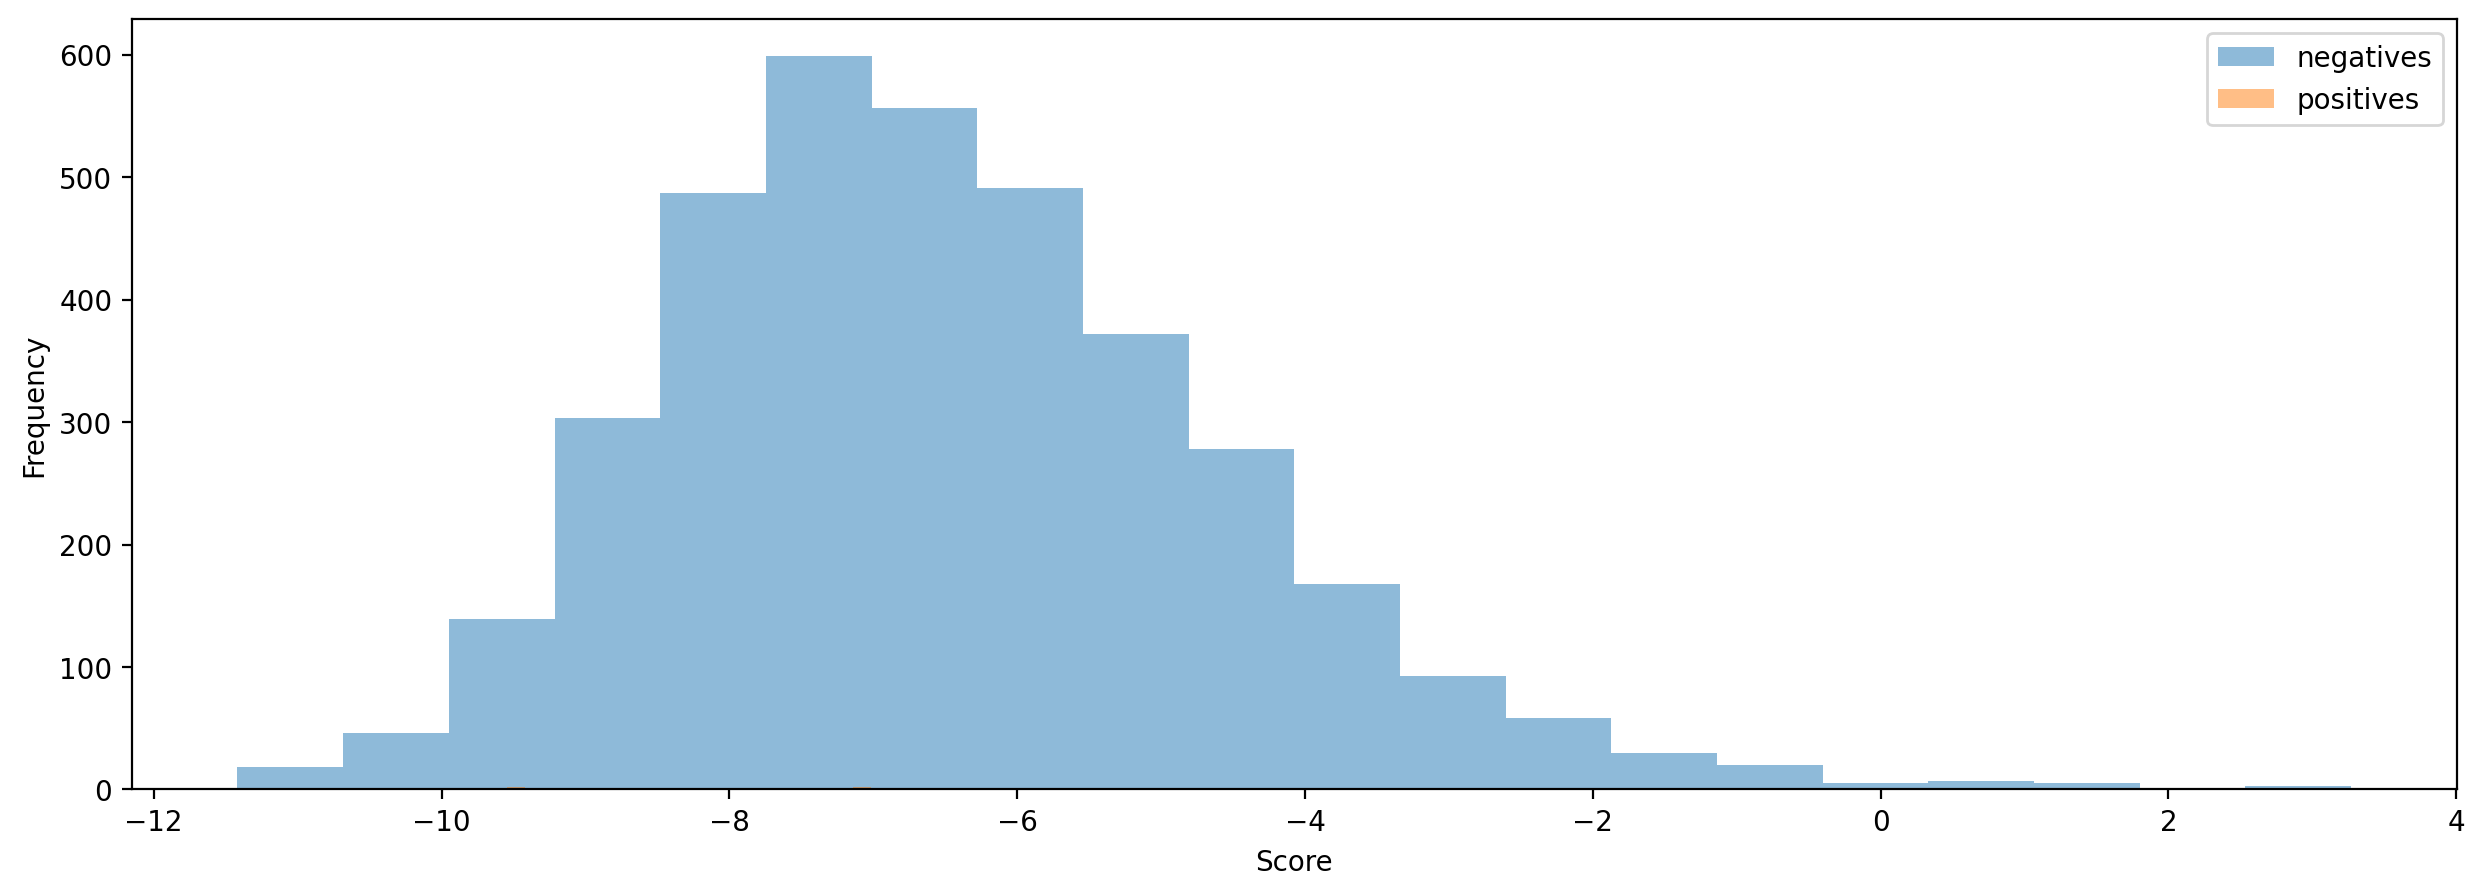

In [50]:
histspecies = 'Philepitta_castanea'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

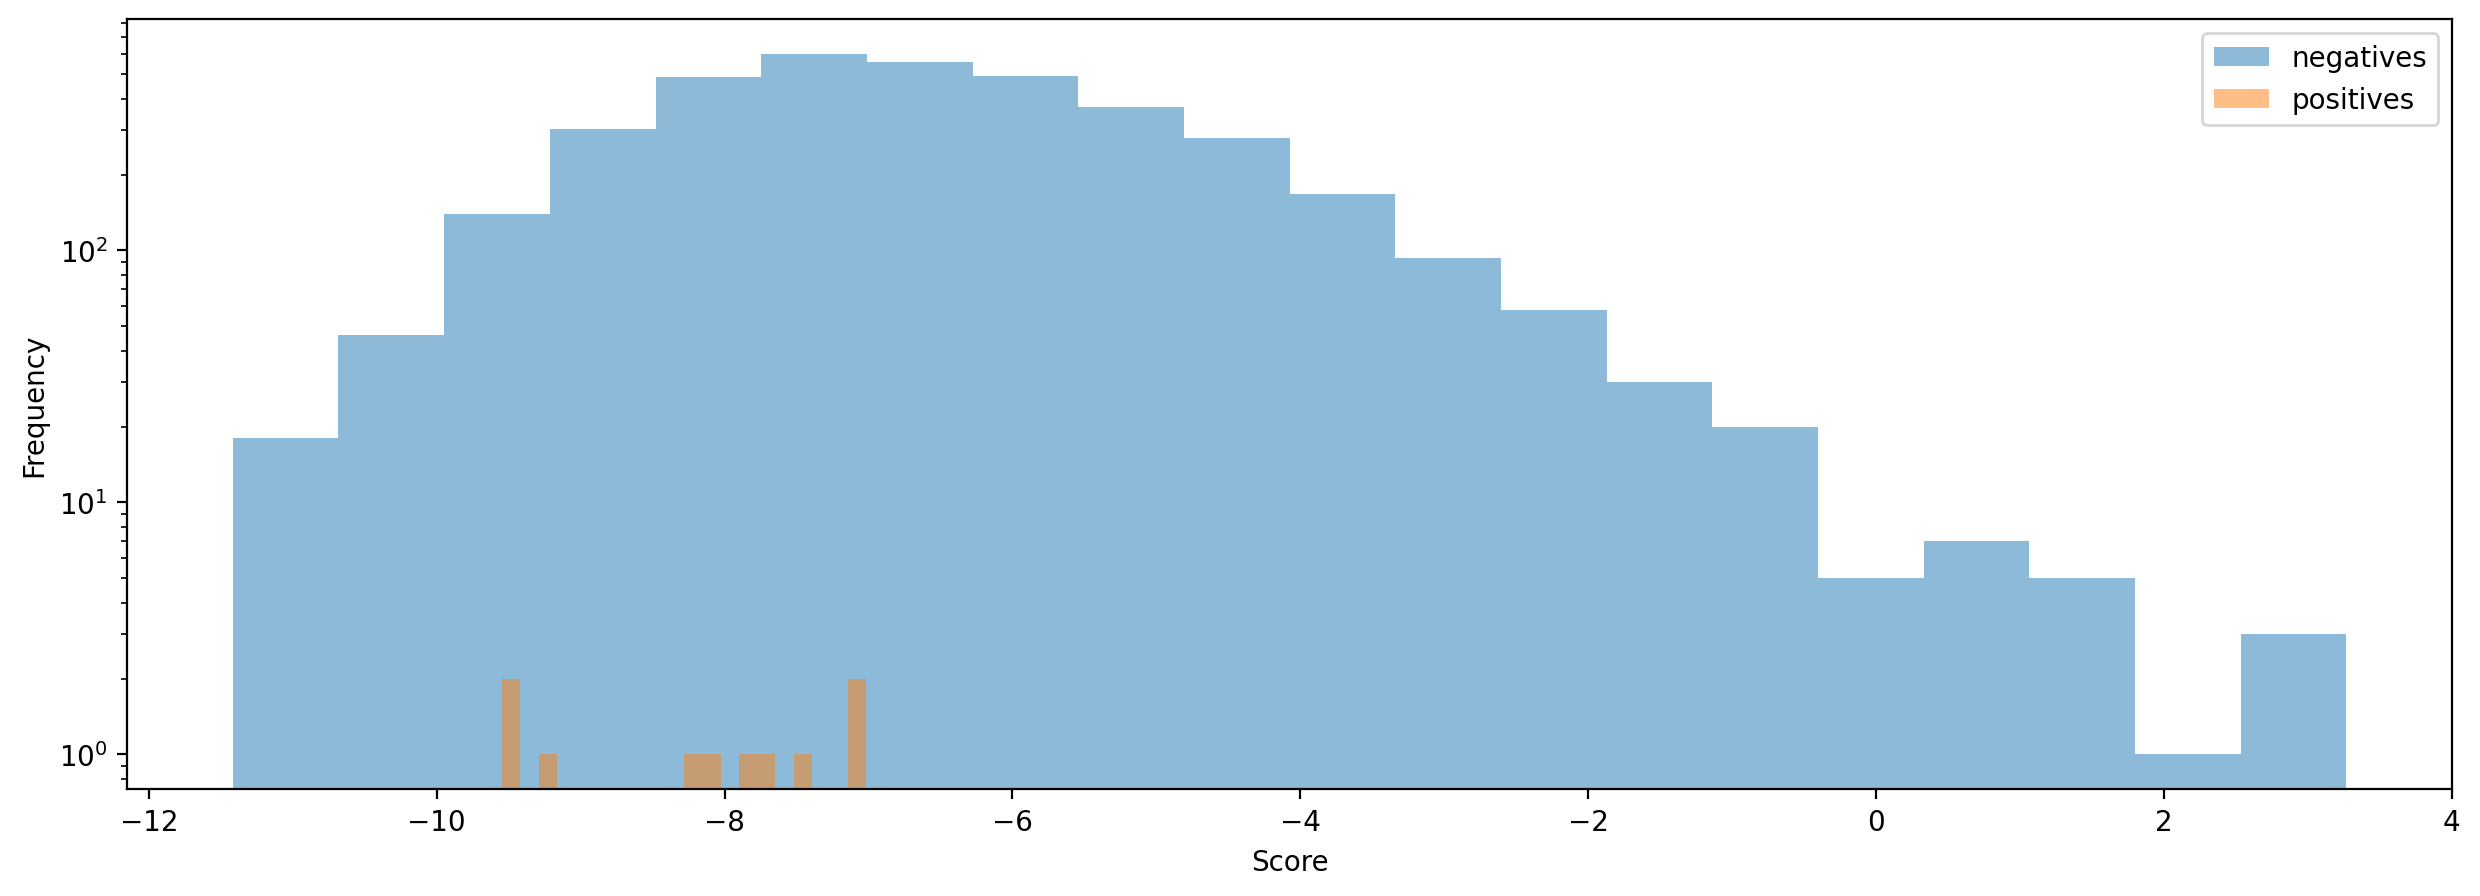

In [51]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

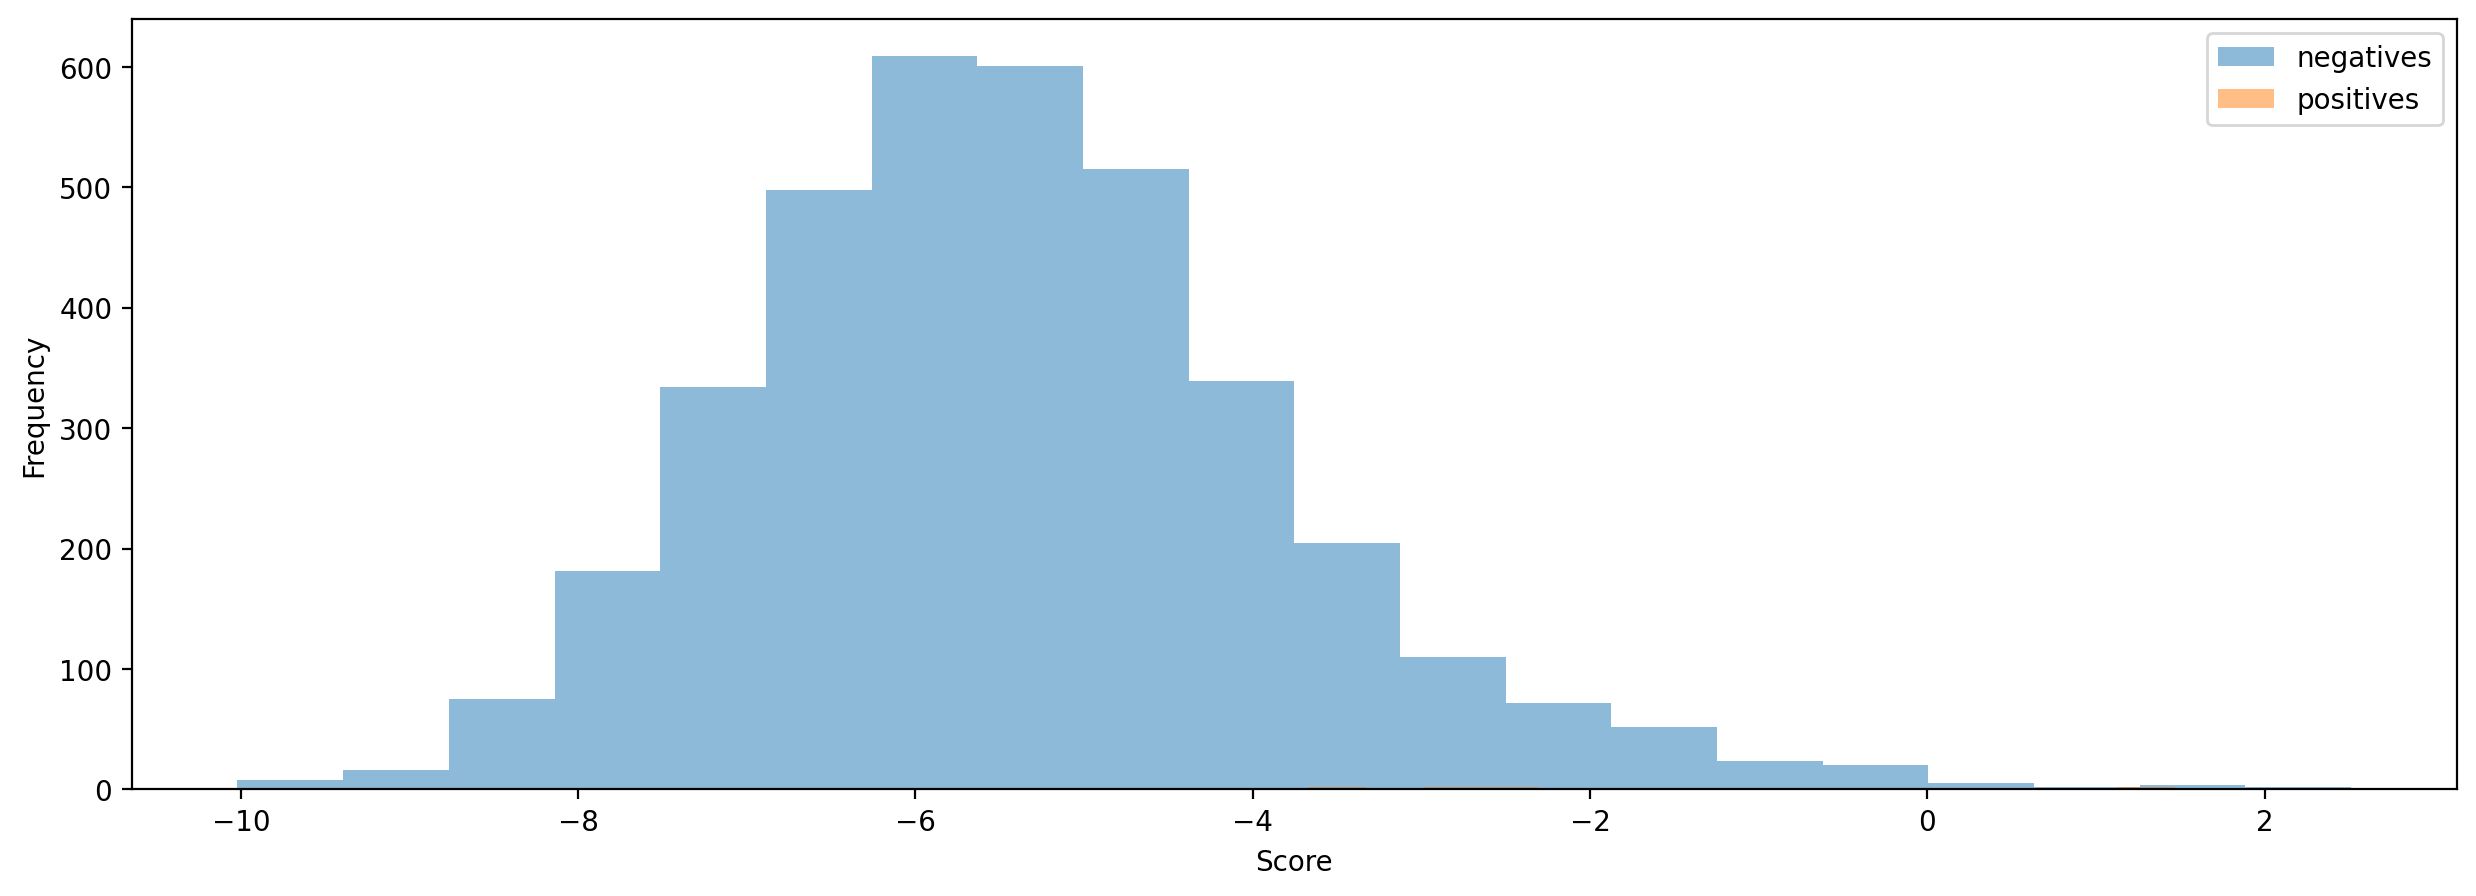

In [52]:
histspecies = 'Eulemur_sp'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

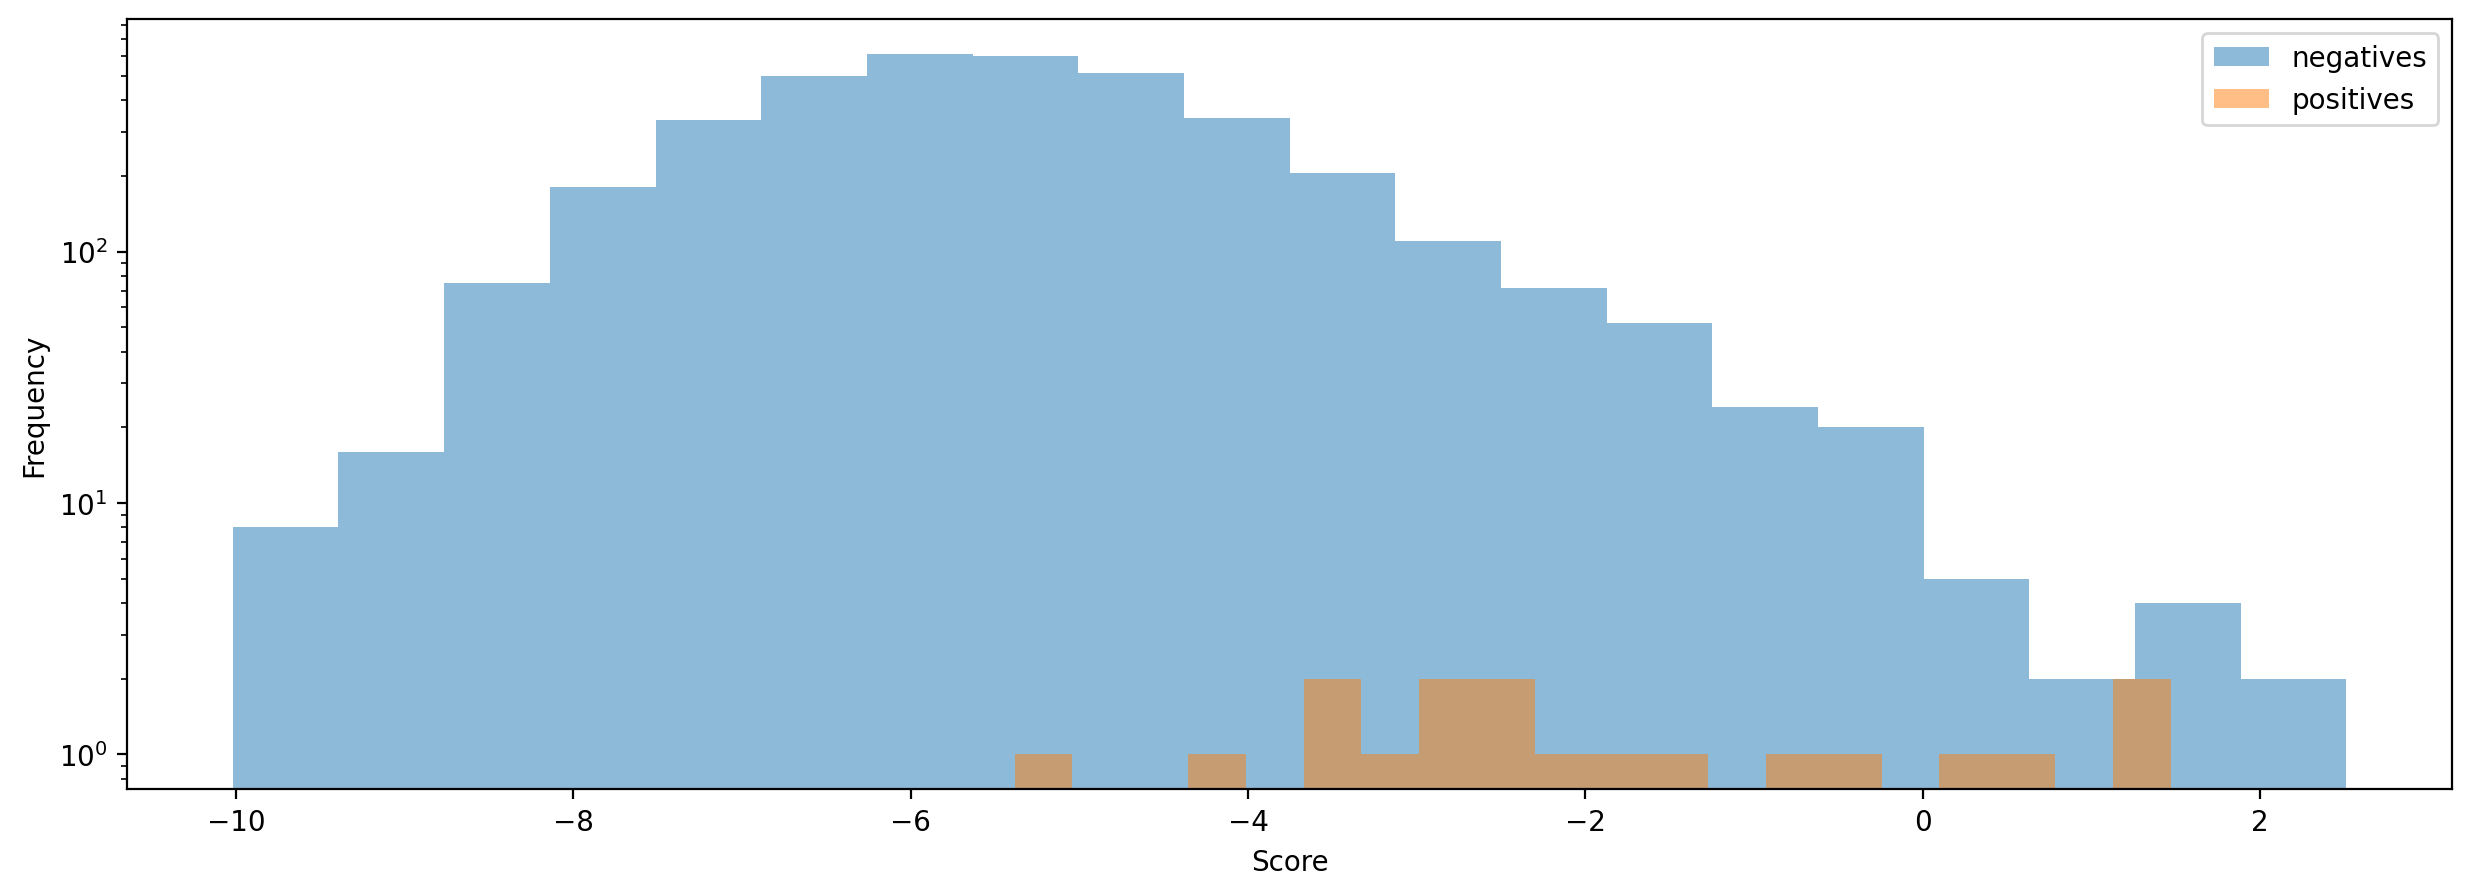

In [53]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()